<a href="https://colab.research.google.com/github/veronica1908/SALUD_E3_AIII/blob/main/aa_Preprocesamiento_y_analisis_exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Aplicaciones en operaciones (Salud)

CÉSAR IVÁN ÁVILA DÍAZ

VERÓNICA ANDREA MORALES GONZÁLEZ

Analítica 3

2024-1

REPOSITORIO: https://github.com/veronica1908/SALUD_E3_AIII

#Cargar paquetes y librerías

In [1]:
#Instalación de complemento
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 21.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
from google.colab import files

#Cargar las bases de datos

In [3]:
# Cargar la base de egresos hospitalarios
df_egresos = pd.read_csv('https://raw.githubusercontent.com/veronica1908/SALUD_E3_AIII/main/RETO_df_egresos.csv')

# Cargar la base de usuarios
df_usuarios = pd.read_csv('https://raw.githubusercontent.com/veronica1908/SALUD_E3_AIII/main/RETO_df_usuarios.csv')

<ipython-input-3-80afb50d83cc>:5: DtypeWarning: Columns (4,6,7,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_usuarios = pd.read_csv('https://raw.githubusercontent.com/veronica1908/SALUD_E3_AIII/main/RETO_df_usuarios.csv')


In [4]:
# Cargar la base de datos de crónicos codificación ISO-8859-1
df_cronicos = pd.read_csv('https://raw.githubusercontent.com/veronica1908/SALUD_E3_AIII/main/RETO_df_cronicos.csv', delimiter=';', encoding='ISO-8859-1')

<ipython-input-4-0388d6574092>:2: DtypeWarning: Columns (34,36,39,40,50,52,55,56,58,62,64,65,66,75,107,108,111,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cronicos = pd.read_csv('https://raw.githubusercontent.com/veronica1908/SALUD_E3_AIII/main/RETO_df_cronicos.csv', delimiter=';', encoding=

#Exploración inicial de los datos

In [5]:
print('Existen en total ', len(df_usuarios.columns), 'columnas en la base de datos.')
print("\nPrimeras filas de la base de usuarios:")
print(df_usuarios.head())

print("\nInformación de la base de usuarios:")
print(df_usuarios.info())

# Ordenar las columnas por cantidad de datos nulos de mayor a menor
print("Variables con  datos nulos:")
sorted_null_values = df_usuarios.isnull().sum().sort_values(ascending=False)

# Mostrar los resultados
print(sorted_null_values)

Existen en total  16 columnas en la base de datos.

Primeras filas de la base de usuarios:
     MES  YEAR  NRODOC SEXO     FECHA NACIMIENTO  EDAD DEPARTAMENTO MUNICIPIO  \
0  ABRIL  2017  306221    F  1938-09-09 00:00:00   NaN          NaN       NaN   
1  ABRIL  2017  306222    F  1974-07-03 00:00:00   NaN          NaN       NaN   
2  ABRIL  2017  306223    F  1930-08-24 00:00:00   NaN          NaN       NaN   
3  ABRIL  2017  306224    F  1979-12-01 00:00:00   NaN          NaN       NaN   
4  ABRIL  2017  306225    M  1943-06-01 00:00:00   NaN          NaN       NaN   

  BARRIO FECHA INICIO AL PGP FECHA PRIMERA CLASE FUNCIONAL  \
0    NaN                 NaN                           NaN   
1    NaN                 NaN                           NaN   
2    NaN                 NaN                           NaN   
3    NaN                 NaN                           NaN   
4    NaN                 NaN                           NaN   

  PRIMERA CLASE FUNCIONAL FECHA ÚLTIMA CLASE FUNC

In [6]:
print('Existen en total ', len(df_egresos.columns), 'columnas en la base de datos.')
# Mostrar las primeras filas
print("Primeras filas de la base de egresos hospitalarios:")
print(df_egresos.head())

# Información general de los dataframes
print("\nInformación de la base de egresos hospitalarios:")
print(df_egresos.info())

# Ordenar las columnas por cantidad de datos nulos de mayor a menor
print("Variables con  datos nulos:")
sorted_null_values = df_egresos.isnull().sum().sort_values(ascending=False)

# Mostrar los resultados
print(sorted_null_values)

Existen en total  66 columnas en la base de datos.
Primeras filas de la base de egresos hospitalarios:
   YEAR        MES  NRO ATENCION  NRO INGRESO  SERVICIO HABILITADO COD  \
0  2017       MAYO       3433964      1899917                     -1.0   
1  2017  DICIEMBRE       3720631      2018136                     -1.0   
2  2018    FEBRERO       3912821      2159592                    501.0   
3  2018       MAYO       4023613      2254075                    501.0   
4  2018      JULIO       4080166      2292863                    101.0   

     SERVICIO HABILITADO TIPO IDENTIFICACION  NRODOC         FECHA NACIMIENTO  \
0        Sin Informacion                  CC  308185  1937-07-18 00:00:00.000   
1        Sin Informacion                  CC  308185  1937-07-18 00:00:00.000   
2  Urgencias >= 24 horas                  CC  308185  1937-07-18 00:00:00.000   
3  Urgencias >= 24 horas                  CC  308185  1937-07-18 00:00:00.000   
4        General adultos                  CC  3

In [7]:
print('Existen en total ', len(df_cronicos.columns), 'columnas en la base de datos.')
print("\nPrimeras filas de la base de crónicos:")
print(df_cronicos.head())

print("\nInformación de la base de crónicos:")
print(df_cronicos.info())

# Ordenar las columnas por cantidad de datos nulos de mayor a menor
print("Variables con  datos nulos:")
sorted_null_values = df_cronicos.isnull().sum().sort_values(ascending=False)

# Mostrar los resultados
print(sorted_null_values)

Existen en total  290 columnas en la base de datos.

Primeras filas de la base de crónicos:
   YEAR      MES Fecha diligenciamiento           Hora  AtenciÃ³n  Ingreso  \
0  2017  OCTUBRE              2/10/2017  9:00:20 a. m.    3912499  2629714   
1  2017  OCTUBRE              2/10/2017  9:04:33 a. m.    3942247  2629726   
2  2017  OCTUBRE              2/10/2017  9:11:43 a. m.    3898560  2629751   
3  2017  OCTUBRE              2/10/2017  9:33:34 a. m.    3912599  2629828   
4  2017  OCTUBRE              2/10/2017  9:43:59 a. m.    3906820  2629717   

  Tipo  NRODOC  Peso  Talla  ...  Diagnostico79 NombreDiagnostico79  \
0   CC  311144  69.0  155.0  ...            NaN                 NaN   
1   CC  308418  62.0  155.0  ...            NaN                 NaN   
2   CC  308573  89.0  163.0  ...            NaN                 NaN   
3   CC  307549  88.0  163.0  ...            NaN                 NaN   
4   CC  307044  58.0  158.0  ...            NaN                 NaN   

   Diagnosti

#Preprocesamiento

##Base Usuarios

In [8]:
# Lo primero es filtrar la base solo con los usuarios que tengan 60 años o más.
df_usuarios60 = df_usuarios[df_usuarios['EDAD'] >= 60]
print(df_usuarios.shape)
print(df_usuarios60.shape)

(183911, 16)
(130595, 16)


Aquí pasamos de 183911 registros de usuarios a 130595.

In [9]:
#Verificamos si hay datos duplicados, ya que se espera que al ser una base de usuarios, se tenga un registro por persona (número de documento)
duplicados = df_usuarios60['NRODOC'].duplicated()

# Mostrar los registros duplicados
print("Registros duplicados:")
print(df_usuarios60[duplicados])

# Mostrar la cantidad de registros duplicados
print(f"\nCantidad de registros duplicados: {duplicados.sum()}")


Registros duplicados:
            MES  YEAR  NRODOC SEXO     FECHA NACIMIENTO  EDAD DEPARTAMENTO  \
29232   OCTUBRE  2017  307120    M                  NaN  87.0          NaN   
29233   OCTUBRE  2017  311028    M                  NaN  65.0          NaN   
29234   OCTUBRE  2017  310961    M                  NaN  71.0          NaN   
29235   OCTUBRE  2017  310240    M                  NaN  64.0          NaN   
29236   OCTUBRE  2017  310936    M                  NaN  67.0          NaN   
...         ...   ...     ...  ...                  ...   ...          ...   
183905    JUNIO  2022  313952    F  1945-04-22 00:00:00  77.0    ANTIOQUIA   
183906    JUNIO  2022  307482    F  1941-03-26 00:00:00  81.0    ANTIOQUIA   
183908    JUNIO  2022  307738    F  1943-09-11 00:00:00  78.0    ANTIOQUIA   
183909    JUNIO  2022  311656    M  1940-05-26 00:00:00  82.0    ANTIOQUIA   
183910    JUNIO  2022  309230    M  1957-05-26 00:00:00  65.0    ANTIOQUIA   

       MUNICIPIO                  BARRIO 

Como hay duplicados, vamos a extraer solo los valores únicos de usuario por número de documento.

In [10]:
# Ahora vamos a filtrar la tabla para obtener valores únicos de 'NRODOC'
df_usuarios60= df_usuarios60.drop_duplicates(subset=['NRODOC'])

print(df_usuarios60.shape)

(6930, 16)


Ahora pasamos de 130595 a 6930 registros correspondientes a usuarios únicos.

In [11]:
#Ahora verificamos los valores nulos de la tabla que nos queda para definir con cuales variables quedarnos
null_values = df_usuarios60.isnull().sum()
print(null_values)

MES                                 0
YEAR                                0
NRODOC                              0
SEXO                                0
FECHA NACIMIENTO                 5210
EDAD                                0
DEPARTAMENTO                     5218
MUNICIPIO                        5330
BARRIO                           1996
FECHA INICIO AL PGP              4649
FECHA PRIMERA CLASE FUNCIONAL    5481
PRIMERA CLASE FUNCIONAL          5270
FECHA ÚLTIMA CLASE FUNCIONAL     5466
ÚLTIMA CLASE FUNCIONAL           4983
CICLO_VITAL                         0
QUINQUENIO                          0
dtype: int64


Como nos interesa principalmente la información de los usuarios de acuerdo con su edad, vamos a quedarnos solo con variables cuyos datos estén completos y puedan aportarnos al caso.

In [12]:
# Seleccionar solo las columnas deseadas
columns_u = ['NRODOC', 'SEXO', 'EDAD', 'YEAR', 'MES', 'ÚLTIMA CLASE FUNCIONAL', 'QUINQUENIO']
df_usuarios60 = df_usuarios60[columns_u]
print(df_usuarios60.shape)

(6930, 7)


Aunque las variables asociadas con clase funcional, tienen una gran cantidad de datos nulos, tomamos "ÚLTIMA CLASE FUNCIONAL", ya que tiene menor cantidad y en el contexto del caso, se menciona esta clasificación como algo que puede aportar en el análisis.

In [13]:
#Entonces vamos a verificar las categorías que contiene la columna "ÚLTIMA CLASE FUNCIONAL"
cat_UCF = df_usuarios60['ÚLTIMA CLASE FUNCIONAL'].unique()
print(cat_UCF)

[nan 'CLASE FUNCIONAL 1' 'CLASE FUNCIONAL 2A' 'CLASE FUNCIONAL 2B'
 'CLASE FUNCIONAL 3' 'Clase funcional 2B' 'Clase funcional 2A'
 'Clase funcional 4' 'Clase funcional 3' 'CLASE FUNCIONAL 4'
 'SIN CLASIFICAR' 'Sin Clasificar' 'Clase funcional 1' 'Sin clasificar']


In [14]:
# Unificamos categorías de ÚLTIMA CLASE FUNCIONAL

df_usuarios60['ÚLTIMA CLASE FUNCIONAL'] = df_usuarios60['ÚLTIMA CLASE FUNCIONAL'].replace('Clase funcional 1', 'CLASE FUNCIONAL 1')
df_usuarios60['ÚLTIMA CLASE FUNCIONAL'] = df_usuarios60['ÚLTIMA CLASE FUNCIONAL'].replace('Clase funcional 2A', 'CLASE FUNCIONAL 2A')
df_usuarios60['ÚLTIMA CLASE FUNCIONAL'] = df_usuarios60['ÚLTIMA CLASE FUNCIONAL'].replace('Clase funcional 2B', 'CLASE FUNCIONAL 2B')
df_usuarios60['ÚLTIMA CLASE FUNCIONAL'] = df_usuarios60['ÚLTIMA CLASE FUNCIONAL'].replace('Clase funcional 3', 'CLASE FUNCIONAL 3')
df_usuarios60['ÚLTIMA CLASE FUNCIONAL'] = df_usuarios60['ÚLTIMA CLASE FUNCIONAL'].replace('Clase funcional 4', 'CLASE FUNCIONAL 4')
df_usuarios60['ÚLTIMA CLASE FUNCIONAL'] = df_usuarios60['ÚLTIMA CLASE FUNCIONAL'].replace('Sin Clasificar', 'SIN CLASIFICAR')
df_usuarios60['ÚLTIMA CLASE FUNCIONAL'] = df_usuarios60['ÚLTIMA CLASE FUNCIONAL'].replace('Sin clasificar', 'SIN CLASIFICAR')
df_usuarios60['ÚLTIMA CLASE FUNCIONAL'] = df_usuarios60['ÚLTIMA CLASE FUNCIONAL'].fillna('SIN CLASIFICAR')

# Verificar que las categorías se hayan ajustado correctamente
print(df_usuarios60['ÚLTIMA CLASE FUNCIONAL'].unique())
print(df_usuarios60.shape)

['SIN CLASIFICAR' 'CLASE FUNCIONAL 1' 'CLASE FUNCIONAL 2A'
 'CLASE FUNCIONAL 2B' 'CLASE FUNCIONAL 3' 'CLASE FUNCIONAL 4']
(6930, 7)


In [15]:
num_filas, num_columnas = df_usuarios60.shape
print(f"Las dimensiones de la base son: {num_filas} filas y {num_columnas} columnas.")

Las dimensiones de la base son: 6930 filas y 7 columnas.


##Base Egresos

In [16]:
# Lo primero es filtrar los registros que correspondan al número de documento de los usuarios que fueron filtrados en la base anterior, que corresponden a edad =>60 años
# Filtrar la base de egresos usando la variable NRODOC de la base usuarios
df_egresos60 = df_egresos[df_egresos['NRODOC'].isin(df_usuarios60['NRODOC'])]

# Verificar el nuevo conjunto de datos
print(df_egresos.shape)
print(df_egresos60.shape)

(6376, 66)
(5781, 66)


Pasó de tener 6376 registros a 5781 que corresponden a los usuarios con edad igual o mayor a los 60 años. Teniendo en cuenta que la base de usuarios es de 6930, se puede inferir que no todos los usuarios tuvieron egresos.

In [17]:
#Verificamos las columnas de la base
print(df_egresos60.columns)

Index(['YEAR', 'MES', 'NRO ATENCION', 'NRO INGRESO', 'SERVICIO HABILITADO COD',
       'SERVICIO HABILITADO', 'TIPO IDENTIFICACION', 'NRODOC',
       'FECHA NACIMIENTO', 'REGIMEN AFILIACION', 'EPS VALIDADA',
       'MODALIDAD CONTRATO', 'FUENTE FINANCIACION1', 'FUENTE FINANCIACION2',
       'SERVICIO ADMITE', 'BLOQUE ANTERIOR', 'PISO ANTERIOR',
       'SERVICIO ANTERIOR', 'NRO CAMA ANTERIOR', 'VIA INGRESO', 'BLOQUE',
       'UNIDAD ESTRATEGICA', 'PISO', 'NRO CAMA', 'SERVICIO EGRESO',
       'TIPO EGRESO', 'FECHA INGRESO CLINICA', 'FECHA INGRESO SERVICIO',
       'FECHA POSIBLE ALTA', 'FECHA ALTA MEDICA', 'FECHA RECAUDO',
       'FECHA CAMILLERO', 'FECHA ENFERMERIA', 'FECHA FACTURACION AUDIFARMA',
       'FECHA FARMACIA', 'FECHA SALIDA', 'FECHA ASEO',
       'DEMORA ASIGNACION CAMA', 'DEMORA APLICACION MEDICAMENTO',
       'DEMORA SALIDA CLINICA (DIAS)', 'TRANSFUSION SANGRE', 'ANTIBIOTICO',
       'ALTA MEDICA', 'POSIBLE ALTA', 'DXPRINCIPAL EGRESO COD',
       'DXPRINCIPAL EGRESO', 'DX 

In [18]:
# Ahora, de acuerdo con el diccionario facilitado, tomaremos en cuenta solo las siguientes variables para el caso:

df_egresos60 = df_egresos60[['YEAR', 'MES', 'NRODOC', 'REGIMEN AFILIACION', 'EPS VALIDADA', 'MODALIDAD CONTRATO', 'VIA INGRESO', 'SERVICIO EGRESO', 'TIPO EGRESO',
                             'FECHA INGRESO CLINICA', 'FECHA INGRESO SERVICIO', 'FECHA SALIDA', 'DEMORA ASIGNACION CAMA', 'DEMORA APLICACION MEDICAMENTO',
                             'DEMORA SALIDA CLINICA (DIAS)', 'TRANSFUSION SANGRE', 'ANTIBIOTICO','TIPO DIAGNOSTICO PRINCIPAL', 'PROFESIONAL ESPECIALIDAD']]


Pasamos de 63 variables a 20.

In [19]:
#Verificamos la base nueva y los datos nulos para continuar con el ajuste de la base
print(df_egresos60.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5781 entries, 0 to 6375
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   YEAR                           5781 non-null   int64  
 1   MES                            5781 non-null   object 
 2   NRODOC                         5781 non-null   int64  
 3   REGIMEN AFILIACION             5781 non-null   object 
 4   EPS VALIDADA                   3736 non-null   object 
 5   MODALIDAD CONTRATO             5781 non-null   object 
 6   VIA INGRESO                    5781 non-null   object 
 7   SERVICIO EGRESO                5781 non-null   object 
 8   TIPO EGRESO                    5781 non-null   object 
 9   FECHA INGRESO CLINICA          3738 non-null   object 
 10  FECHA INGRESO SERVICIO         3737 non-null   object 
 11  FECHA SALIDA                   5781 non-null   object 
 12  DEMORA ASIGNACION CAMA         5781 non-null   object

Justamente las variables con datos nulos son las que indican la fecha de ingreso a la clínica y al servicio, por lo que es imprescindible tener la información para calcular la estancia hospitalaria. Aquí se pasaría entonces a tener 3737 registros, es decir, se perdería el 35.3% de los registros. Trabajaríamos entonces con el 64,7% de ellos, lo cual sigue siendo representativo.

In [20]:
# Eliminar filas con datos nulos
df_egresos60 = df_egresos60.dropna()

# Verificar el nuevo conjunto de datos
print(df_egresos60.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3736 entries, 2 to 6375
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   YEAR                           3736 non-null   int64  
 1   MES                            3736 non-null   object 
 2   NRODOC                         3736 non-null   int64  
 3   REGIMEN AFILIACION             3736 non-null   object 
 4   EPS VALIDADA                   3736 non-null   object 
 5   MODALIDAD CONTRATO             3736 non-null   object 
 6   VIA INGRESO                    3736 non-null   object 
 7   SERVICIO EGRESO                3736 non-null   object 
 8   TIPO EGRESO                    3736 non-null   object 
 9   FECHA INGRESO CLINICA          3736 non-null   object 
 10  FECHA INGRESO SERVICIO         3736 non-null   object 
 11  FECHA SALIDA                   3736 non-null   object 
 12  DEMORA ASIGNACION CAMA         3736 non-null   object

In [21]:
#Convertimos las variables DEMORA ASIGNACION CAMA y DEMORA APLICACION MEDICAMENTO de horas a días
#Veamos primero la forma de los datos
print(df_egresos60[['DEMORA ASIGNACION CAMA', 'DEMORA APLICACION MEDICAMENTO']])

     DEMORA ASIGNACION CAMA DEMORA APLICACION MEDICAMENTO
2                      0:00                        -27:20
3                     00:00                         00:00
4                     00:00                         00:00
5                     00:00                         00:00
6                     00:00                         00:00
...                     ...                           ...
6371                   0:00                       -173:20
6372                  26:00                       -199:50
6373                  60:53                       -323:-2
6374                   0:00                       -114:00
6375                   3:31                        -76:00

[3736 rows x 2 columns]


La variable DEMORA APLICACION MEDICAMENTO tiene varios valores negativos, por lo que se decide no considerarla para la base.

In [22]:
# Eliminar la columna DEMORA APLICACION MEDICAMENTO
df_egresos60 = df_egresos60.drop(columns=['DEMORA APLICACION MEDICAMENTO'])

In [23]:
#Convertimos la columna DEMORA ASIGNACION CAMA en número decimal que representa la cantidad de días.
df_egresos60['DEMORA ASIGNACION CAMA'] = df_egresos60['DEMORA ASIGNACION CAMA'].str.split(':').apply(lambda x: int(x[0]) + int(x[1])/60)
df_egresos60['DEMORA ASIGNACION CAMA'] = df_egresos60['DEMORA ASIGNACION CAMA'] / 24

#Verificamos los datos de la columna
print(df_egresos60['DEMORA ASIGNACION CAMA'])

#Verificamos los valores nulos.
print("Valores nulos en DEMORA ASIGNACION CAMA:", df_egresos60['DEMORA ASIGNACION CAMA'].isnull().sum())

2       0.000000
3       0.000000
4       0.000000
5       0.000000
6       0.000000
          ...   
6371    0.000000
6372    1.083333
6373    2.536806
6374    0.000000
6375    0.146528
Name: DEMORA ASIGNACION CAMA, Length: 3736, dtype: float64
Valores nulos en DEMORA ASIGNACION CAMA: 0


In [24]:
#Verificamos los valores de 'DEMORA ASIGNACIÓN CAMA' para descartar valores negativos por errores de ingresos
# Filtrar valores menores que cero
negative_values = df_egresos60[(df_egresos60['DEMORA ASIGNACION CAMA'] < 0)]

# Verificar si hay valores menores que cero
if negative_values.empty:
    print("No hay valores negativos en las columnas 'DEMORA ASIGNACION CAMA'")
else:
    print("Valores negativos encontrados en las columnas 'DEMORA ASIGNACION CAMA'")
    print(negative_values)

No hay valores negativos en las columnas 'DEMORA ASIGNACION CAMA'


In [25]:
# Verificamos también posibles valores negativos en la variable de ESTANCIA HOSPITALARIA
# Filtrar valores menores que cero para la columna TIEMPO ESTANCIA (DIAS)
negative_values = df_egresos60[df_egresos60['DEMORA SALIDA CLINICA (DIAS)'] < 0]

# Verificar si hay valores menores que cero
if negative_values.empty:
    print("No hay valores negativos en la columna 'DEMORA SALIDA CLINICA (DIAS)'")
else:
    print("Valores negativos encontrados en la columna 'DEMORA SALIDA CLINICA (DIAS)'")
    print(negative_values)

Valores negativos encontrados en la columna 'DEMORA SALIDA CLINICA (DIAS)'
     YEAR        MES  NRODOC REGIMEN AFILIACION        EPS VALIDADA  \
732  2021  DICIEMBRE  307774       Contributivo  NUEVA EPS S.A. PGP   

    MODALIDAD CONTRATO VIA INGRESO             SERVICIO EGRESO  TIPO EGRESO  \
732                PGP   Urgencias  Camillas Sala 3  Urgencias  Alta Médica   

       FECHA INGRESO CLINICA   FECHA INGRESO SERVICIO  \
732  2021-12-20 19:59:02.527  2021-12-22 15:04:26.820   

                FECHA SALIDA  DEMORA ASIGNACION CAMA  \
732  2021-12-22 08:50:07.000                     0.0   

     DEMORA SALIDA CLINICA (DIAS) TRANSFUSION SANGRE ANTIBIOTICO  \
732                          -4.0                 NO          SI   

    TIPO DIAGNOSTICO PRINCIPAL PROFESIONAL ESPECIALIDAD  
732                      Nuevo         Medicina Interna  


In [26]:
#Solo se encontró un valor negativo, así que será eliminado de la base.
# Eliminar filas con valores negativos en la columna DEMORA SALIDA CLINICA (DIAS)
df_egresos60 = df_egresos60.loc[df_egresos60['DEMORA SALIDA CLINICA (DIAS)'] >= 0]

# Verificar que los valores negativos han sido eliminados
print(df_egresos60['DEMORA SALIDA CLINICA (DIAS)'].describe())

count    3735.000000
mean        0.020080
std         0.140294
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: DEMORA SALIDA CLINICA (DIAS), dtype: float64


In [27]:
# Convertir columnas de fecha al tipo datetime
df_egresos60['FECHA SALIDA'] = pd.to_datetime(df_egresos60['FECHA SALIDA'])
df_egresos60['FECHA INGRESO SERVICIO'] = pd.to_datetime(df_egresos60['FECHA INGRESO SERVICIO'])
df_egresos60['FECHA INGRESO CLINICA'] = pd.to_datetime(df_egresos60['FECHA INGRESO CLINICA'])

# Calcular el tiempo de estancia hospitalaria
df_egresos60['TIEMPO ESTANCIA (DIAS)'] = (df_egresos60['FECHA SALIDA'] - df_egresos60['FECHA INGRESO SERVICIO']).dt.days

# Convertir columnas numéricas a int
columnas_numericas = ['YEAR']
df_egresos60[columnas_numericas] = df_egresos60[columnas_numericas].astype(int)

<ipython-input-27-79c92b6c30b9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_egresos60['FECHA SALIDA'] = pd.to_datetime(df_egresos60['FECHA SALIDA'])
<ipython-input-27-79c92b6c30b9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_egresos60['FECHA INGRESO SERVICIO'] = pd.to_datetime(df_egresos60['FECHA INGRESO SERVICIO'])
<ipython-input-27-79c92b6c30b9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [28]:
# Verificamos también posibles valores negativos en la variable de TIEMPO ESTANCIA (DIAS) que ha sido recién creada
# Filtrar valores menores que cero para la columna TIEMPO ESTANCIA (DIAS)
negative_values = df_egresos60[df_egresos60['TIEMPO ESTANCIA (DIAS)'] < 0]

# Verificar si hay valores menores que cero
if negative_values.empty:
    print("No hay valores negativos en la columna 'TIEMPO ESTANCIA (DIAS)'")
else:
    print("Valores negativos encontrados en la columna 'TIEMPO ESTANCIA (DIAS)'")
    print(negative_values)

Valores negativos encontrados en la columna 'TIEMPO ESTANCIA (DIAS)'
      YEAR         MES  NRODOC REGIMEN AFILIACION        EPS VALIDADA  \
5145  2018  SEPTIEMBRE  306656       Contributivo  NUEVA EPS S.A. PGP   

     MODALIDAD CONTRATO                    VIA INGRESO SERVICIO EGRESO  \
5145                PGP  Consulta Externa ó Programada   Sala de altas   

      TIPO EGRESO   FECHA INGRESO CLINICA  FECHA INGRESO SERVICIO  \
5145  Alta Médica 2018-09-07 07:02:38.397 2018-09-13 02:57:47.573   

            FECHA SALIDA  DEMORA ASIGNACION CAMA  \
5145 2018-09-09 14:36:48                     0.0   

      DEMORA SALIDA CLINICA (DIAS) TRANSFUSION SANGRE ANTIBIOTICO  \
5145                           0.0                 NO          NO   

     TIPO DIAGNOSTICO PRINCIPAL PROFESIONAL ESPECIALIDAD  \
5145            Sin Informacion         Medicina General   

      TIEMPO ESTANCIA (DIAS)  
5145                      -4  


In [29]:
#Solo se encontró un valor negativo, así que será eliminado de la base.
# Eliminar filas con valores negativos en la columnaTIEMPO ESTANCIA (DIAS))
df_egresos60 = df_egresos60.loc[df_egresos60['TIEMPO ESTANCIA (DIAS)'] >= 0]

# Verificar que los valores negativos han sido eliminados
print(df_egresos60['TIEMPO ESTANCIA (DIAS)'].describe())

count    3734.000000
mean        4.570166
std         5.543079
min         0.000000
25%         1.000000
50%         3.000000
75%         6.000000
max        66.000000
Name: TIEMPO ESTANCIA (DIAS), dtype: float64


In [30]:
#Finalmente, filtramos la columna 'MODALIDAD CONTRATO' para el tipo PGP, ya que para la población que hace parte de este contrato se requiere
#predecir el uso mensual de recursos traducido en hospitalización de acuerdo con la clase funcional a la que pertenece el paciente.

# Filtrar la columna MODALIDAD CONTRATO por el valor 'PGP'
df_egresos60 = df_egresos60[df_egresos60['MODALIDAD CONTRATO'] == 'PGP']

In [31]:
# Verificar el nuevo conjunto de datos
print(df_egresos60.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3635 entries, 2 to 6375
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   YEAR                          3635 non-null   int64         
 1   MES                           3635 non-null   object        
 2   NRODOC                        3635 non-null   int64         
 3   REGIMEN AFILIACION            3635 non-null   object        
 4   EPS VALIDADA                  3635 non-null   object        
 5   MODALIDAD CONTRATO            3635 non-null   object        
 6   VIA INGRESO                   3635 non-null   object        
 7   SERVICIO EGRESO               3635 non-null   object        
 8   TIPO EGRESO                   3635 non-null   object        
 9   FECHA INGRESO CLINICA         3635 non-null   datetime64[ns]
 10  FECHA INGRESO SERVICIO        3635 non-null   datetime64[ns]
 11  FECHA SALIDA                  3635 

In [32]:
num_filas, num_columnas = df_egresos60.shape
print(f"Las dimensiones de la base son: {num_filas} filas y {num_columnas} columnas.")

Las dimensiones de la base son: 3635 filas y 19 columnas.


##Base Crónicos

In [33]:
# Lo primero es filtrar los registros que correspondan al número de documento de los usuarios que fueron filtrados en la base egresos, que corresponden a edad =>60 años y que ingresaron a la clínica
# Filtrar la base de cronicos usando la variable NRODOC de la base usuarios
df_cronicos60 = df_cronicos[df_cronicos['NRODOC'].isin(df_egresos60['NRODOC'])]

# Verificar el nuevo conjunto de datos
print(df_cronicos.shape)
print(df_cronicos60.shape)

(38717, 290)
(12481, 290)


Pasó de tener 38717 registros a 12621 que corresponden a los usuarios con edad igual o mayor a los 60 años.

In [34]:
#Verificamos el tipo de datos que hay en la base
df_cronicos60.dtypes

YEAR                       int64
MES                       object
Fecha diligenciamiento    object
Hora                      object
AtenciÃ³n                  int64
                           ...  
NombreDiagnostico81       object
Diagnostico82             object
NombreDiagnostico82       object
Diagnostico83             object
NombreDiagnostico83       object
Length: 290, dtype: object

In [35]:
#Verificamos los nombres de las 290 columnas
nombres_columnas = df_cronicos60.columns.tolist()
print(nombres_columnas)

['YEAR', 'MES', 'Fecha diligenciamiento', 'Hora', 'AtenciÃ³n', 'Ingreso', 'Tipo', 'NRODOC', 'Peso', 'Talla', 'IMC', 'ClasificaciÃ³n IMC', 'SaturaciÃ³n de OxÃ\xadgeno (%)', 'PerÃ\xadmetro Muslo', 'PerÃ\xadmetro Cintura', 'Pliegue Triceps', 'Pliegue Abdomen', 'Pliegue Muslo', 'Sumatoria Pliegues', 'PresiÃ³n Arterial SistÃ³lica', 'PresiÃ³n Arterial DiastÃ³lica', 'Frecuencia CardÃ\xadaca en reposo', 'Auto-calificacion Nivel de Ejercicio', 'Constantes', 'METS -Ã\x8dndice MetabÃ³lico', 'VO2 - MÃ¡xima Cantidad de OxÃ\xadgeno', 'Ã\x8dndice de Fragilidad Groningen', 'CalificaciÃ³n (Ã\x8dndice de Fragilidad)', 'Tiempo en Segundos (Apoyo Monopodal)', 'CalificaciÃ³n (Apoyo Monopodal)', 'Tiempo en Segundos (Recorrer 5 metros)', 'Velocidad (m/s)', 'CalificaciÃ³n Velocidad', 'Test Findrisc', 'Ã\x8dndice Tobillo/Brazo', 'Observaciones', 'PresiÃ³n arterial registro medico', 'Diabetes Mellitus', 'Tipo diabetes mellitus', 'Es insulinorequiriente', 'Tiempo con el diagnÃ³stico', 'Glicemia', 'Fecha glicemia

Como lo que interesa para este caso de estudio es evaluar la estancia hospitalaria para pacientes críticos de más de 60 años de edad, vamos a tomar de aquí: la variable Diagnóstico principal para evaluarla con respecto a la estancia hospitalaria, así como la variable de cruce que es NRODOC y algunas otras como complemento para analizar el caso, los pacientes y sus diagnósticos.

In [36]:
df_cronicos60 = df_cronicos60[['YEAR', 'MES', 'NRODOC', 'Peso', 'Talla', 'ClasificaciÃ³n IMC', 'DiagnÃ³stico Principal', 'Ambito segÃºn el mÃ©dico']].rename(columns={
    'Peso':'PESO', 'Talla':'TALLA', 'ClasificaciÃ³n IMC': 'CLASIFICACION IMC', 'DiagnÃ³stico Principal': 'DIAGNOSTICO PRINCIPAL', 'Ambito segÃºn el mÃ©dico':'AMBITO SEGUN EL MEDICO'
})
##Tomamos finalmente solo 8 variables que consideramos aportan al caso de estudio.

In [37]:
# Verificar el nuevo conjunto de datos
print(df_cronicos60.head())

   YEAR      MES  NRODOC  PESO  TALLA CLASIFICACION IMC  \
1  2017  OCTUBRE  308418  62.0  155.0         Sobrepeso   
3  2017  OCTUBRE  307549  88.0  163.0    Obesidad Grasa   
4  2017  OCTUBRE  307044  58.0  158.0            Normal   
5  2017  OCTUBRE  309419  53.0  146.0            Normal   
8  2017  OCTUBRE  308637  55.0  158.0            Normal   

                     DIAGNOSTICO PRINCIPAL AMBITO SEGUN EL MEDICO  
1  I10X - HIPERTENSION ESENCIAL (PRIMARIA)           Domiciliario  
3  I10X - HIPERTENSION ESENCIAL (PRIMARIA)            Ambulatorio  
4  I10X - HIPERTENSION ESENCIAL (PRIMARIA)           Domiciliario  
5  I10X - HIPERTENSION ESENCIAL (PRIMARIA)                    NaN  
8  I10X - HIPERTENSION ESENCIAL (PRIMARIA)            Ambulatorio  


In [38]:
# Ahora vamos a verificar la cantidad de diagnósticos asociados a cada número de documento y la cantidad de diagnósticos únicos,
#ya que si bien un usuario puede tener varios diagnósticos principales, no debería tener el mismo diagnóstico más de una vez.

# Agrupar por NRODOC y realizar las agregaciones necesarias
aggregations = {
    'DIAGNOSTICO PRINCIPAL': ['count', 'nunique']
}

diagnosticos_por_nrodoc = df_cronicos60.groupby('NRODOC').agg(aggregations).reset_index()

# Renombrar las columnas
diagnosticos_por_nrodoc.columns = ['NRODOC', 'Cantidad_Total_Diagnosticos', 'Cantidad_Diagnosticos_Unicos']

# Mostrar el resultado
print(diagnosticos_por_nrodoc)

      NRODOC  Cantidad_Total_Diagnosticos  Cantidad_Diagnosticos_Unicos
0     306223                            1                             1
1     306225                            8                             1
2     306230                            6                             2
3     306233                           10                             1
4     306234                            1                             1
...      ...                          ...                           ...
1825  313921                            2                             1
1826  313948                            4                             1
1827  313965                            2                             1
1828  313973                            2                             1
1829  313987                            3                             1

[1830 rows x 3 columns]


In [39]:
#Vamos a eliminar los registros de los usuarios cuyo diagnóstico está repetido, dejando para cada usuario los diagnósticos asignados diferentes entre sí.
# Eliminar registros duplicados basados en NRODOC y DIAGNOSTICO PRINCIPAL
df_cronicos60= df_cronicos60.drop_duplicates(subset=['NRODOC', 'DIAGNOSTICO PRINCIPAL'])

# Verificar el nuevo conjunto de datos
print(df_cronicos60)

       YEAR      MES  NRODOC  PESO  TALLA CLASIFICACION IMC  \
1      2017  OCTUBRE  308418  62.0  155.0         Sobrepeso   
3      2017  OCTUBRE  307549  88.0  163.0    Obesidad Grasa   
4      2017  OCTUBRE  307044  58.0  158.0            Normal   
5      2017  OCTUBRE  309419  53.0  146.0            Normal   
8      2017  OCTUBRE  308637  55.0  158.0            Normal   
...     ...      ...     ...   ...    ...               ...   
36947  2022     MAYO  307046  64.0  152.0         Sobrepeso   
37132  2022     MAYO  306865  80.0  160.0    Obesidad Grasa   
37853  2022     MAYO  310277  65.0  166.0            Normal   
38065  2022     MAYO  306268  58.0  139.0    Obesidad Grasa   
38072  2022     MAYO  311709  56.0  170.0            Normal   

                                   DIAGNOSTICO PRINCIPAL  \
1                I10X - HIPERTENSION ESENCIAL (PRIMARIA)   
3                I10X - HIPERTENSION ESENCIAL (PRIMARIA)   
4                I10X - HIPERTENSION ESENCIAL (PRIMARIA)   
5  

In [40]:
# Verificamos ahora las cantidades de datos nulos por variable
# Ordenar las columnas por cantidad de datos nulos de mayor a menor
print("Variables con  datos nulos:")
sorted_null_values = df_cronicos60.isnull().sum().sort_values(ascending=False)

# Mostrar los resultados
print(sorted_null_values)

Variables con  datos nulos:
AMBITO SEGUN EL MEDICO    559
DIAGNOSTICO PRINCIPAL     400
YEAR                        0
MES                         0
NRODOC                      0
PESO                        0
TALLA                       0
CLASIFICACION IMC           0
dtype: int64


La variable de AMBITO SEGUN EL MEDICO, puede aportar una información complementaria y como es de tipo categórica, se reemplazará los datos nulos por la categoría "SIN INFORMACIÓN", igual proceso se realizará con la variable de DIAGNOSTICO PRINCIPAL, ya que si bien es importante saber el diagnóstico, se sabe que estos usuarios tienen alguna enfermedad crónica, y de todas maneras afectarán el indicador de estancia hospitalaria y los recursos. Si esta categoría llegara a tener por ejemplo un promedio alta de estancia hospitalaria, se recalcaría la importancia de registrar siempre la información completa, sobre todo de variables tan representativas.

In [41]:
# Reemplazar los valores nulos en las columnas 'AMBITO SEGUN EL MEDICO' y 'DIAGNOSTICO PRINCIPAL'
df_cronicos60['AMBITO SEGUN EL MEDICO'].fillna('Sin dato', inplace=True) #Hay una categoría que ya fue llamada así.
df_cronicos60['DIAGNOSTICO PRINCIPAL'].fillna('SIN INFORMACION', inplace=True)

# Verificar el conjunto de datos actualizado
print(df_cronicos60.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2556 entries, 1 to 38072
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   YEAR                    2556 non-null   int64  
 1   MES                     2556 non-null   object 
 2   NRODOC                  2556 non-null   int64  
 3   PESO                    2556 non-null   float64
 4   TALLA                   2556 non-null   float64
 5   CLASIFICACION IMC       2556 non-null   object 
 6   DIAGNOSTICO PRINCIPAL   2556 non-null   object 
 7   AMBITO SEGUN EL MEDICO  2556 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 179.7+ KB
None


In [42]:
#Finalmente, verificamos los valores de las columnas PESO y TALLA para asegurarnos de que no haya valores negativos, de cero o valores demasiado altos

print(df_cronicos60[['PESO', 'TALLA']].describe())

              PESO        TALLA
count  2556.000000  2556.000000
mean     68.121831   155.482707
std      15.119265    15.600682
min       0.000000     0.000000
25%      58.000000   150.000000
50%      68.000000   156.000000
75%      77.000000   163.000000
max     171.000000   190.000000


Se obtienen valores de cero en el mínimo, lo cual no es posible, por lo que estos valores se reemplazarán con el promedio.

In [43]:
#Reemplazamos valores de cero de las columnas PESO y TALLA con los promedios de estas columnas
promedio_peso = df_cronicos60['PESO'].replace(0, np.nan).mean()
df_cronicos60['PESO'].replace(0, promedio_peso, inplace=True)

promedio_talla = df_cronicos60['TALLA'].replace(0, np.nan).mean()
df_cronicos60['TALLA'].replace(0, promedio_talla, inplace=True)

print(df_cronicos60.shape)

(2556, 8)


In [44]:
# Ajustar los valores en Diagnostico principal
df_cronicos60['DIAGNOSTICO PRINCIPAL'] = df_cronicos60['DIAGNOSTICO PRINCIPAL'].replace('I481 - FibrilaciÃ³n auricular persistente', 'I481 - FIBRILACION AURICULAR PERSISTENTE')
df_cronicos60['DIAGNOSTICO PRINCIPAL'] = df_cronicos60['DIAGNOSTICO PRINCIPAL'].replace('I870 - SÃ\x8dNDROME POSTROMBOTICO', 'I870 - SINDROME POSTROMBOTICO')
# Verificar que las categorías se hayan ajustado correctamente
print(df_cronicos60['DIAGNOSTICO PRINCIPAL'].unique())

['I10X - HIPERTENSION ESENCIAL (PRIMARIA)'
 'J448 - OTRAS ENFERMEDADES PULMONARES OBSTRUCTIVAS CRONICAS ESPECIFICADAS'
 'E109 - DIABETES MELLITUS INSULINODEPENDIENTE SIN MENCION DE COMPLICACION'
 'E103 - DIABETES MELLITUS INSULINODEPENDIENTE CON COMPLICACIONES OFTALMICAS'
 'SIN INFORMACION'
 'E119 - DIABETES MELLITUS NO INSULINODEPENDIENTE SIN MENCION DE COMPLICACION'
 'G308 - OTROS TIPOS DE ENFERMEDAD DE ALZHEIMER'
 'R521 - DOLOR CRONICO INTRATABLE'
 'E112 - DIABETES MELLITUS NO INSULINODEPENDIENTE CON COMPLICACIONES RENALES'
 'I255 - CARDIOMIOPATIA ISQUEMICA'
 'J449 - ENFERMEDAD PULMONAR OBSTRUCTIVA CRONICA NO ESPECIFICADA'
 'E104 - DIABETES MELLITUS INSULINODEPENDIENTE CON COMPLICACIONES NEUROLOGICAS'
 'G301 - ENFERMEDAD DE ALZHEIMER DE COMIENZO TARDIO'
 'E102 - DIABETES MELLITUS INSULINODEPENDIENTE CON COMPLICACIONES RENALES'
 'I870 - SINDROME POSTROMBOTICO'
 'I219 - INFARTO AGUDO DEL MIOCARDIO SIN OTRA ESPECIFICACION'
 'I250 - ENFERMEDAD CARDIOVASCULAR ATEROSCLEROTICA ASI DESCRITA

In [45]:
# Ahora veamos cual es el número de diagnósticos disponibles
num_valores_unicos = df_cronicos60['DIAGNOSTICO PRINCIPAL'].nunique()
print("Número de valores únicos en la columna 'DIAGNOSTICO PRINCIPAL':", num_valores_unicos)

Número de valores únicos en la columna 'DIAGNOSTICO PRINCIPAL': 155


In [46]:
# Como la cantidad de diagnósticos es tan alta, entonces vamos a generar una variable llamada 'CATEGORIAS DIAGNOSTICOS' para agrupar los diagnósticos de acuerdo con su naturaleza,
# para ello, recurrimos a la inteligencia artificial a través de chat GPT para que nos sugiera agrupación de los diagnósticos y nombres de las categorías, las cuales se relacionan
# en el siguiente código:
diagnosticos = [
    'I10X - HIPERTENSION ESENCIAL (PRIMARIA)',
    'J448 - OTRAS ENFERMEDADES PULMONARES OBSTRUCTIVAS CRONICAS ESPECIFICADAS',
    'E109 - DIABETES MELLITUS INSULINODEPENDIENTE SIN MENCION DE COMPLICACION',
    'E103 - DIABETES MELLITUS INSULINODEPENDIENTE CON COMPLICACIONES OFTALMICAS',
    'SIN INFORMACION',
    'E119 - DIABETES MELLITUS NO INSULINODEPENDIENTE SIN MENCION DE COMPLICACION',
    'G308 - OTROS TIPOS DE ENFERMEDAD DE ALZHEIMER',
    'R521 - DOLOR CRONICO INTRATABLE',
    'E112 - DIABETES MELLITUS NO INSULINODEPENDIENTE CON COMPLICACIONES RENALES',
    'I255 - CARDIOMIOPATIA ISQUEMICA',
    'J449 - ENFERMEDAD PULMONAR OBSTRUCTIVA CRONICA NO ESPECIFICADA',
    'E104 - DIABETES MELLITUS INSULINODEPENDIENTE CON COMPLICACIONES NEUROLOGICAS',
    'G301 - ENFERMEDAD DE ALZHEIMER DE COMIENZO TARDIO',
    'E102 - DIABETES MELLITUS INSULINODEPENDIENTE CON COMPLICACIONES RENALES',
    'I870 - SINDROME POSTROMBOTICO',
    'I219 - INFARTO AGUDO DEL MIOCARDIO SIN OTRA ESPECIFICACION',
    'I250 - ENFERMEDAD CARDIOVASCULAR ATEROSCLEROTICA ASI DESCRITA',
    'N189 - ENFERMEDAD RENAL CRONICA, NO ESPECIFICADA',
    'E108 - DIABETES MELLITUS INSULINODEPENDIENTE CON COMPLICACIONES NO ESPECIFICADAS',
    'F317 - TRASTORNO AFECTIVO BIPOLAR ACTUALMENTE EN REMISION',
    'I771 - ESTRECHEZ ARTERIAL',
    'F208 - OTRAS ESQUIZOFRENIAS',
    'I702 - ATEROSCLEROSIS DE LAS ARTERIAS DE LOS MIEMBROS',
    'I48X - FIBRILACION Y ALETEO AURICULAR',
    'E114 - DIABETES MELLITUS NO INSULINODEPENDIENTE CON COMPLICACIONES NEUROLOGICAS',
    'I679 - ENFERMEDAD CEREBROVASCULAR NO ESPECIFICADA',
    'E118 - DIABETES MELLITUS NO INSULINODEPENDIENTE CON COMPLICACIONES NO ESPECIFICADAS',
    'E039 - HIPOTIROIDISMO NO ESPECIFICADO',
    'I509 - INSUFICIENCIA CARDIACA NO ESPECIFICADA',
    'E107 - DIABETES MELLITUS INSULINODEPENDIENTE CON COMPLICACIONES MULTIPLES',
    'Z950 - PRESENCIA DE DISPOSITIVOS CARDIACOS ELECTRONICOS',
    'I358 - OTROS TRASTORNOS DE LA VALVULA AORTICA',
    'J441 - ENFERMEDAD PULMONAR OBSTRUCTIVA CRONICA CON EXACERBACION AGUDA NO ESPECIFICADA',
    'N180 - INSUFICIENCIA RENAL TERMINAL',
    'E669 - OBESIDAD NO ESPECIFICADA',
    'J440 - ENFERMEDAD PULMONAR OBSTRUCTIVA CRONICA CON INFECCION AGUDA DE LAS VIAS RESPIRATORIAS INFERIORES',
    'E782 - HIPERLIPIDEMIA MIXTA',
    'N319 - DISFUNCION NEUROMUSCULAR DE LA VEJIGA NO ESPECIFICADA',
    'G408 - OTRAS EPILEPSIAS',
    'E105 - DIABETES MELLITUS INSULINODEPENDIENTE CON COMPLICACIONES CIRCULATORIAS PERIFERICAS',
    'J458 - ASMA MIXTA',
    'I348 - OTROS TRASTORNOS NO REUMATICOS DE LA VALVULA MITRAL',
    'I500 - INSUFICIENCIA CARDIACA CONGESTIVA',
    'F009 - DEMENCIA EN LA ENFERMEDAD DE ALZHEIMER NO ESPECIFICADA',
    'J158 - OTRAS NEUMONIAS BACTERIANAS',
    'D508 - OTRAS ANEMIAS POR DEFICIENCIA DE HIERRO',
    'E784 - OTRA HIPERLIPIDEMIA',
    'F002 - DEMENCIA EN LA ENFERMEDAD DE ALZHEIMER ATIPICA O DE TIPO MIXTO',
    'E116 - DIABETES MELLITUS NO INSULINODEPENDIENTE CON OTRAS COMPLICACIONES ESPECIFICADAS',
    'E748 - OTROS TRASTORNOS ESPECIFICADOS DEL METABOLISMO DE LOS CARBOHIDRATOS',
    'E117 - DIABETES MELLITUS NO INSULINODEPENDIENTE CON COMPLICACIONES MULTIPLES',
    'E106 - DIABETES MELLITUS INSULINODEPENDIENTE CON OTRAS COMPLICACIONES ESPECIFICADAS',
    'G309 - ENFERMEDAD DE ALZHEIMER NO ESPECIFICADA',
    'C61X - TUMOR MALIGNO DE LA PROSTATA',
    'M810 - OSTEOPOROSIS POSTMENOPAUSICA SIN FRACTURA PATOLOGICA',
    'E789 - TRASTORNO DEL METABOLISMO DE LAS LIPOPROTEINAS NO ESPECIFICADO',
    'I252 - INFARTO ANTIGUO DEL MIOCARDIO',
    'K746 - OTRAS CIRROSIS DEL HIGADO Y LAS NO ESPECIFICADAS',
    'Z433 - ATENCION DE COLOSTOMIA',
    'G20X - ENFERMEDAD DE PARKINSON',
    'M321 - LUPUS ERITEMATOSO SISTEMICO CON COMPROMISO DE ORGANOS O SISTEMAS',
    'M053 - ARTRITIS REUMATOIDE CON COMPROMISO DE OTROS ORGANOS O SISTEMAS',
    'I058 - OTRAS ENFERMEDADES DE LA VALVULA MITRAL',
    'I678 - OTRAS ENFERMEDADES CEREBROVASCULARES ESPECIFICADAS',
    'M45X - ESPONDILITIS ANQUILOSANTE',
    'J459 - ASMA NO ESPECIFICADO',
    'M349 - ESCLEROSIS SISTEMICA NO ESPECIFICADA',
    'N390 - INFECCION DE VIAS URINARIAS SITIO NO ESPECIFICADO',
    'G459 - ISQUEMIA CEREBRAL TRANSITORIA SIN OTRA ESPECIFICACION',
    'G409 - EPILEPSIA TIPO NO ESPECIFICADO',
    'M060 - ARTRITIS REUMATOIDE SERONEGATIVA',
    'F318 - OTROS TRASTORNOS AFECTIVOS BIPOLARES',
    'I258 - OTRAS FORMAS DE ENFERMEDAD ISQUEMICA CRONICA DEL CORAZON',
    'F019 - DEMENCIA VASCULAR NO ESPECIFICADA',
    'I251 - ENFERMEDAD ATEROSCLEROTICA DEL CORAZON',
    'E785 - HIPERLIPIDEMIA NO ESPECIFICADA',
    'D500 - ANEMIA POR DEFICIENCIA DE HIERRO SECUNDARIA A PERDIDA DE SANGRE (CRONICA)',
    'D093 - CARCINOMA IN SITU DE LA GLANDULA TIROIDES Y DE OTRAS GLANDULAS ENDOCRINAS',
    'M150 - (OSTEO)ARTROSIS PRIMARIA GENERALIZADA',
    'M069 - ARTRITIS REUMATOIDE NO ESPECIFICADA',
    'M068 - OTRAS ARTRITIS REUMATOIDES ESPECIFICADAS',
    'F319 - TRASTORNO AFECTIVO BIPOLAR NO ESPECIFICADO',
    'K296 - OTRAS GASTRITIS',
    'R001 - BRADICARDIA NO ESPECIFICADA',
    'M329 - LUPUS ERITEMATOSO SISTEMICO SIN OTRA ESPECIFICACION',
    'N184 - Enfermedad renal cronica, etapa 4',
    'I698 - SECUELAS DE OTRAS ENFERMEDADES CEREBROVASCULARES ESPECIFICADAS O NO',
    'I499 - ARRITMIA CARDIACA NO ESPECIFICADA',
    'E115 - DIABETES MELLITUS NO INSULINODEPENDIENTE CON COMPLICACIONES CIRCULATORIAS PERIFERICAS',
    'F059 - DELIRIO NO ESPECIFICADO',
    'N185 - Enfermedad renal cronica, etapa 5',
    'J451 - ASMA NO ALERGICA',
    'I694 - SECUELAS DE ENFERMEDAD CEREBROVASCULAR NO ESPECIFICADA COMO HEMORRAGICA U OCLUSIVA',
    'F03X - DEMENCIA NO ESPECIFICADA',
    'D689 - DEFECTO DE LA COAGULACION NO ESPECIFICADO',
    'I429 - CARDIOMIOPATIA NO ESPECIFICADA',
    'U072 - COVID-19 VIRUS NO IDENTIFICADO',
    'T983 - SECUELAS DE COMPLICACIONES DE LA ATENCION MEDICA Y QUIRURGICA NO CLASIFICADAS EN OTRAS PARTE',
    'G820 - PARAPLEJIA FLACIDA',
    'G822 - PARAPLEJIA NO ESPECIFICADA',
    'G373 - MIELITIS TRANSVERSA AGUDA EN ENFERMEDAD DESMIELINIZANTE DEL SISTEMA NERVIOSO CENTRAL',
    'G35X - ESCLEROSIS MULTIPLE',
    'N310 - VEJIGA NEUROPATICA NO INHIBIDA NO CLASIFICADA EN OTRA PARTE',
    'T905 - SECUELAS DE TRAUMATISMO INTRACRANEAL',
    'I489 - FIBRILACION Y ALETEO AURICULAR, NO ESPECIFICADO',
    'F313 - TRASTORNO AFECTIVO BIPOLAR EPISODIO DEPRESIVO PRESENTE LEVE O MODERADO',
    'I688 - OTROS TRASTORNOS CEREBROVASCULARES EN ENFERMEDADES CLASIFICADAS EN OTRA PARTE',
    'G122 - ENFERMEDADES DE LAS NEURONAS MOTORAS',
    'M058 - OTRAS ARTRITIS REUMATOIDEAS SEROPOSITIVAS',
    'I158 - OTROS TIPOS DE HIPERTENSION SECUNDARIA',
    'T093 - TRAUMATISMO DE LA MEDULA ESPINAL NIVEL NO ESPECIFICADO',
    'F209 - ESQUIZOFRENIA NO ESPECIFICADA',
    'N183 - Enfermedad renal cronica, etapa 3',
    'G824 - CUADRIPLEJIA ESPASTICA',
    'F028 - DEMENCIA EN OTRAS ENFERMEDADES ESPECIFICADAS CLASIFICADAS EN OTRA PARTE',
    'T913 - SECUELAS DE TRAUMATISMO DE LA MEDULA ESPINAL',
    'M500 - TRASTORNO DE DISCO CERVICAL CON MIELOPATIA',
    'F062 - TRASTORNO DELIRANTE [ESQUIZOFRENIFORME] ORGANICO',
    'M199 - ARTROSIS NO ESPECIFICADA',
    'G825 - CUADRIPLEJIA NO ESPECIFICADA',
    'M059 - ARTRITIS REUMATOIDEA SEROPOSITIVA SIN OTRA ESPECIFICACION',
    'N40X - HIPERPLASIA DE LA PROSTATA',
    'G934 - ENCEFALOPATIA NO ESPECIFICADA',
    'E009 - SINDROME CONGENITO DE DEFICIENCIA DE YODO NO ESPECIFICADO',
    'T908 - SECUELAS DE OTROS TRAUMATISMOS ESPECIFICADOS DE LA CABEZA',
    'M348 - OTRAS FORMAS DE ESCLEROSIS SISTEMICA',
    'I259 - ENFERMEDAD ISQUEMICA CRONICA DEL CORAZON NO ESPECIFICADA',
    'G809 - PARALISIS CEREBRAL INFANTIL SIN OTRA ESPECIFICACION',
    'A150 - TUBERCULOSIS DEL PULMON CONFIRMADA POR HALLAZGO MICROSCOPICO DEL BACILO TUBERCULOSO EN ESPUTO CON O SIN CULTIVO',
    'I872 - INSUFICIENCIA VENOSA (CRONICA) (PERIFERICA)',
    'F001 - DEMENCIA EN LA ENFERMEDAD DE ALZHEIMER DE COMIENZO TARDIO',
    'M179 - GONARTROSIS NO ESPECIFICADA',
    'E780 - HIPERCOLESTEROLEMIA PURA',
    'F312 - TRASTORNO AFECTIVO BIPOLAR EPISODIO MANIACO PRESENTE CON SINTOMAS PSICOTICOS',
    'E660 - OBESIDAD DEBIDA A EXCESO DE CALORIAS',
    'G403 - EPILEPSIA Y SINDROMES EPILEPTICOS IDIOPATICOS GENERALIZADOS',
    'F000 - DEMENCIA EN LA ENFERMEDAD DE ALZHEIMER DE COMIENZO TEMPRANO',
    'F412 - TRASTORNO MIXTO DE ANSIEDAD Y DEPRESION',
    'K729 - INSUFICIENCIA HEPATICA NO ESPECIFICADA',
    'I516 - ENFERMEDAD CARDIOVASCULAR NO ESPECIFICADA',
    'N189 - ENFERMEDAD RENAL CRONICA NO ESPECIFICADA',
    'G629 - POLINEUROPATIA NO ESPECIFICADA',
    'F200 - ESQUIZOFRENIA PARANOIDE',
    'G819 - HEMIPLEJIA NO ESPECIFICADA',
    'N185 - ENFERMEDAD RENAL CRONICA - ETAPA 5',
    'I489 - FIBRILACION Y ALETEO AURICULAR NO ESPECIFICADO',
    'N182 - Enfermedad renal cronica, etapa 2',
    'I482 - Fibrilacion auricular cronica',
    'K590 - CONSTIPACION',
    'N19X - INSUFICIENCIA RENAL NO ESPECIFICADA',
    'Z921 - HISTORIA PERSONAL DE USO (PRESENTE) DE ANTICOAGULANTES POR LARGO TIEMPO',
    'F419 - TRASTORNO DE ANSIEDAD NO ESPECIFICADO',
    'C257 - TUMOR MALIGNO DE OTRAS PARTES ESPECIFICADAS DEL PANCREAS',
    'N181 - Enfermedad renal cronica, etapa 1',
    'M340 - ESCLEROSIS SISTEMICA PROGRESIVA'
]

# Definición de las categorías
categorias = {
    'Cardiología': ['I10X', 'I255', 'I219', 'I250', 'I129', 'I210', 'I219', 'I250', 'I120', 'I120', 'I350', 'I399', 'I340', 'I250', 'I119', 'I251', 'I219', 'I259'],
    'Endocrinología': ['E109', 'E103', 'E119', 'E112', 'E104', 'E102', 'E108', 'E107', 'E105', 'E116', 'E117', 'E106', 'E109', 'E118', 'E039', 'E785', 'E115', 'E789', 'E669', 'E780', 'E660', 'E789', 'E039', 'E785'],
    'Neurología': ['G308', 'G301', 'G301', 'G308', 'G309', 'G20X', 'G40X', 'G403', 'G409', 'G459', 'G819', 'G822', 'G810', 'G824', 'G829', 'G373', 'G35X', 'G621', 'G622'],
    'Reumatología': ['M810', 'M321', 'M053', 'M060', 'M349', 'M179', 'M059', 'M068', 'M348', 'M199', 'M059', 'M340'],
    'Gastroenterología': ['K746', 'K296', 'K590'],
    'Nefrología': ['N189', 'N180', 'N319', 'N390', 'N185', 'N310', 'N184', 'N183', 'N40X', 'N19X', 'N181'],
    'Pulmonología': ['J448', 'J449', 'J441', 'J440', 'J458', 'J459', 'J451', 'J158'],
    'Oncología': ['C61X', 'D093', 'C257'],
    'Infectología': ['A150', 'U072'],
    'Psiquiatría': ['F317', 'F208', 'F209', 'F319', 'F002', 'F319', 'F313', 'F028', 'F062', 'F000', 'F412', 'F419', 'F200']
}

# Función para asignar categorías a los diagnósticos
def asignar_categoria(diagnostico):
    for categoria, codigos in categorias.items():
        for codigo in codigos:
            if codigo in diagnostico:
                return categoria
    return 'Otras'

# Agregar la columna 'CATEGORIAS DIAGNOSTICOS' a df_cronicos60
df_cronicos60['CATEGORIAS DIAGNOSTICOS'] = df_cronicos60['DIAGNOSTICO PRINCIPAL'].apply(asignar_categoria)

# Mostrar el DataFrame actualizado
print(df_cronicos60)


       YEAR      MES  NRODOC  PESO  TALLA CLASIFICACION IMC  \
1      2017  OCTUBRE  308418  62.0  155.0         Sobrepeso   
3      2017  OCTUBRE  307549  88.0  163.0    Obesidad Grasa   
4      2017  OCTUBRE  307044  58.0  158.0            Normal   
5      2017  OCTUBRE  309419  53.0  146.0            Normal   
8      2017  OCTUBRE  308637  55.0  158.0            Normal   
...     ...      ...     ...   ...    ...               ...   
36947  2022     MAYO  307046  64.0  152.0         Sobrepeso   
37132  2022     MAYO  306865  80.0  160.0    Obesidad Grasa   
37853  2022     MAYO  310277  65.0  166.0            Normal   
38065  2022     MAYO  306268  58.0  139.0    Obesidad Grasa   
38072  2022     MAYO  311709  56.0  170.0            Normal   

                                   DIAGNOSTICO PRINCIPAL  \
1                I10X - HIPERTENSION ESENCIAL (PRIMARIA)   
3                I10X - HIPERTENSION ESENCIAL (PRIMARIA)   
4                I10X - HIPERTENSION ESENCIAL (PRIMARIA)   
5  

In [47]:
# Veamos nuevamente cual es el número de diagnósticos disponibles de acuerdo con las categorías
num_valores_unicos = df_cronicos60['CATEGORIAS DIAGNOSTICOS'].nunique()
print("Número de valores únicos en la columna 'CATEGORIAS DIAGNOSTICOS':", num_valores_unicos)

Número de valores únicos en la columna 'CATEGORIAS DIAGNOSTICOS': 11


In [48]:
num_filas, num_columnas = df_cronicos60.shape
print(f"Las dimensiones de la base son: {num_filas} filas y {num_columnas} columnas.")

Las dimensiones de la base son: 2556 filas y 9 columnas.


#Análisis exploratorio

##Base usuarios

In [49]:
#Resumen Estadístico: Descripción básica de las variables numéricas
print(df_usuarios60.describe())

              NRODOC         EDAD         YEAR
count    6930.000000  6930.000000  6930.000000
mean   310215.420058    74.807215  2018.119625
std      2309.725930     8.975041     1.750485
min    306221.000000    60.000000  2017.000000
25%    308211.250000    68.000000  2017.000000
50%    310223.500000    74.000000  2017.000000
75%    312167.750000    81.000000  2018.000000
max    314288.000000   103.000000  2022.000000


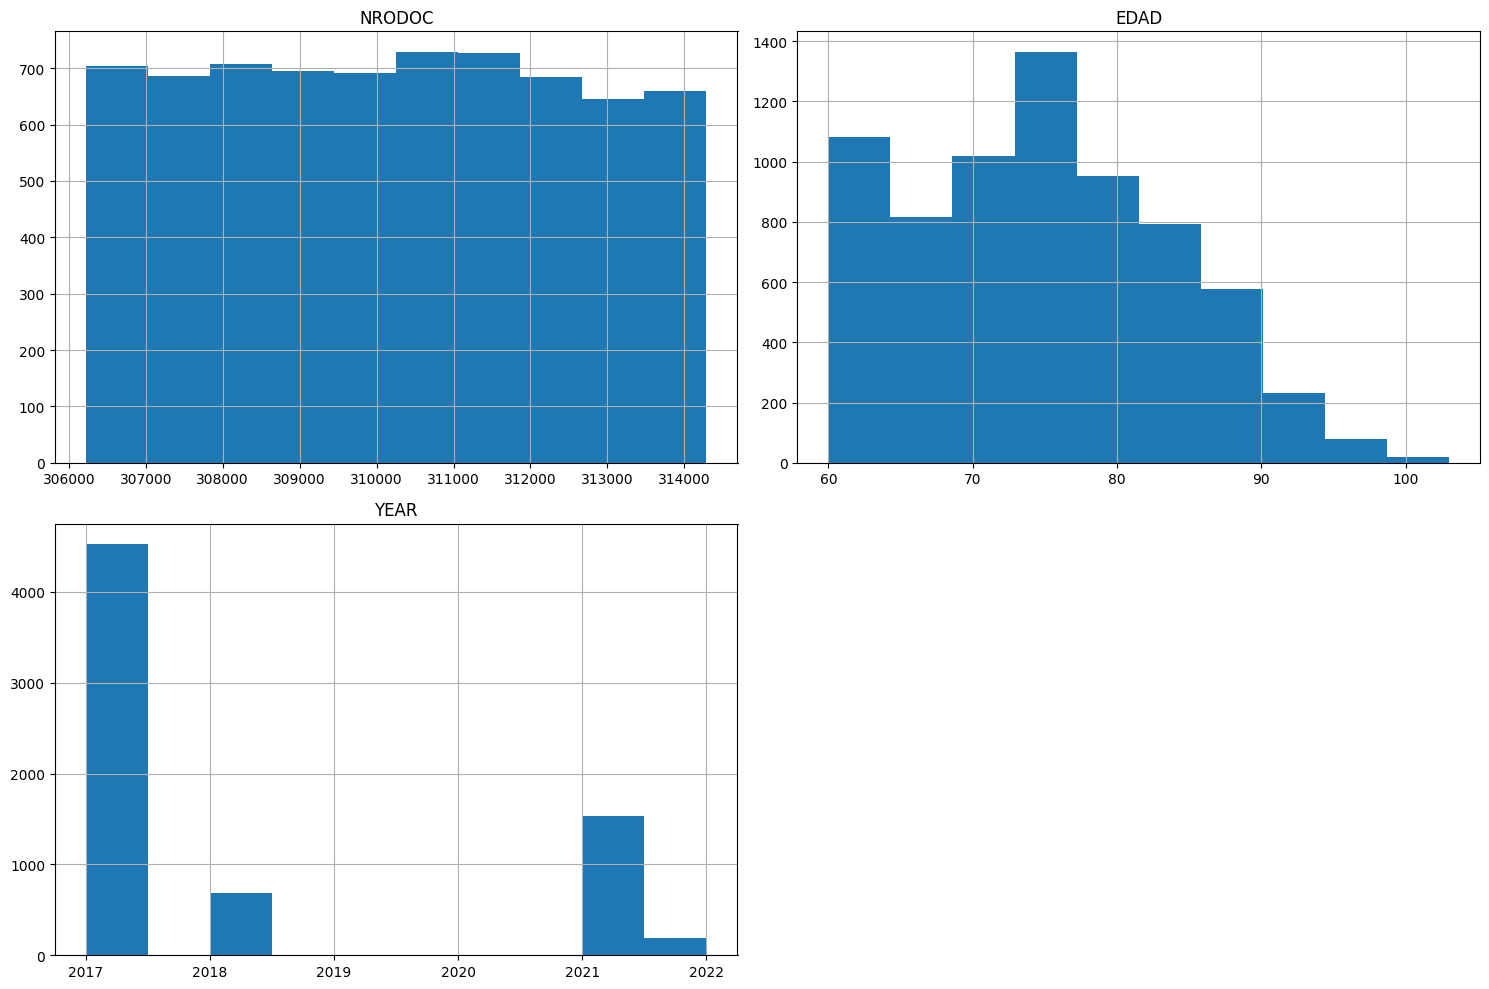

In [50]:
# Distribución de variables numéricas
df_usuarios60.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

In [51]:
#Distribución de Variables Categóricas
for column in df_usuarios60.select_dtypes(include=['object']).columns:
    print(df_usuarios60[column].value_counts())

SEXO
F    4422
M    2508
Name: count, dtype: int64
MES
SEPTIEMBRE    4298
ENERO         1266
OCTUBRE        354
DICIEMBRE      354
JUNIO          179
AGOSTO         152
MARZO          112
FEBRERO         90
NOVIEMBRE       53
MAYO            35
JULIO           24
ABRIL           13
Name: count, dtype: int64
ÚLTIMA CLASE FUNCIONAL
SIN CLASIFICAR        5210
CLASE FUNCIONAL 2A     650
CLASE FUNCIONAL 2B     611
CLASE FUNCIONAL 4      266
CLASE FUNCIONAL 3      138
CLASE FUNCIONAL 1       55
Name: count, dtype: int64
QUINQUENIO
70-74     1343
75-79     1284
80-84     1096
60-64     1083
65-69     1049
85-89      668
>90        407
Name: count, dtype: int64


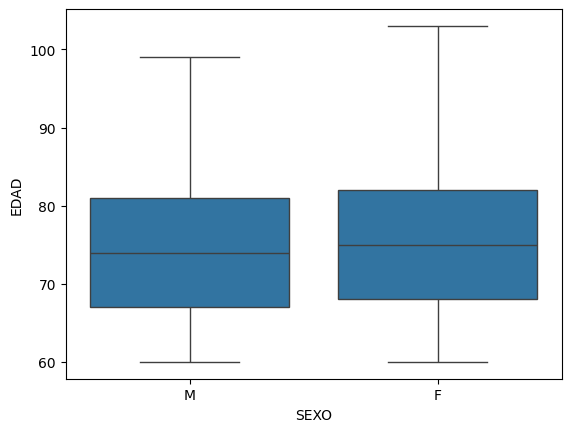

In [52]:
#Comparación entre grupos
sns.boxplot(x='SEXO', y='EDAD', data=df_usuarios60)
plt.show()

                                             |          | [  0%]   00:00 -> (? left)


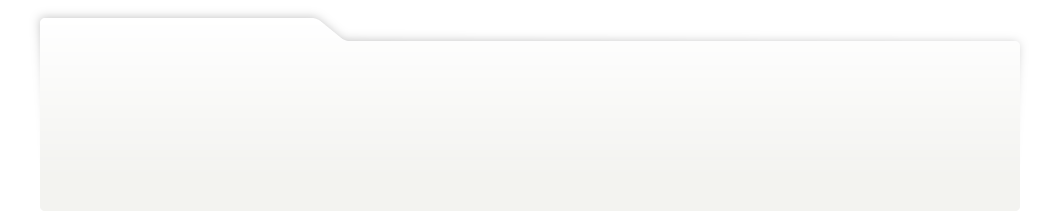
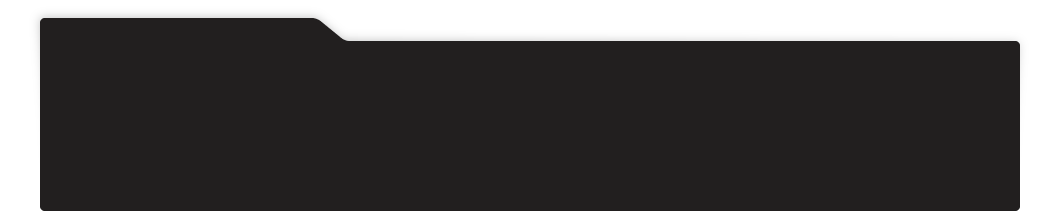
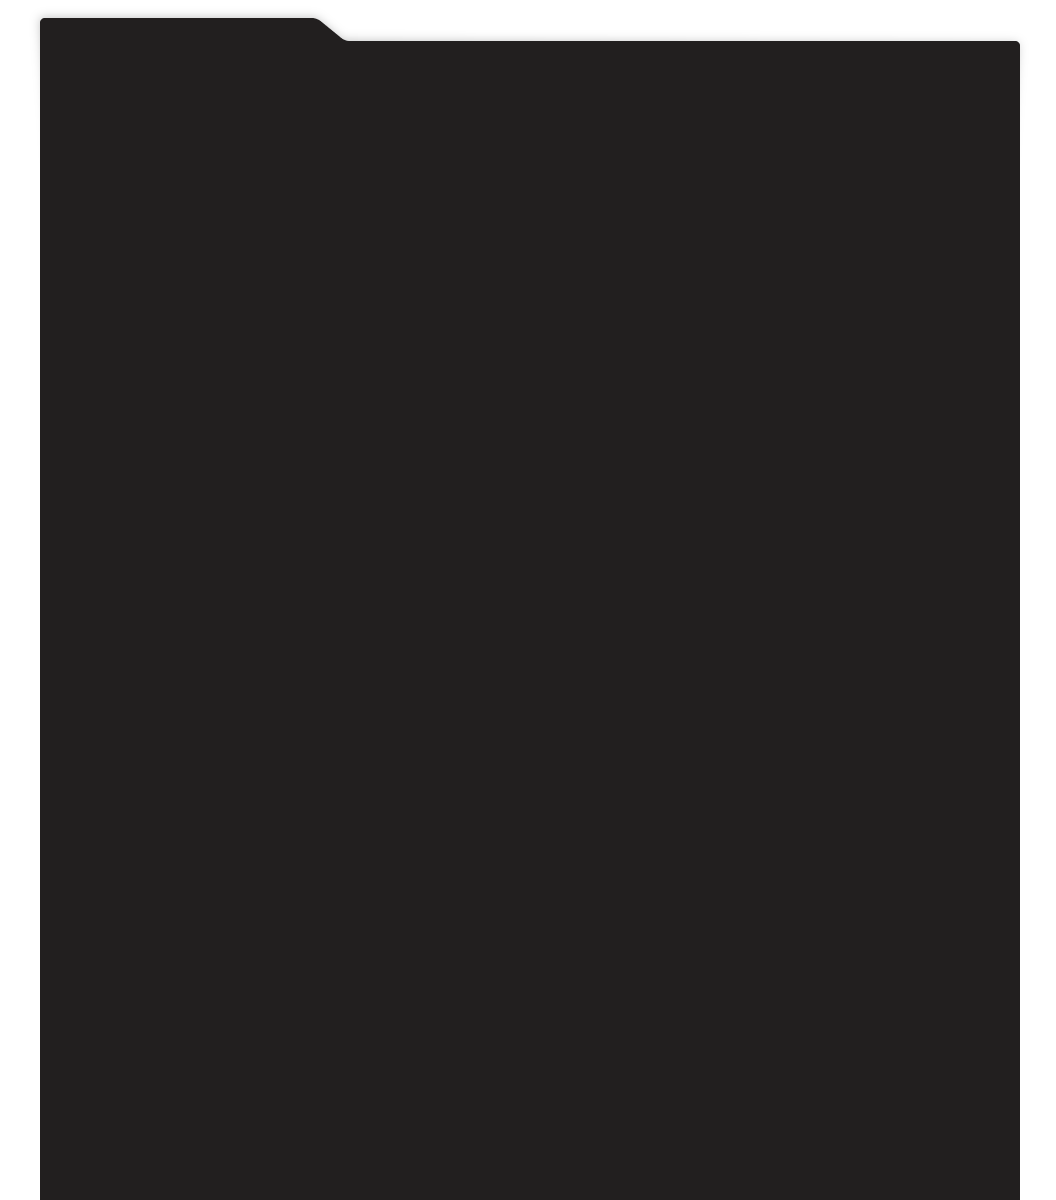
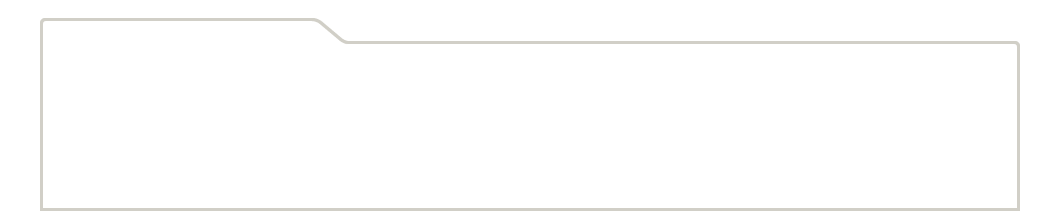
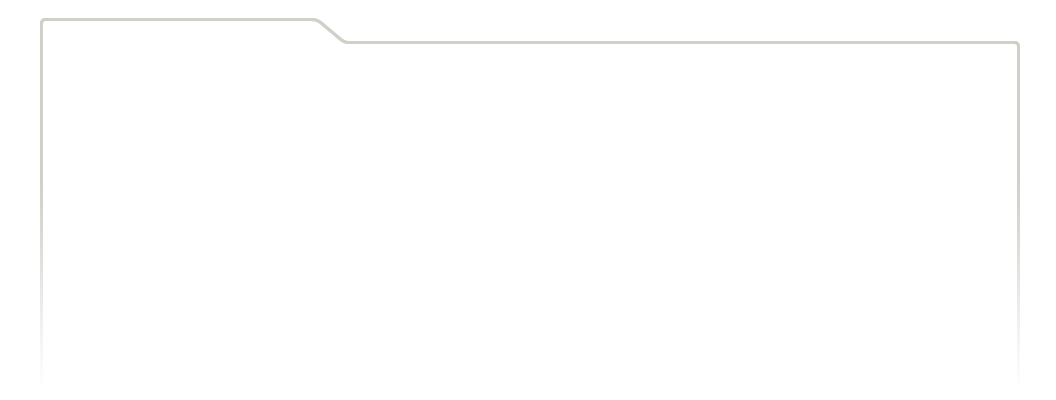
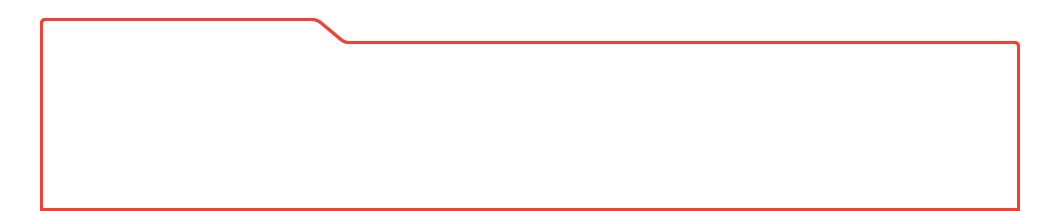
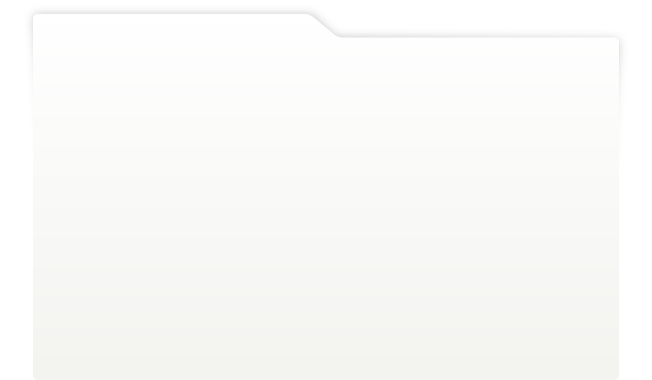
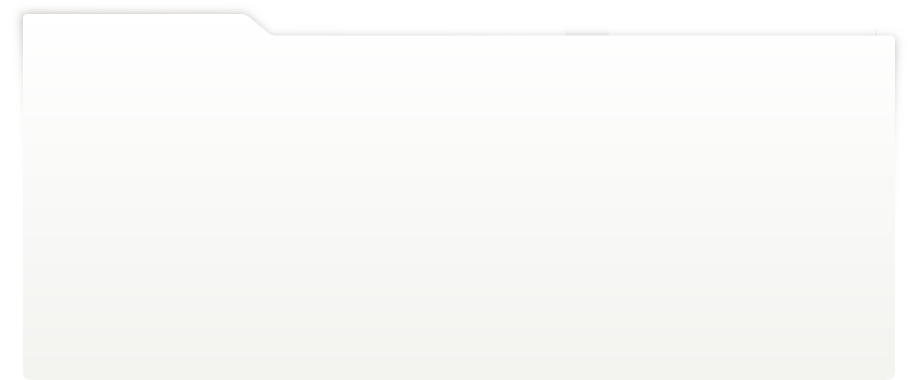
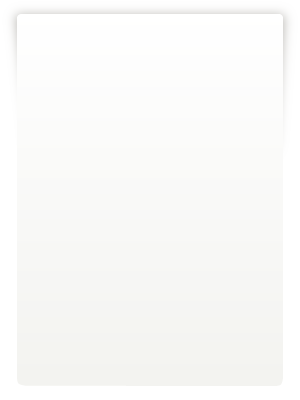
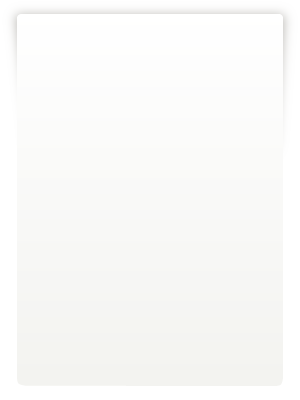
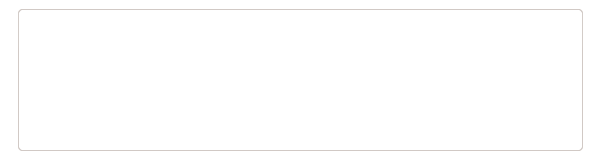
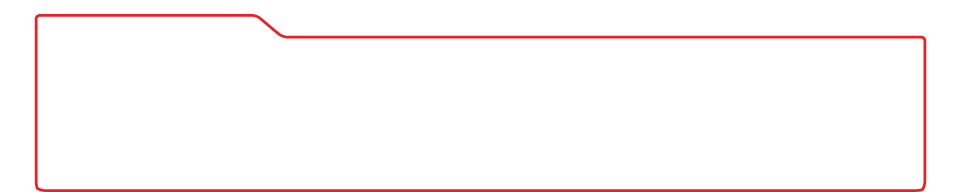
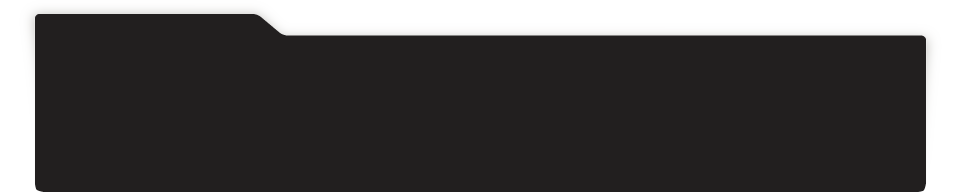
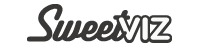
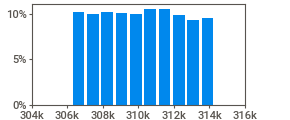
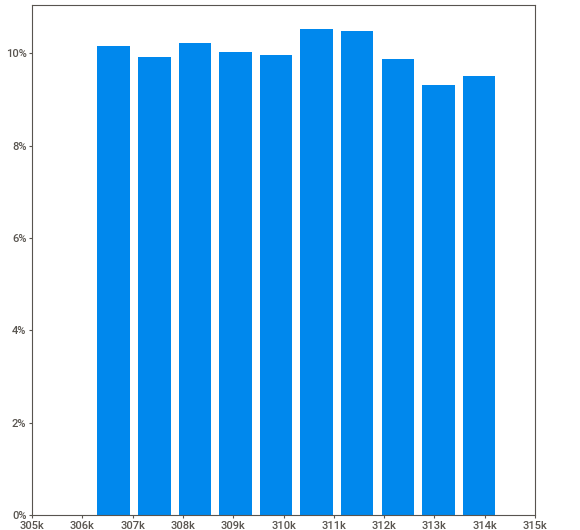
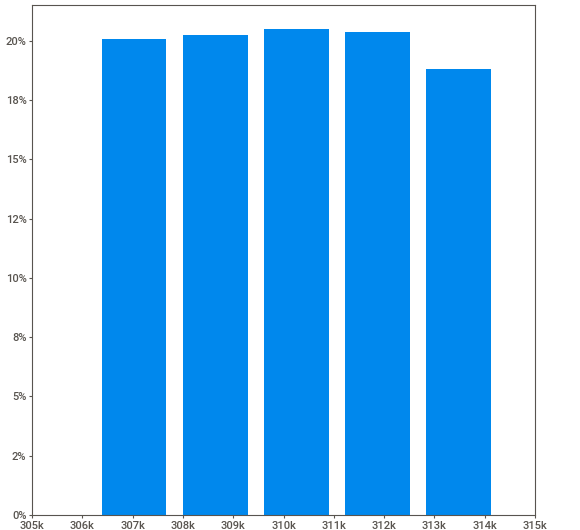
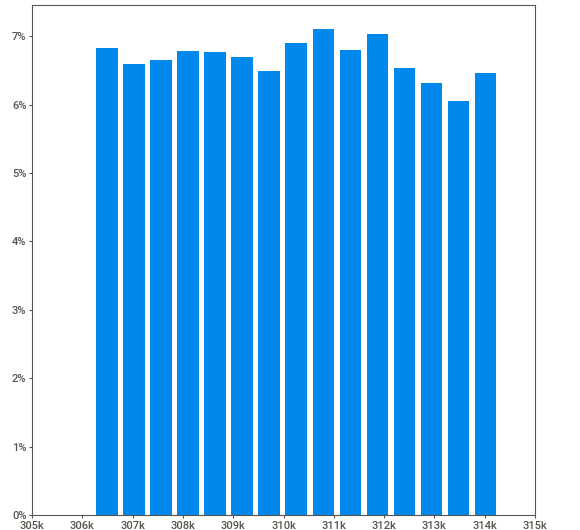
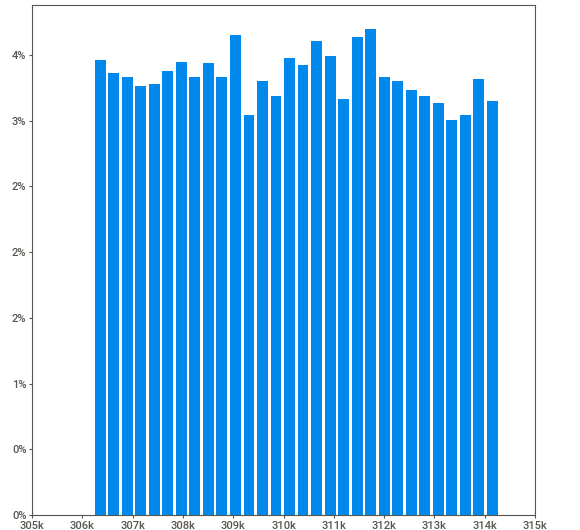
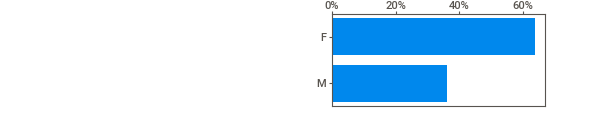
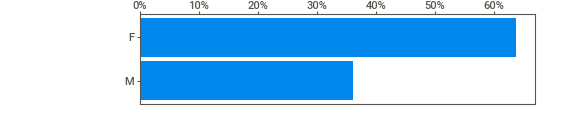
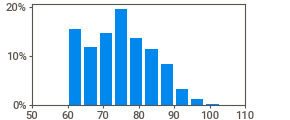
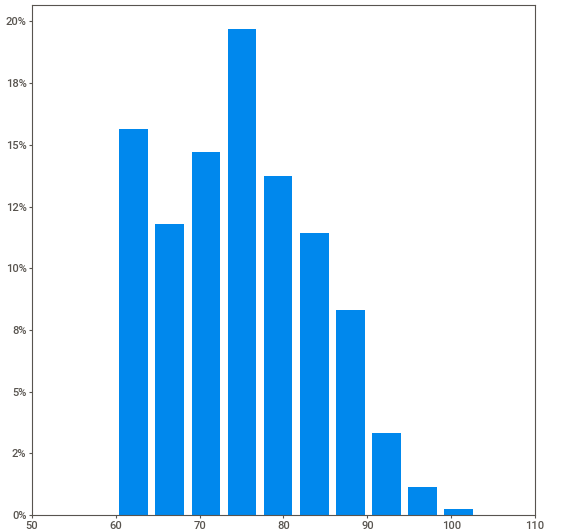
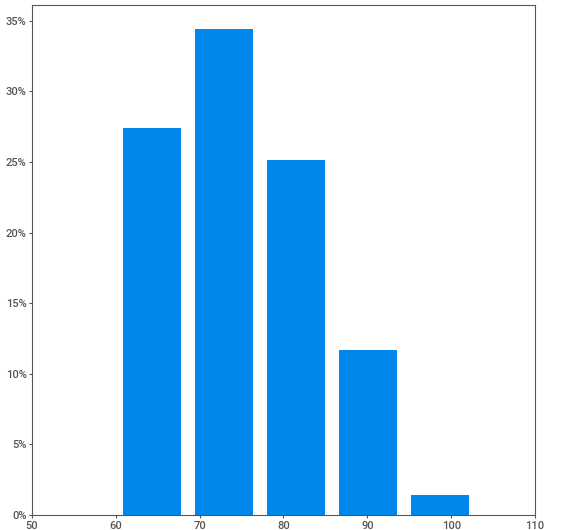
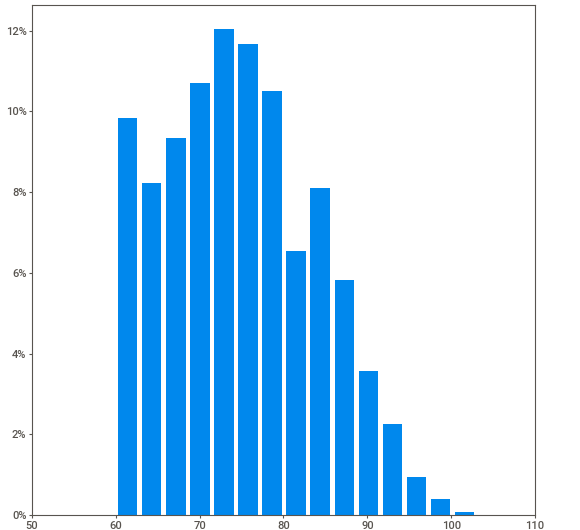
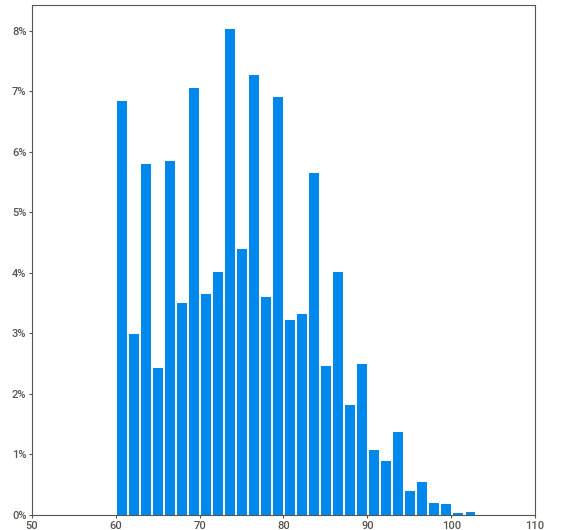
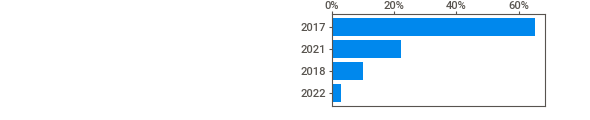
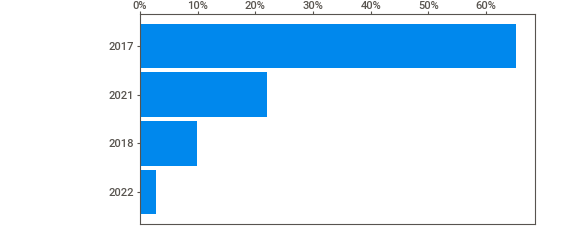
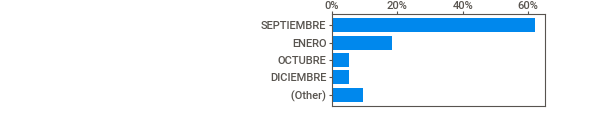
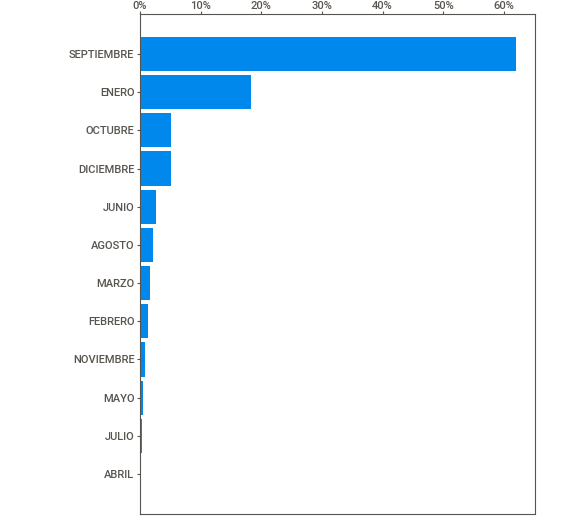
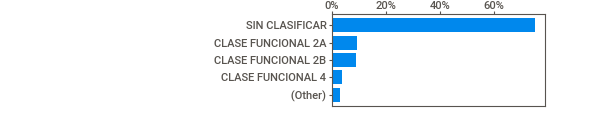
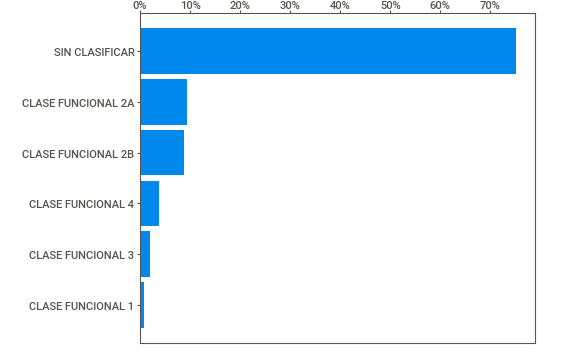
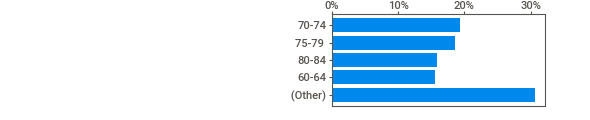
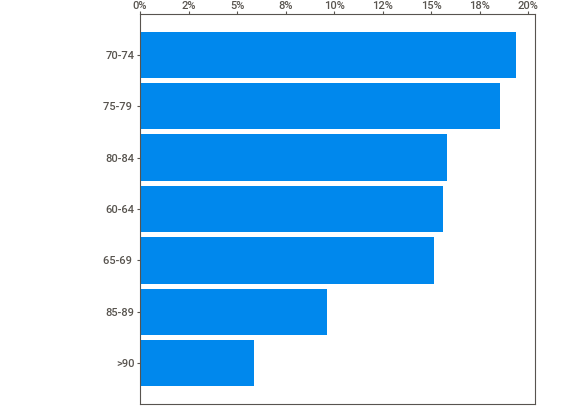
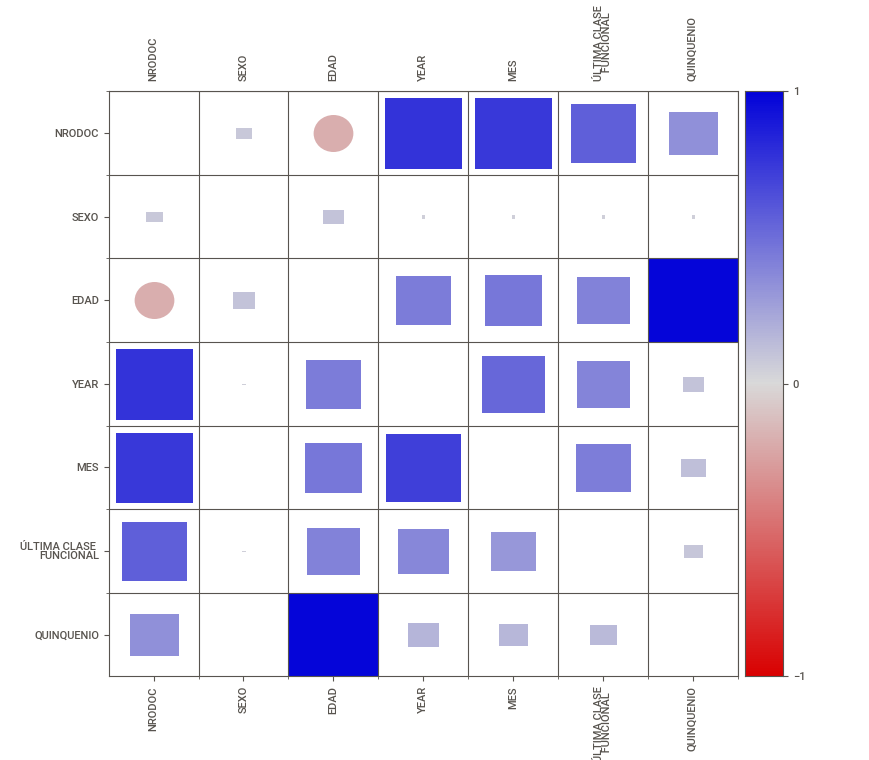
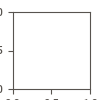

In [53]:
#Ahora haremos una exploración rapida de las variables del df df_usuarios60
rgd = sv.analyze(df_usuarios60)
rgd.show_notebook()

De esta exploración inicial, en la base de usuarios, puede decirse que el 64% son usuarios de sexo femenino y 36% masculino.
En cuanto a la edad, se tiene el primer filtro que sea igual o mayor que 60 años, la mayor parte se concentra en los 75 años y se tiene una edad máxima de 103 años.
Se tiene información de usuarios que ingresaron al programa desde el año 2017 con la mayoría de registros (65%) y hasta 2022 con la menor proporción (3%).
El mes de septiembre es en el que mayores registros se tiene (62%).
La mayoría de los registros no tienen clasificación de clase funcional (75%), a pesar que es una variable que se resalta en el contexto del caso y que parece importante. 9% pertenece a la clase funcional 2A, 9% a la 2B, 4% a la clase funcional 4, 2% a la clase funcional 3 y menos del 1% pertenece a la clase funcional 1.
Y la clasificación por quiquenio (5 años de edad), se tiene concentrada en las categorías 70-74 y 75-79 con 19% de los datos cada una.



##Base egresos

In [54]:
#Resumen Estadístico: Descripción básica de las variables numéricas
print(df_egresos60.describe())

              YEAR         NRODOC          FECHA INGRESO CLINICA  \
count  3635.000000    3635.000000                           3635   
mean   2019.134250  309647.841265  2019-08-23 13:00:28.624550656   
min    2017.000000  306223.000000     2017-12-19 10:59:05.197000   
25%    2018.000000  307858.500000  2018-06-06 17:27:04.718500096   
50%    2018.000000  309708.000000  2018-10-20 22:30:32.952999936   
75%    2021.000000  311370.000000  2021-05-05 10:47:39.829999872   
max    2021.000000  314023.000000     2021-12-31 17:27:17.290000   
std       1.474838    2004.326070                            NaN   

              FECHA INGRESO SERVICIO                   FECHA SALIDA  \
count                           3635                           3635   
mean   2019-08-25 22:33:54.666492928  2019-08-31 01:01:26.295735808   
min       2017-12-19 17:40:00.860000            2017-12-21 14:08:28   
25%    2018-06-08 15:45:12.242999808            2018-06-13 13:21:17   
50%    2018-10-23 01:55:58.24999

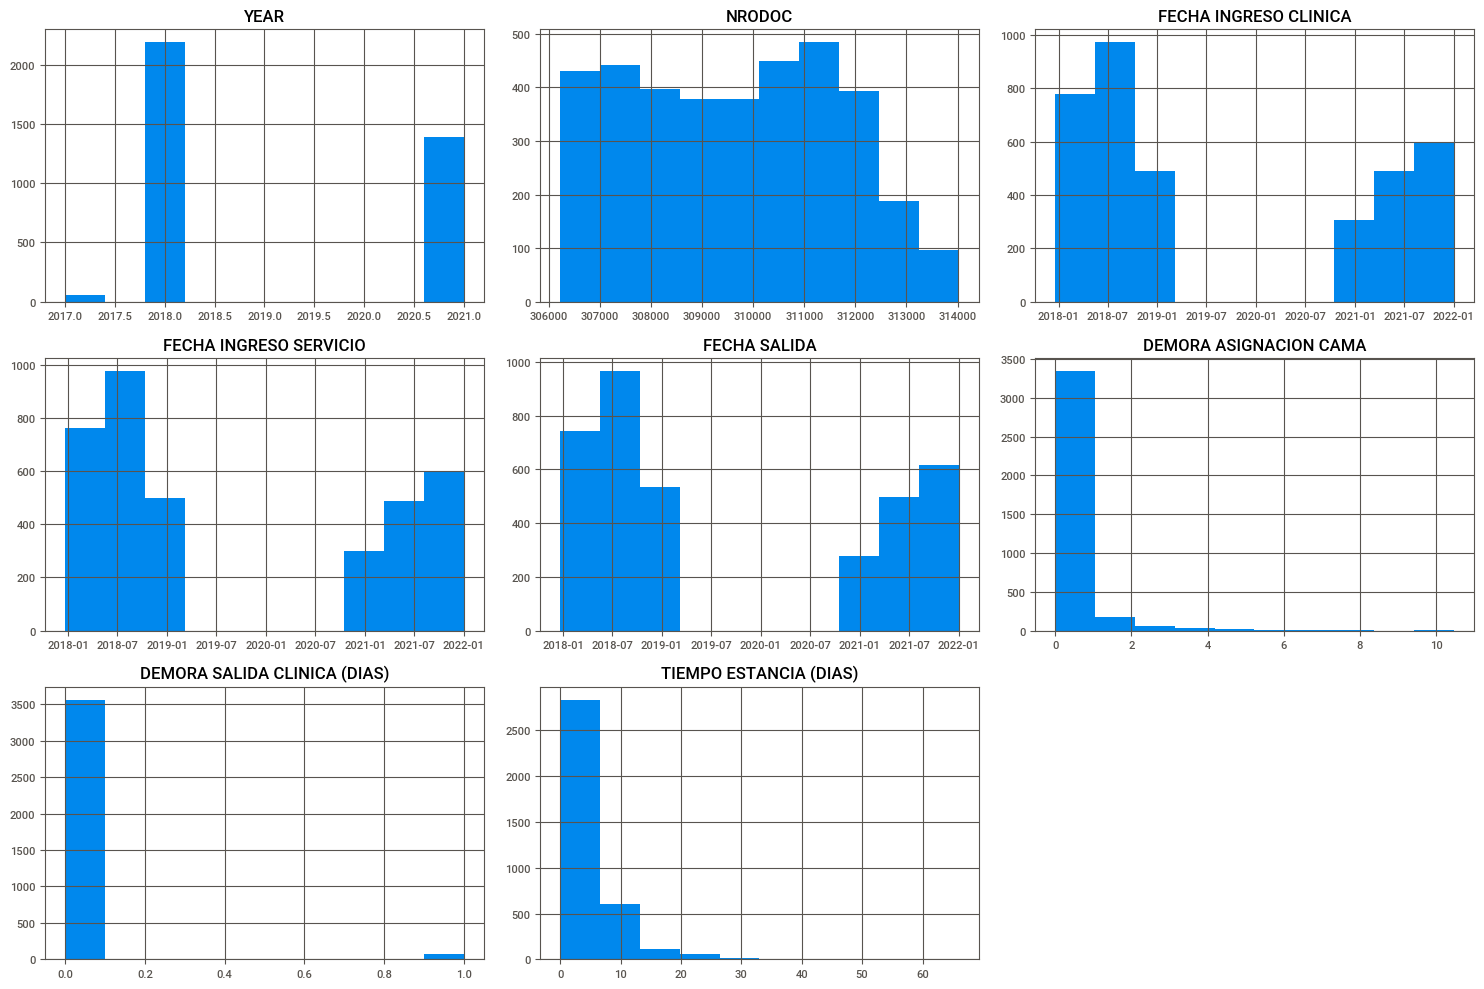

In [55]:
# Distribución de variables numéricas
df_egresos60.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

In [56]:
#Distribución de Variables Categóricas
for column in df_egresos60.select_dtypes(include=['object']).columns:
    print(df_egresos60[column].value_counts())

MES
DICIEMBRE     410
MARZO         354
OCTUBRE       350
SEPTIEMBRE    330
AGOSTO        328
JUNIO         306
JULIO         303
ENERO         301
FEBRERO       297
NOVIEMBRE     288
MAYO          285
ABRIL          83
Name: count, dtype: int64
REGIMEN AFILIACION
Contributivo    3633
Subsidiado         2
Name: count, dtype: int64
EPS VALIDADA
NUEVA EPS S.A. PGP    3635
Name: count, dtype: int64
MODALIDAD CONTRATO
PGP    3635
Name: count, dtype: int64
VIA INGRESO
Urgencias                        2540
Remitido                          935
Consulta Externa ó Programada     160
Name: count, dtype: int64
SERVICIO EGRESO
Piso 5 Medicina Interna Sur          533
Piso 7 Medicina Interna Norte        456
Piso 7 Medicina Interna Sur          427
Piso 4 Medicina Interna Sur          192
Piso 5 Medicina Interna Norte        184
Piso_10 Medicina Interna             161
Piso 8 Medicina Interna Sur          122
Piso 9 Medicina Interna Sur          122
Piso 8 Medicina Interna Norte        121
Piso 3 

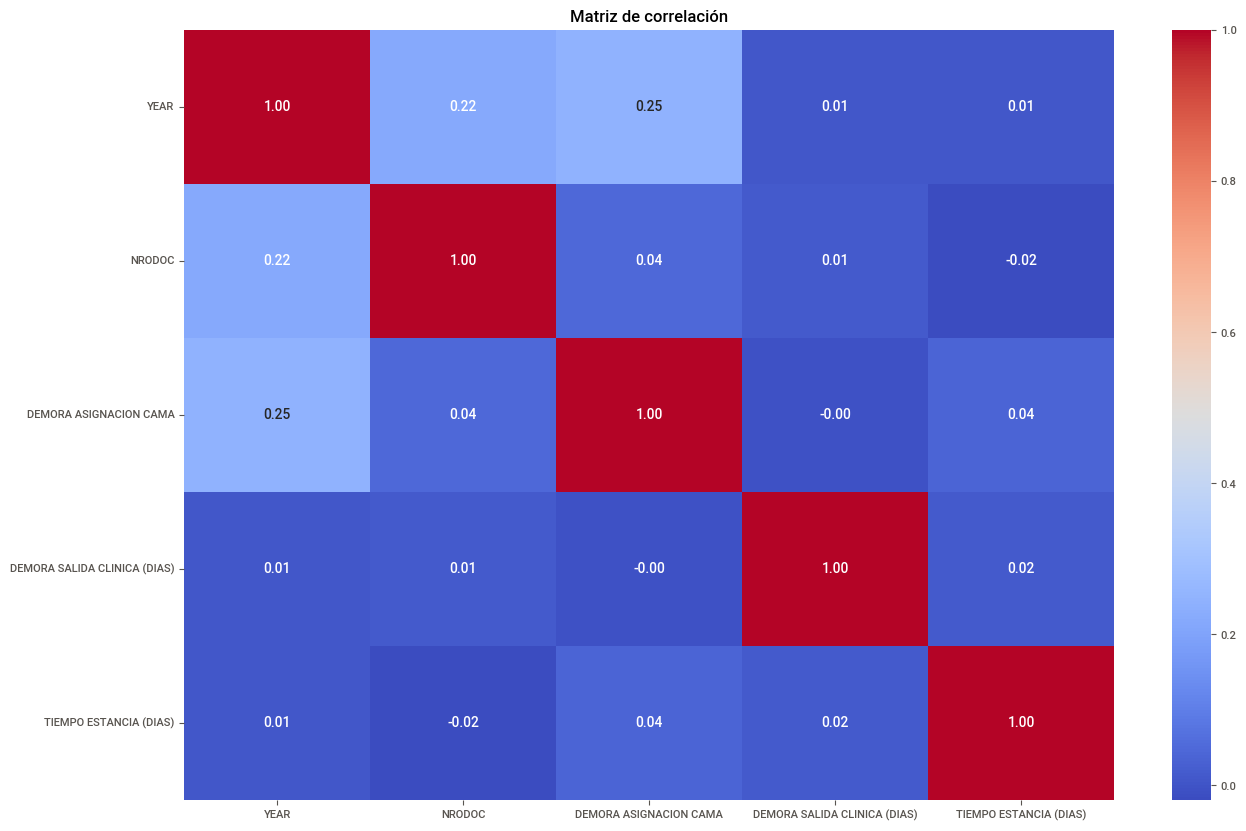

In [57]:
#Correlación entre Variables: Matriz de correlación para variables numéricas.
# Seleccionar solo las columnas numéricas
numeric_cols = df_egresos60.select_dtypes(include=['float64', 'int64']).columns

# Calcular la matriz de correlación
corr_matrix = df_egresos60[numeric_cols].corr()

# Visualizar la matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

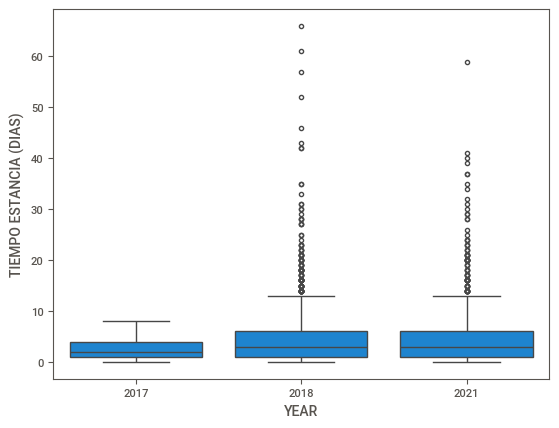

In [58]:
#Comparación entre Grupos
sns.boxplot(x='YEAR', y='TIEMPO ESTANCIA (DIAS)', data=df_egresos60)
plt.show()

                                             |          | [  0%]   00:00 -> (? left)


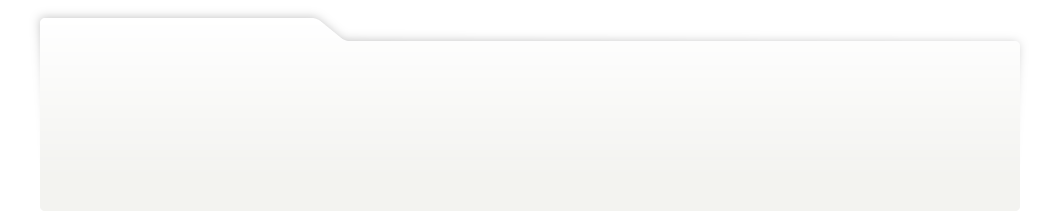
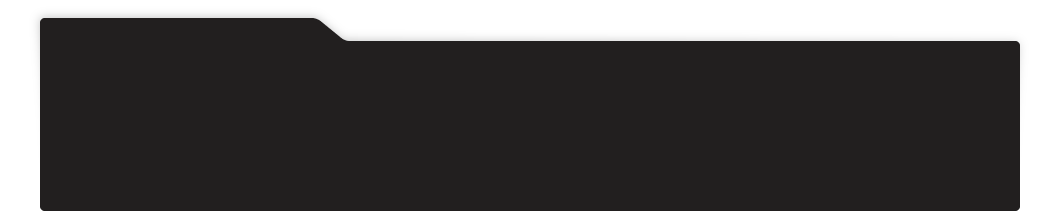
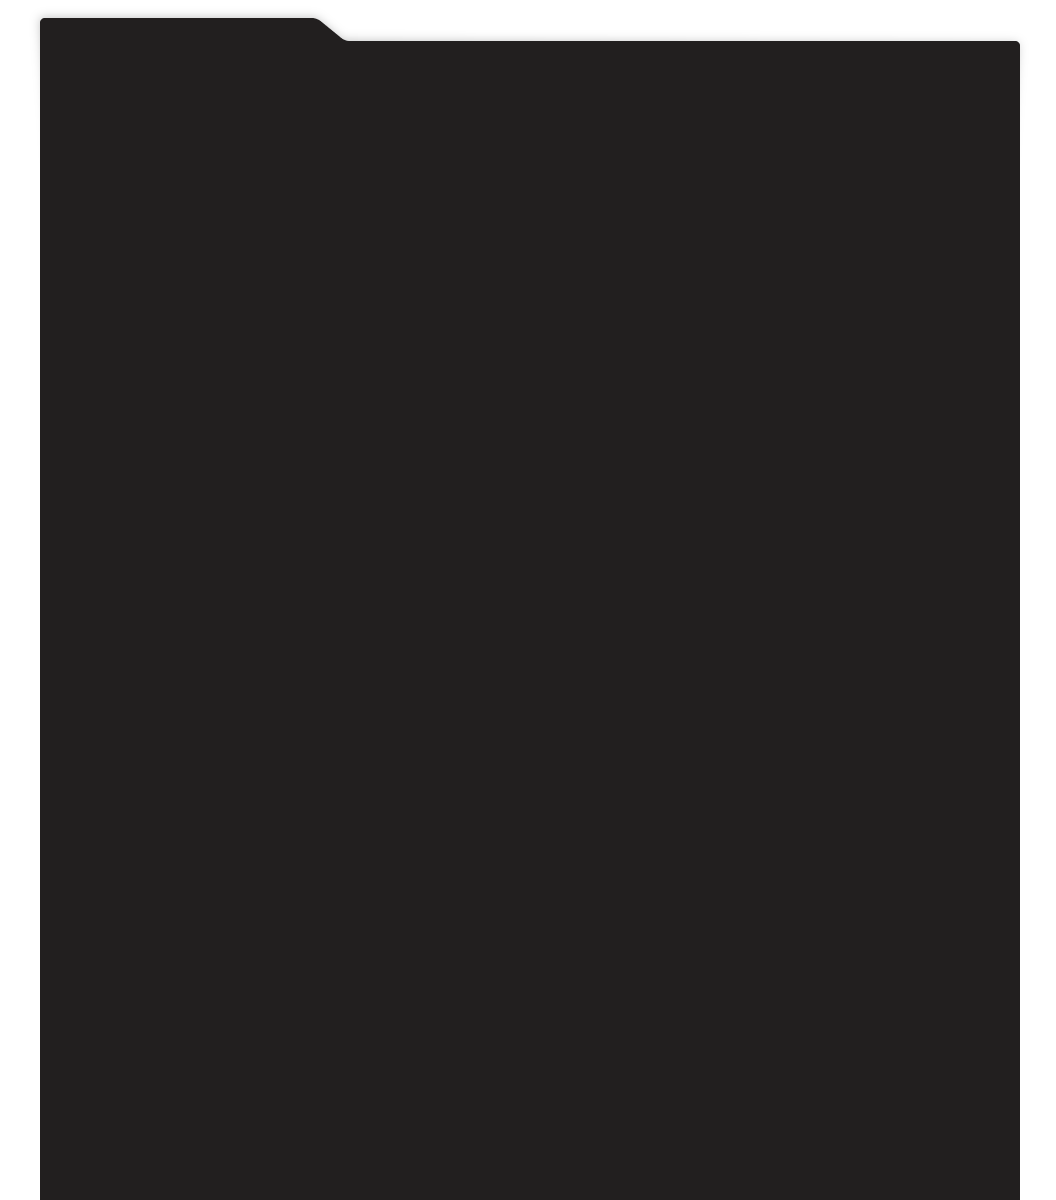
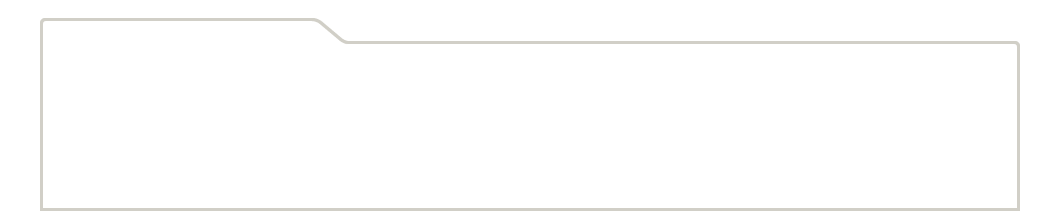
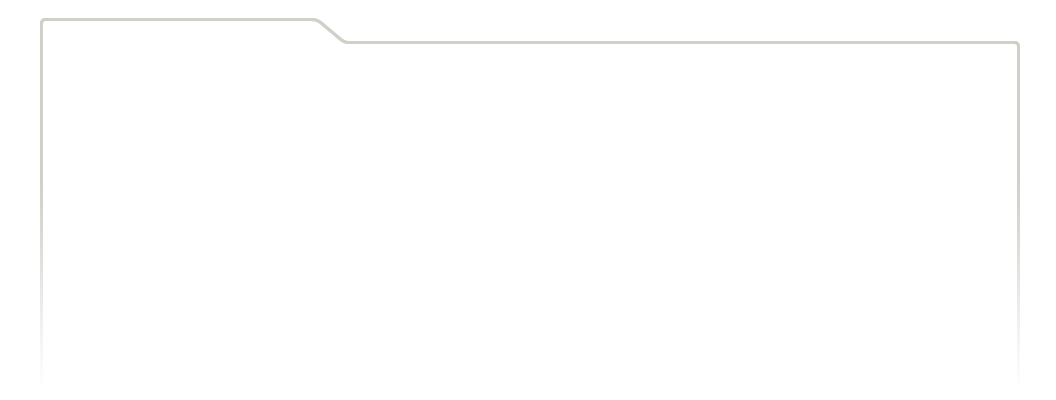
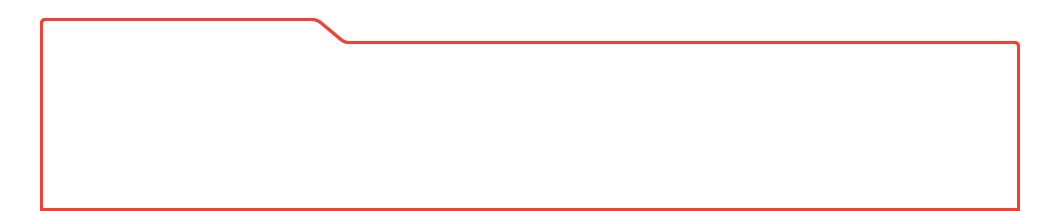
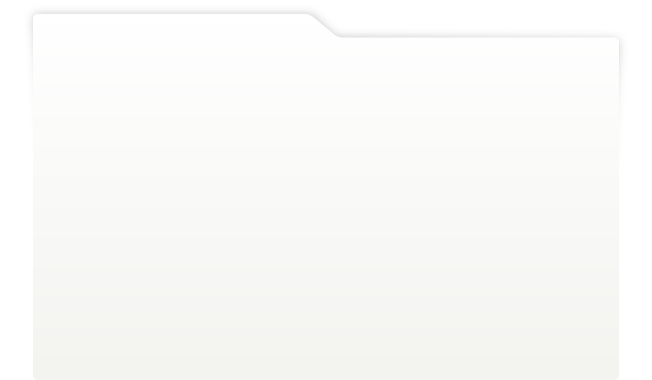
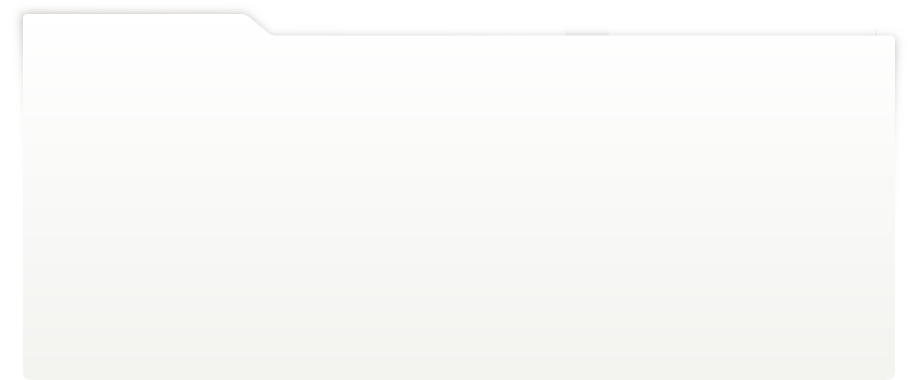
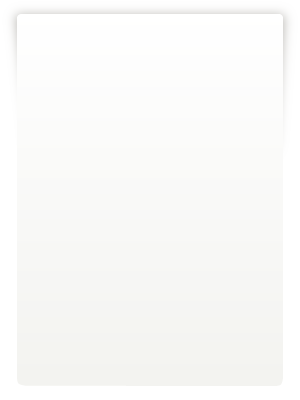
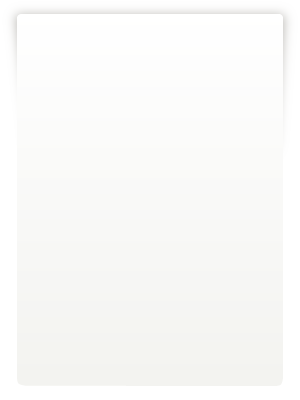
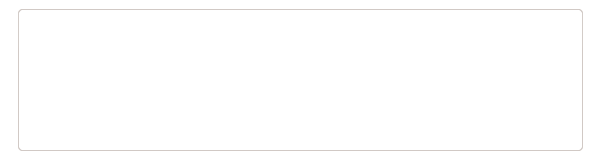
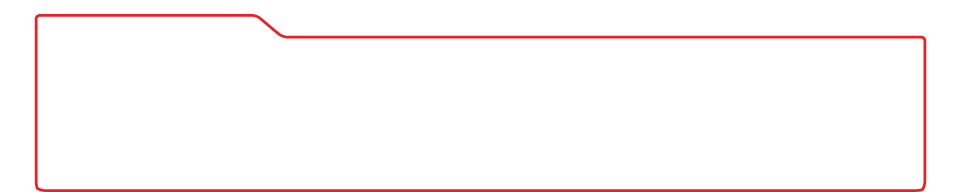
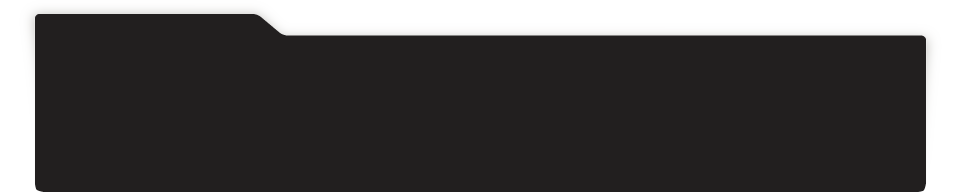
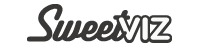
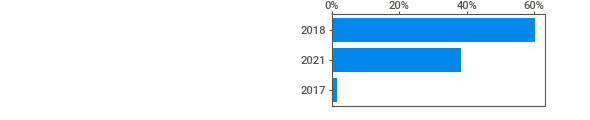
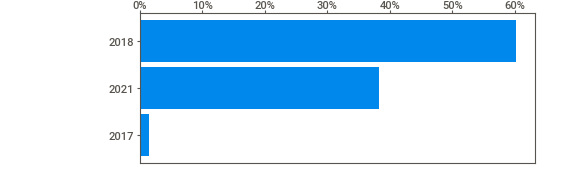
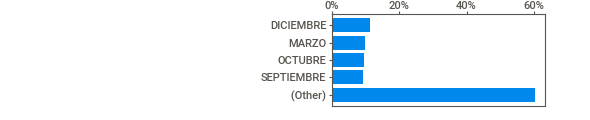
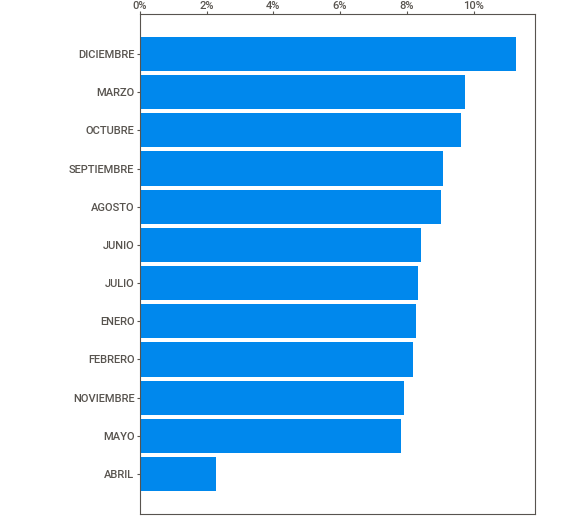
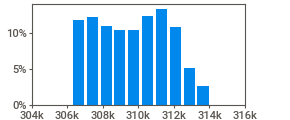
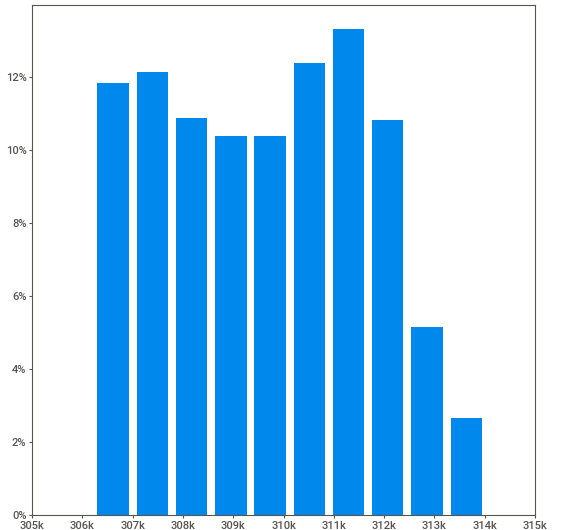
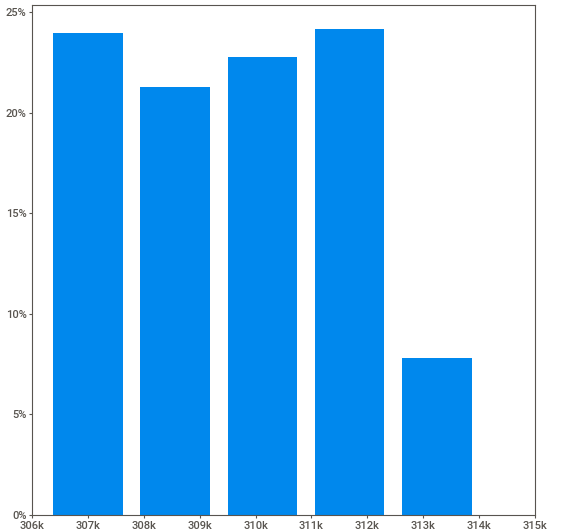
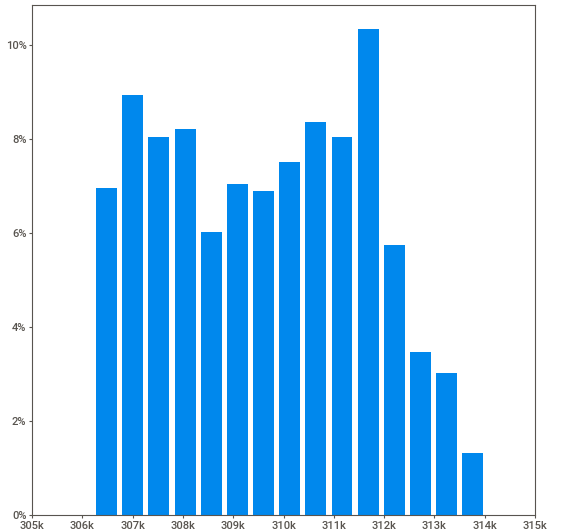
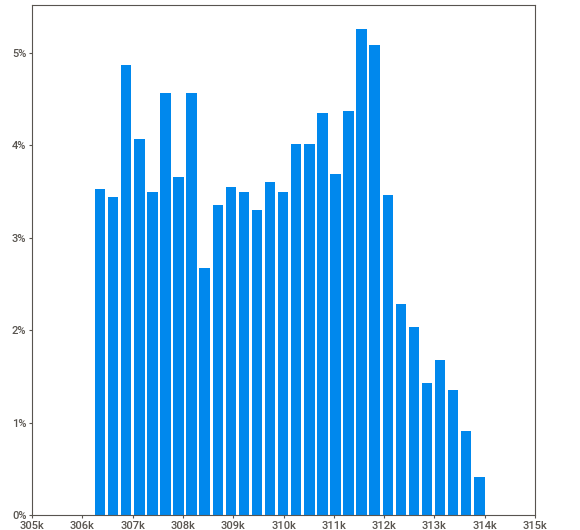
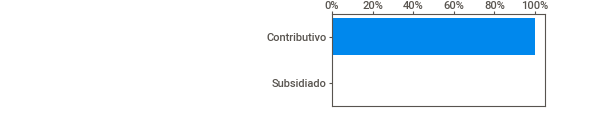
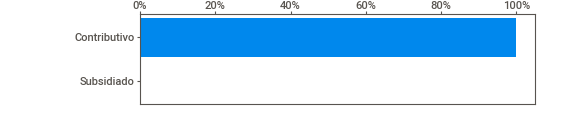
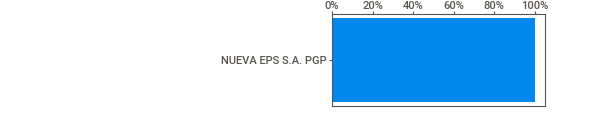
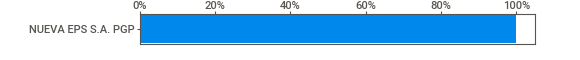
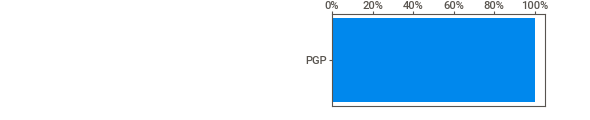
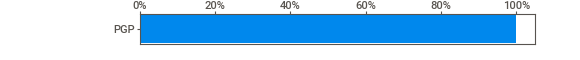
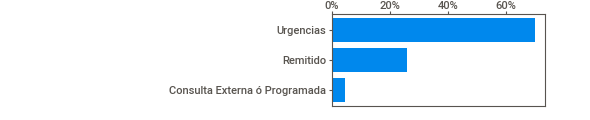
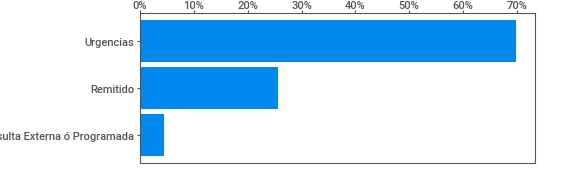
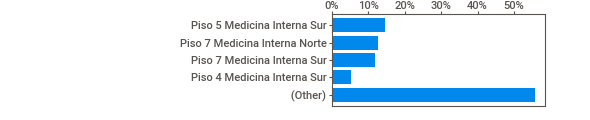
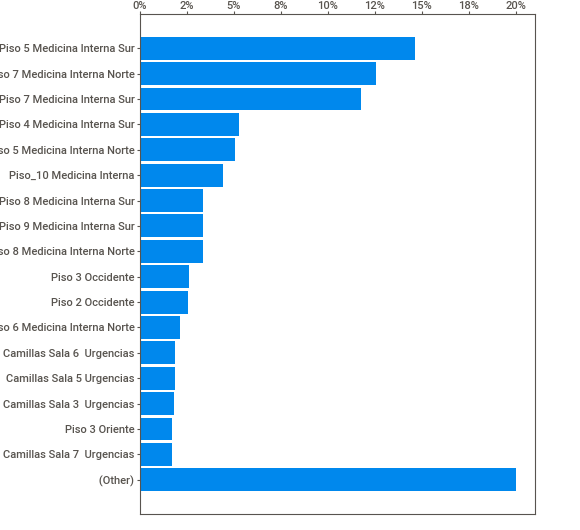
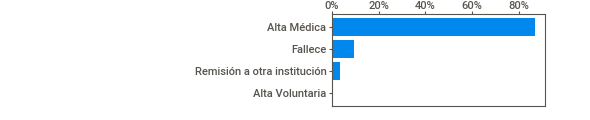
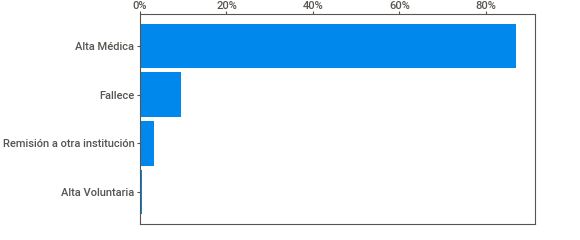
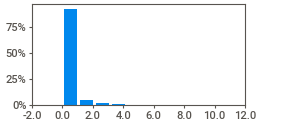
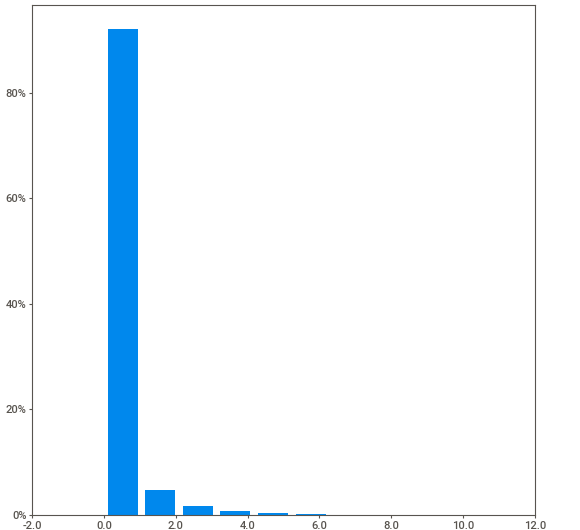
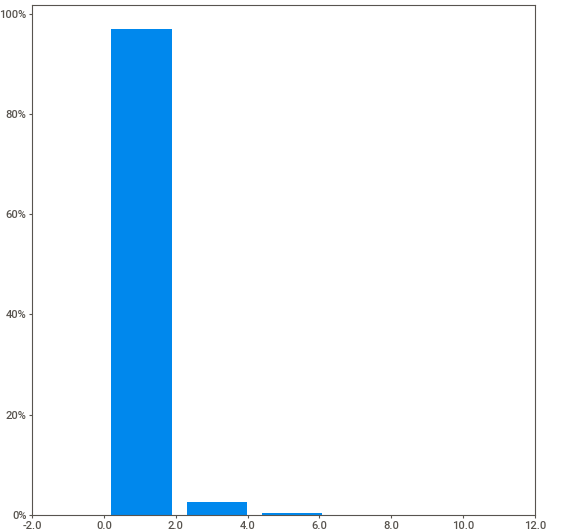
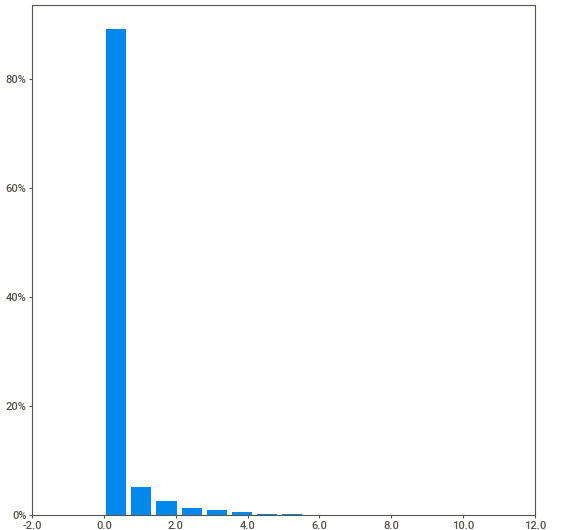
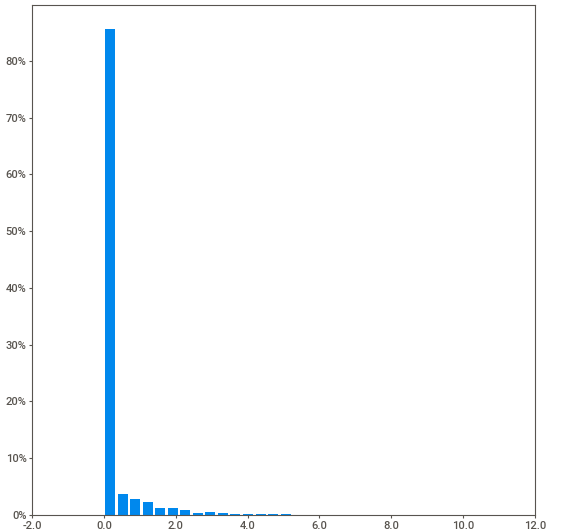
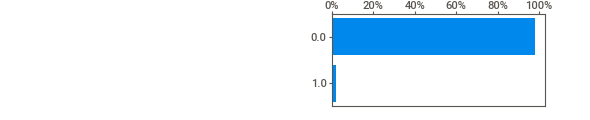
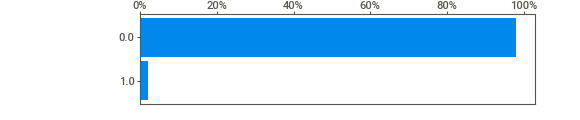
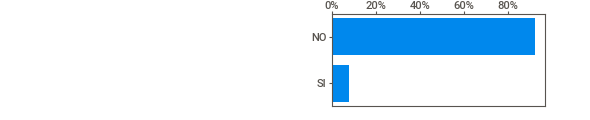
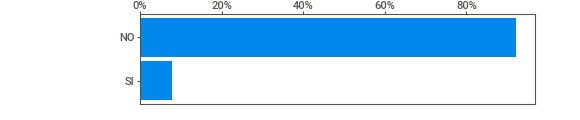
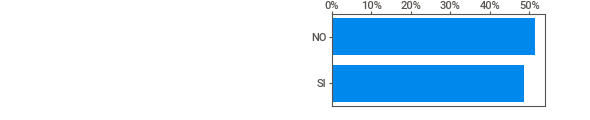
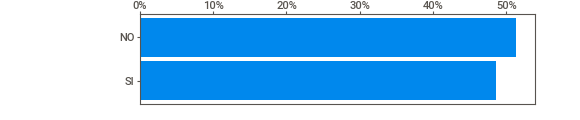
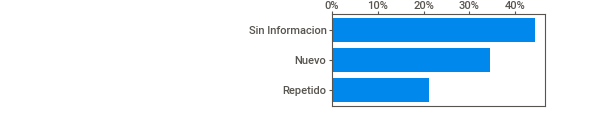
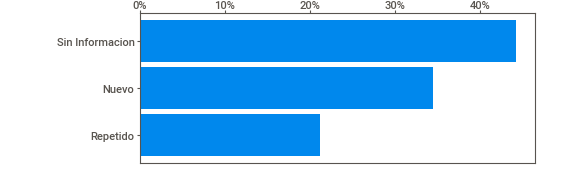
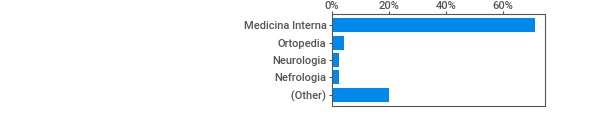
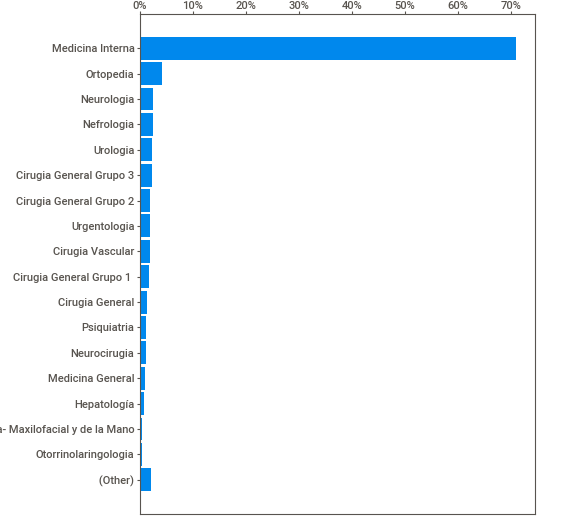
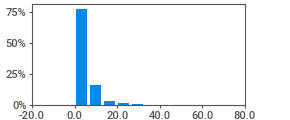
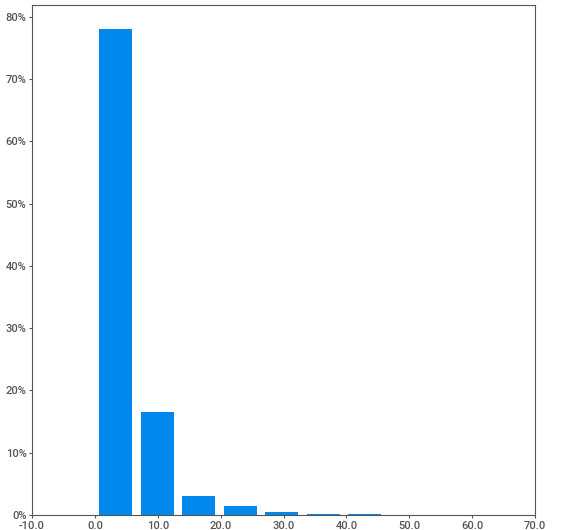
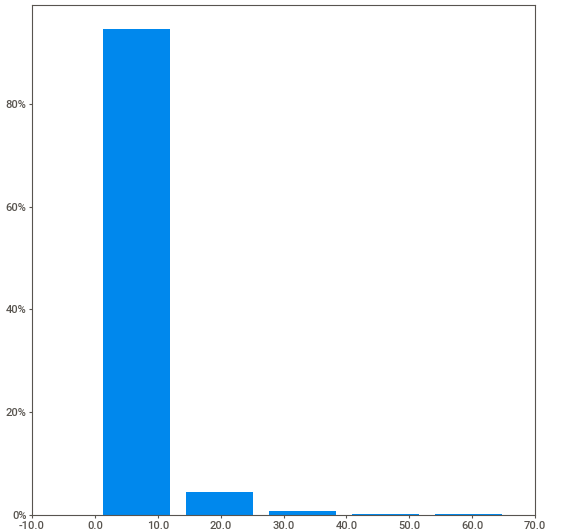
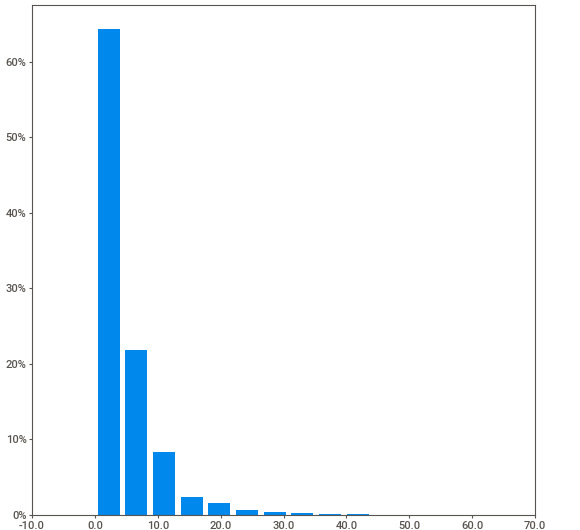
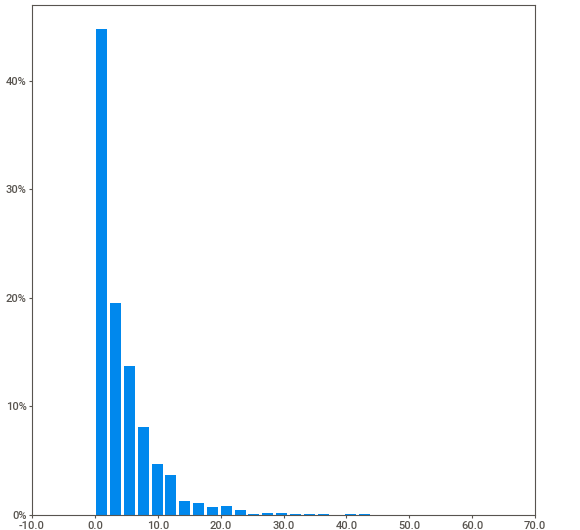
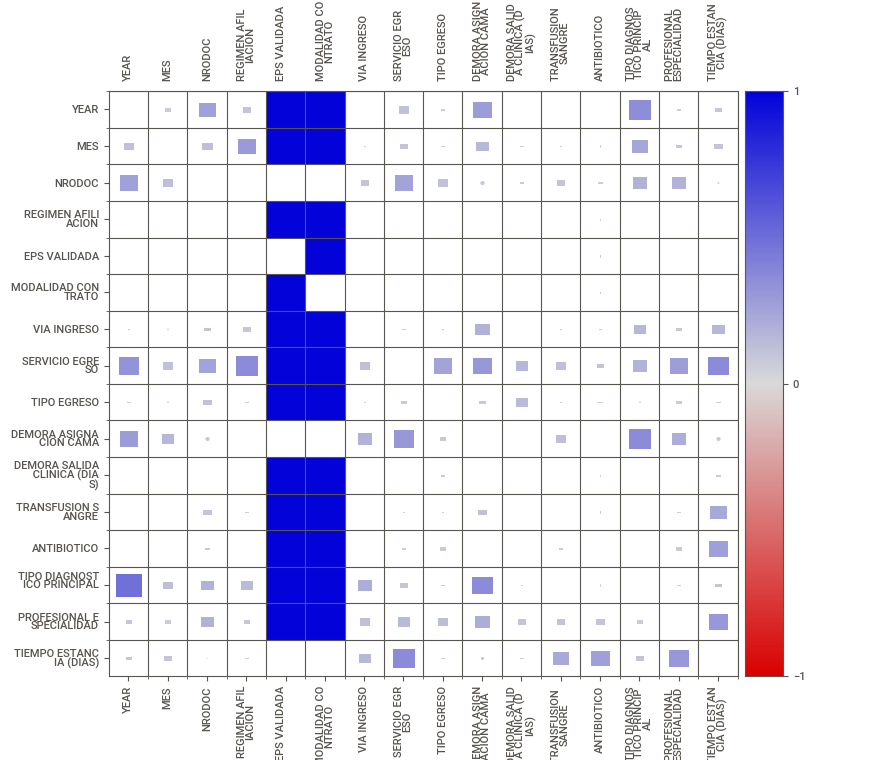
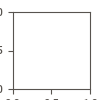

In [59]:
#ahora haremos una exploración rápida de las variables del df_egresos60
rgd = sv.analyze(df_egresos60)
rgd.show_notebook()

La mayoría de los datos en esta base de egresos, corresponden al año 2018 (60%), se tiene también de los años 2017 y 2021.
En el mes de diciembre es en el cual se da mayor cantidad de registros de ingresos (11%)
El régimen de afiliación es principalmente Contibutivo con más del 99% de los datos.
La EPS a la que pertenecen los usuarios es en un 100% a la NUEVA EPS S.A. PGP.
La modalidad del contrato es PGP en un 100% ya que se realizó el filtro, por lo que estas dos últimas variables pueden ser eliminadas.
La vía de ingreso a la clínica es 70% por Urgencias, 26% por remisión ysolo 4% por consulta externa o programada.
En cuanto al servicio de egreso, principalmente se da en el piso 5 que corresponde a Medicina Interna Sur con un 15%, aunque se tiene un 20% clasificado como otro.
El 87% de los tipos de egreso, se dan por Alta médica, 9% fallecen, 3% es por remisión a otra institución y menos del 1% se da por alta voluntaria.
El 75% de los casos, recibe inmediata asignación de cama unos instantes después de su ingreso a la clínica, sin embargo, hay casos de hasta 10,5 días de espera para asignación de cama (menos del 1%)
En cuanto a la demora de salida de la clínica que mide el tiempo entre el alta médica y la salida efectiva, se tiene que el 98% es menor a 1 día y un 2% es igual a 1 día.
El 92% de los usuarios no requieren transfusión de sangre.
El 51% de los usuarios no requieren medicamento, el 49% restante sí lo requieren.
En cuanto al tipo de diagnóstico principal, el 34% es un diagnóstico nuevo, 22% es diagnóstico repetido y 44% está sin información, se optará por trabajar solo con diagnósticos nuevos.
El 71% de las especialidades médicas es de Medicina interna.
Finalmente, el tiempo de estancia es de 4.6 días en promedio, con un máximo de 66 días y una mediana de 3 días.

In [60]:
#Vamos a tomar solo la información del tipo de diagnóstico principal "NUEVO", para disminuir repeticiones.
df_egresos60 = df_egresos60[df_egresos60['TIPO DIAGNOSTICO PRINCIPAL'] == 'Nuevo']

#Eliminamos las columnas de MODALIDAD CONTRATO, EPS VALIDADA, REGIMEN AFILIACION y TIPO DIAGNOSTICO PRINCIPAL, ya que se realizó anteriormente filtro por modalidad de contrato y
#directamente quedó solo una categoría en la EPS VALIDADA y en el REGIMEN AFILIACION. Además, se aplicó también el filtro para la categoría "Nuevo" en la variable
#TIPO DIAGNOSTICO PRINCIPAL, por lo que se retira de la base.
df_egresos60.drop(['MODALIDAD CONTRATO', 'EPS VALIDADA', 'REGIMEN AFILIACION', 'TIPO DIAGNOSTICO PRINCIPAL'], axis=1, inplace=True)

#Verificamos
print(df_egresos60)

      YEAR        MES  NRODOC VIA INGRESO                SERVICIO EGRESO  \
7     2018      MARZO  310222   Urgencias  Piso 6 Medicina Interna Norte   
11    2021      JUNIO  307108    Remitido    Piso 5 Medicina Interna Sur   
15    2018      MARZO  308738   Urgencias                 Piso 4 Oriente   
27    2018    FEBRERO  307058   Urgencias     Camillas Sala 1  Urgencias   
31    2021      MARZO  307411   Urgencias    Piso 5 Medicina Interna Sur   
...    ...        ...     ...         ...                            ...   
6371  2021      MARZO  312056   Urgencias    Piso 7 Medicina Interna Sur   
6372  2018    FEBRERO  308757   Urgencias  Piso 7 Medicina Interna Norte   
6373  2018      MARZO  308759   Urgencias       Piso_10 Medicina Interna   
6374  2021  NOVIEMBRE  313987   Urgencias  Piso 4 Medicina Interna Norte   
6375  2021    OCTUBRE  313921   Urgencias                     Piso 6 UCE   

                      TIPO EGRESO   FECHA INGRESO CLINICA  \
7                         

<ipython-input-60-c85fd319d5de>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_egresos60.drop(['MODALIDAD CONTRATO', 'EPS VALIDADA', 'REGIMEN AFILIACION', 'TIPO DIAGNOSTICO PRINCIPAL'], axis=1, inplace=True)


##Base crónicos

In [61]:
# Resumen Estadístico:Descripción básica de las variables numéricas
print(df_cronicos60.describe())

              YEAR         NRODOC         PESO        TALLA
count  2556.000000    2556.000000  2556.000000  2556.000000
mean   2018.992958  309721.067684    68.175176   155.726411
std       1.815553    2052.156911    14.998560    14.334392
min    2017.000000  306223.000000     1.000000     1.000000
25%    2017.000000  307889.000000    58.000000   150.000000
50%    2018.000000  309796.000000    68.000000   156.000000
75%    2021.000000  311446.250000    77.000000   163.000000
max    2022.000000  313987.000000   171.000000   190.000000


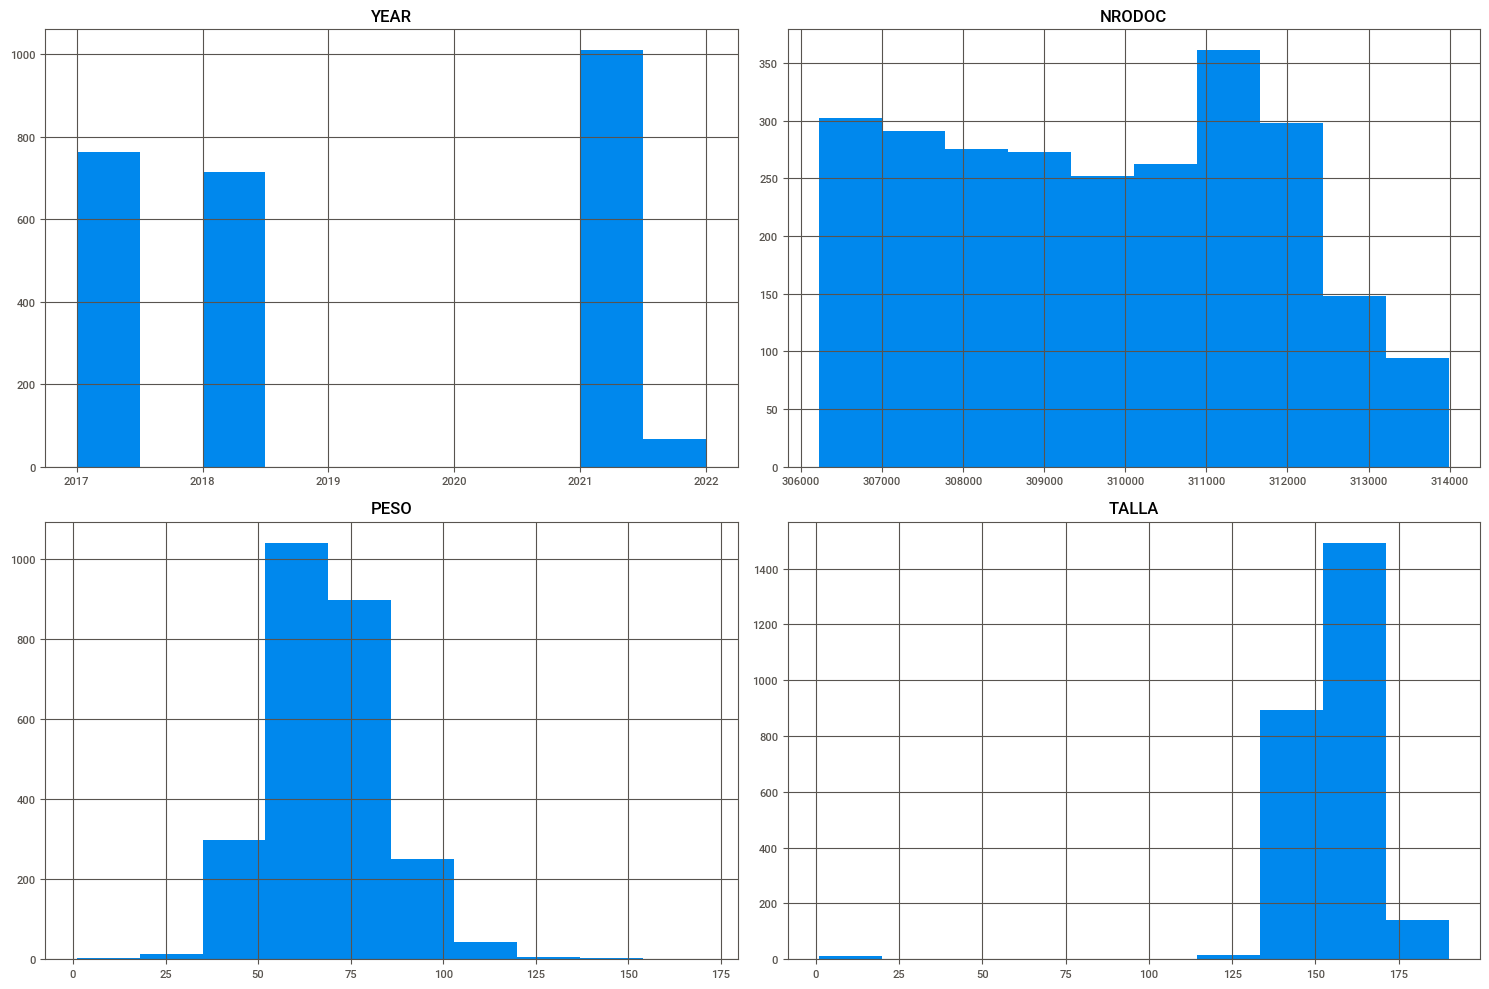

In [62]:
#Distribución de Variables Numéricas
df_cronicos60.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

In [63]:
#Distribución de Variables Categóricas: Conteo de valores únicos para variables categóricas
for column in df_cronicos60.select_dtypes(include=['object']).columns:
    print(df_cronicos60[column].value_counts())

MES
OCTUBRE       476
FEBRERO       371
ENERO         339
NOVIEMBRE     295
DICIEMBRE     259
MARZO         215
SEPTIEMBRE    180
AGOSTO        130
JULIO          96
MAYO           85
JUNIO          67
ABRIL          43
Name: count, dtype: int64
CLASIFICACION IMC
Sobrepeso         907
Obesidad Grasa    800
Normal            768
Bajo               81
Name: count, dtype: int64
DIAGNOSTICO PRINCIPAL
I10X - HIPERTENSION ESENCIAL (PRIMARIA)                                             916
SIN INFORMACION                                                                     400
J449 - ENFERMEDAD PULMONAR OBSTRUCTIVA CRONICA NO ESPECIFICADA                      195
E119 - DIABETES MELLITUS NO INSULINODEPENDIENTE SIN MENCION DE COMPLICACION         112
E108 - DIABETES MELLITUS INSULINODEPENDIENTE CON COMPLICACIONES NO ESPECIFICADAS    111
                                                                                   ... 
M068 - OTRAS ARTRITIS REUMATOIDES ESPECIFICADAS                         

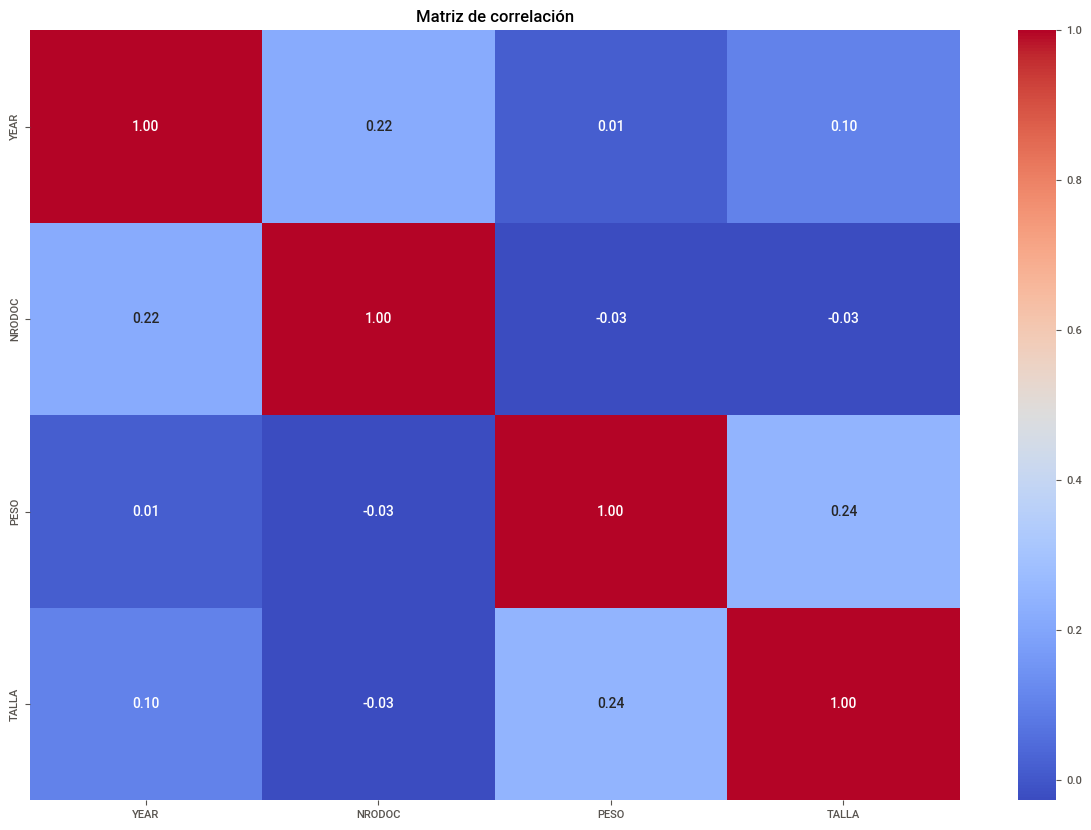

In [64]:
#Correlación entre Variables: Matriz de correlación para variables numéricas.
# Seleccionar solo las columnas numéricas
numeric_cols = df_cronicos60.select_dtypes(include=['float64', 'int64']).columns

# Calcular la matriz de correlación
corr_matrix = df_cronicos60[numeric_cols].corr()

# Visualizar la matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

                                             |          | [  0%]   00:00 -> (? left)


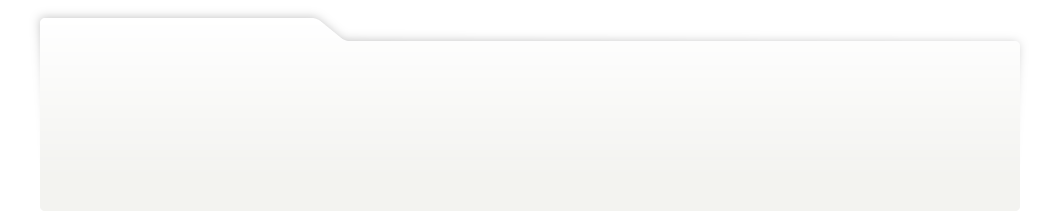
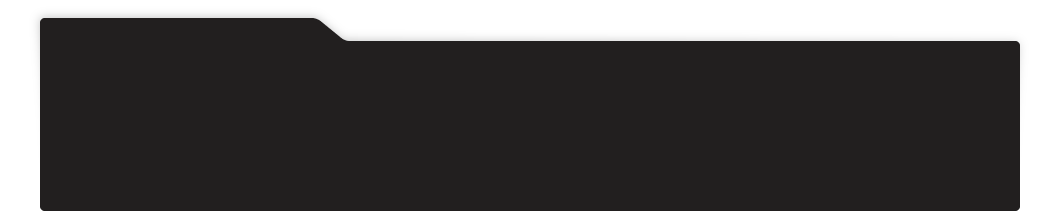
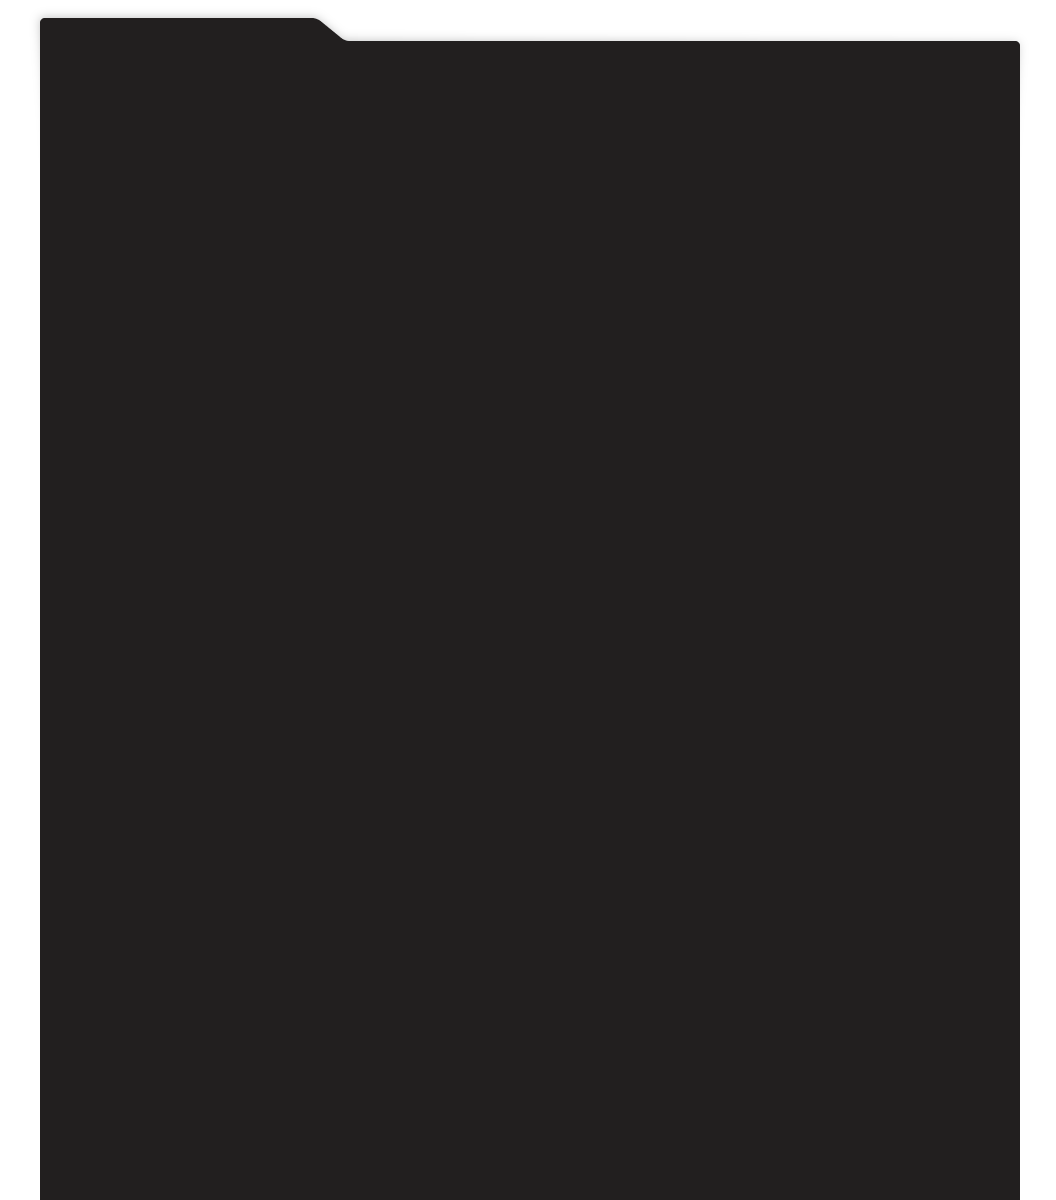
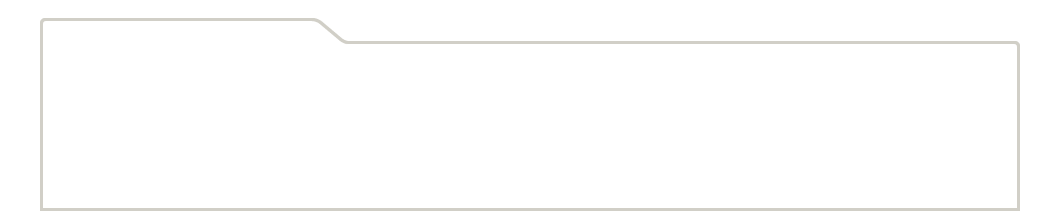
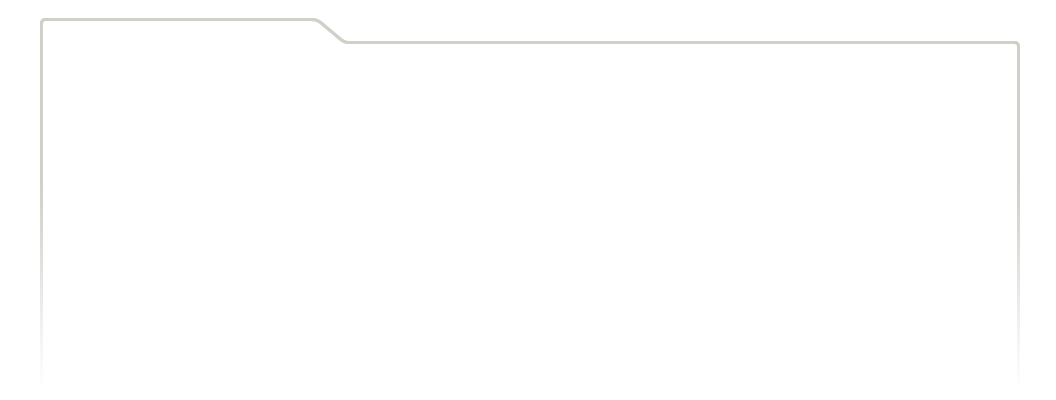
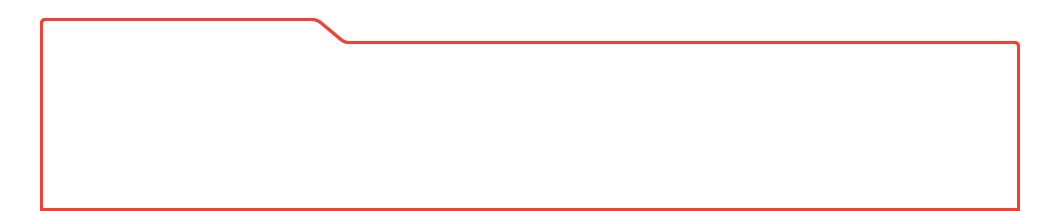
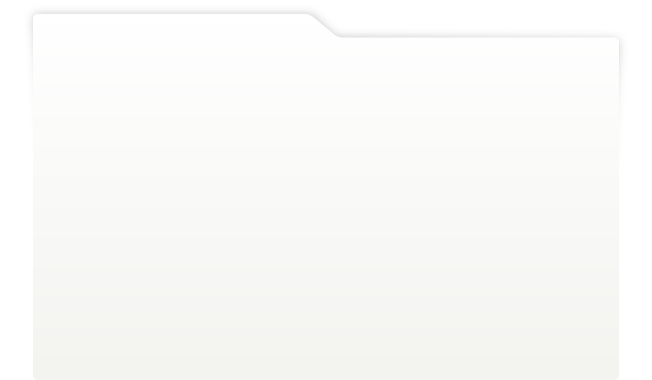
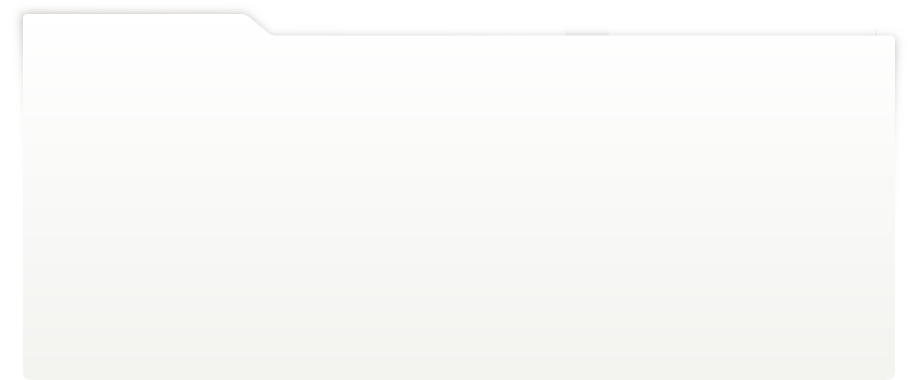
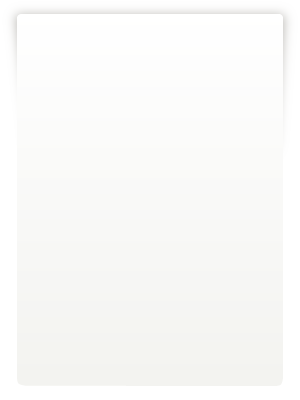
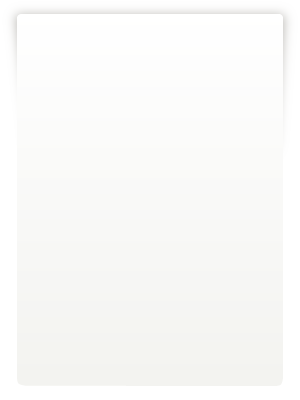
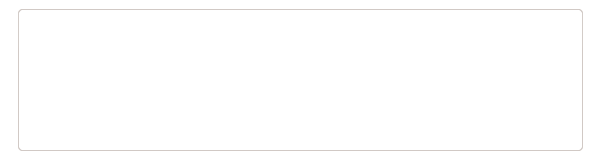
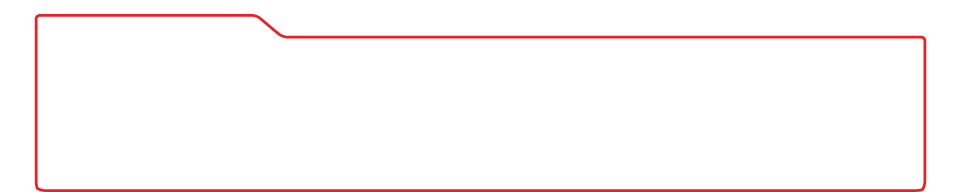
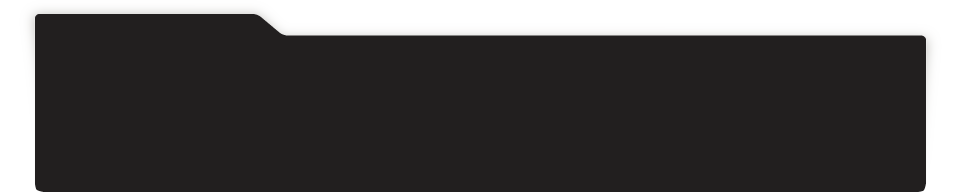
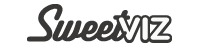
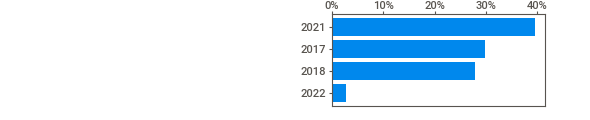
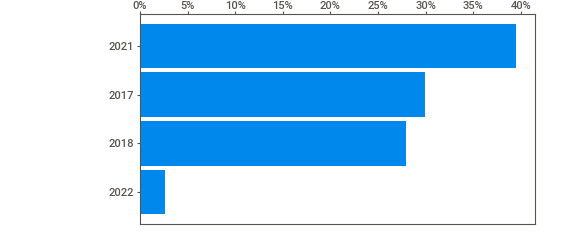
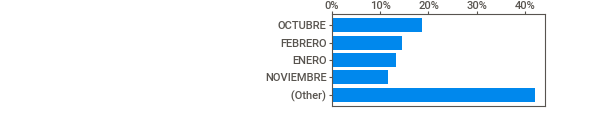
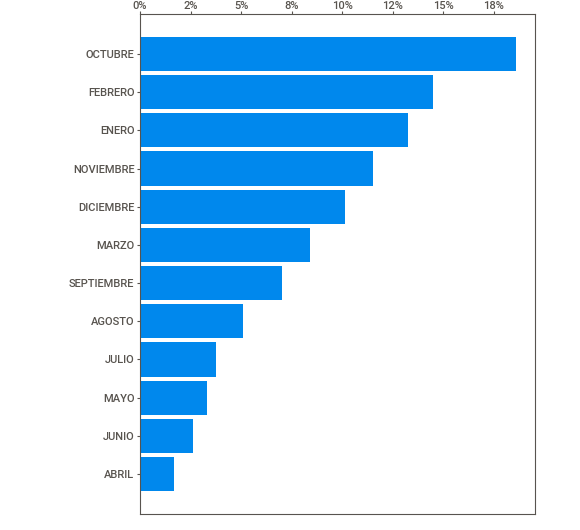
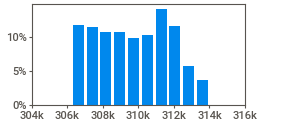
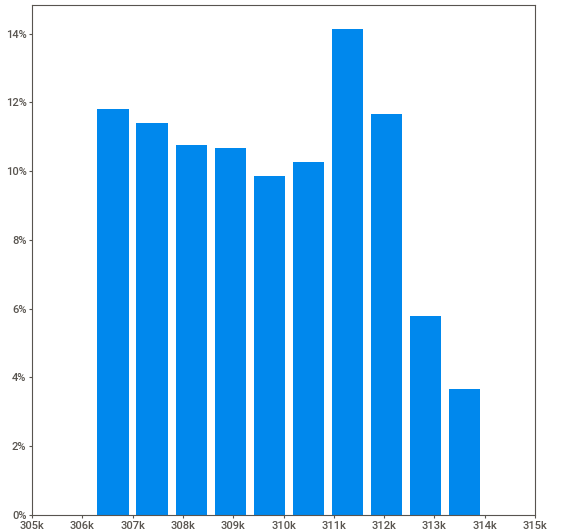
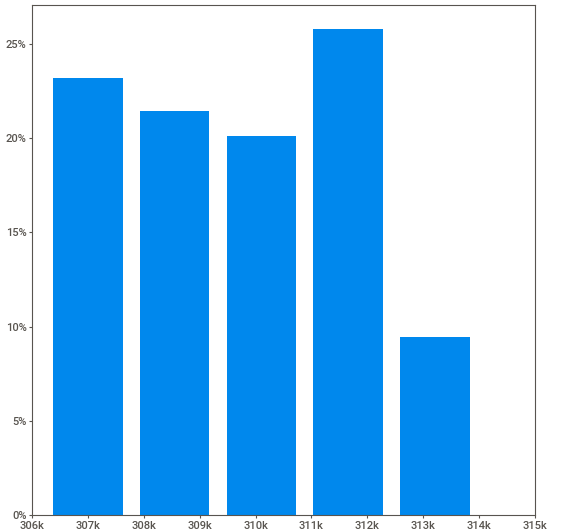
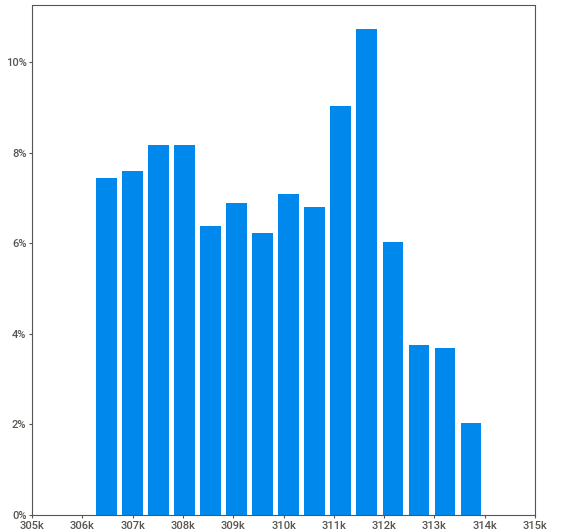
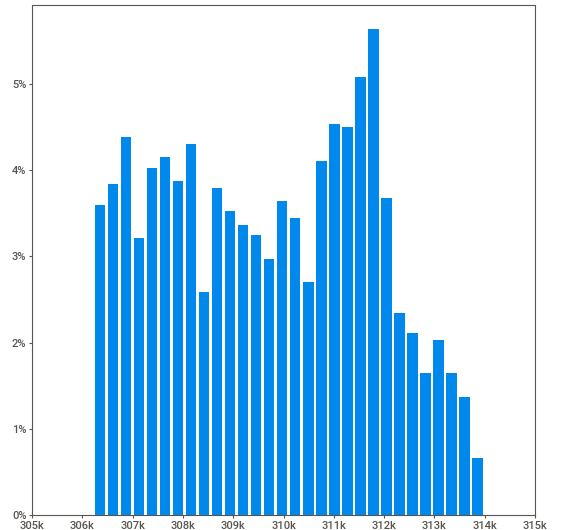
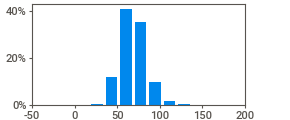
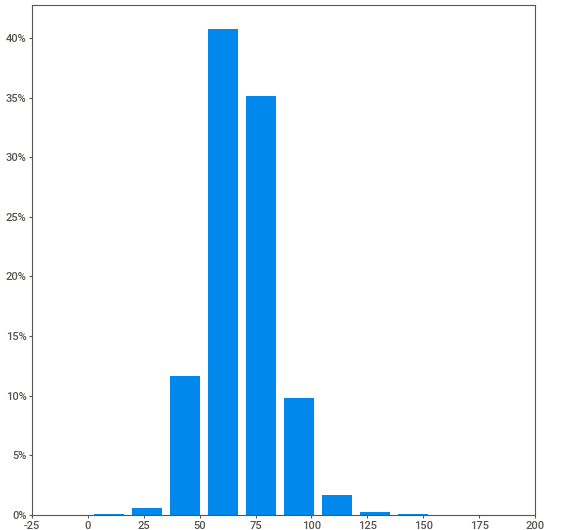
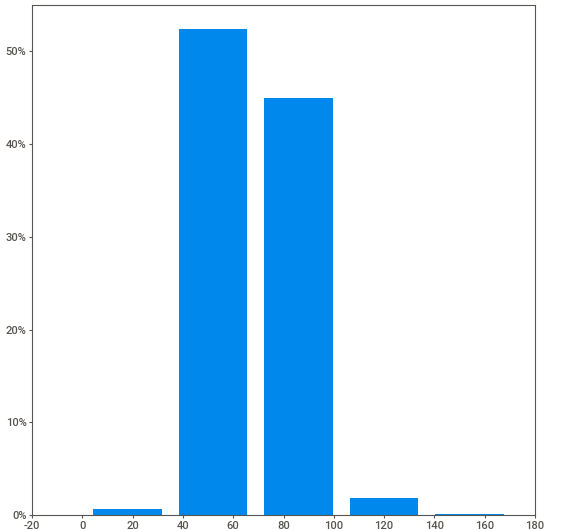
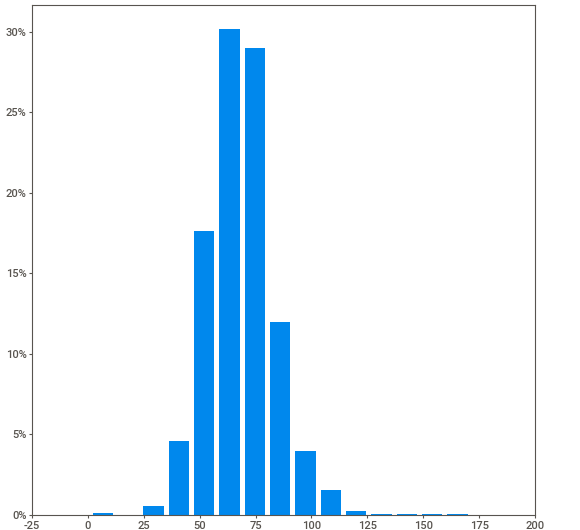
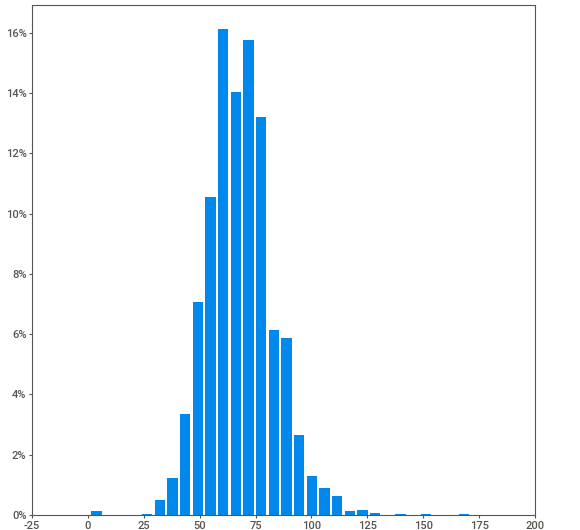
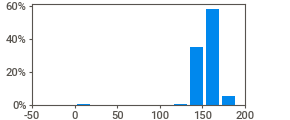
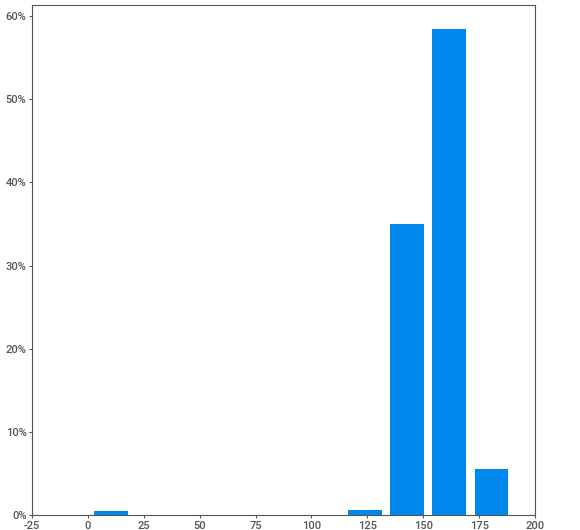
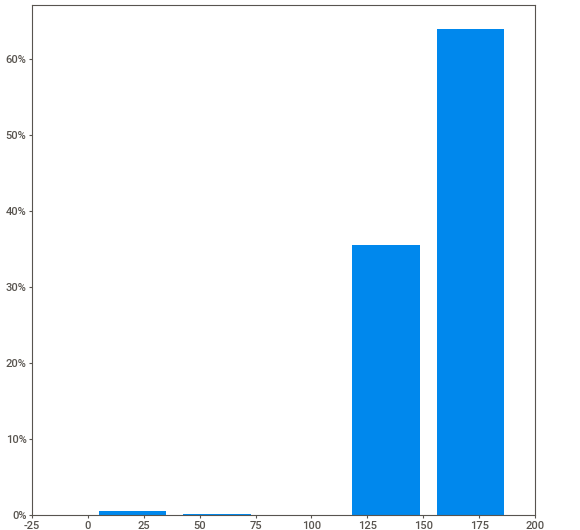
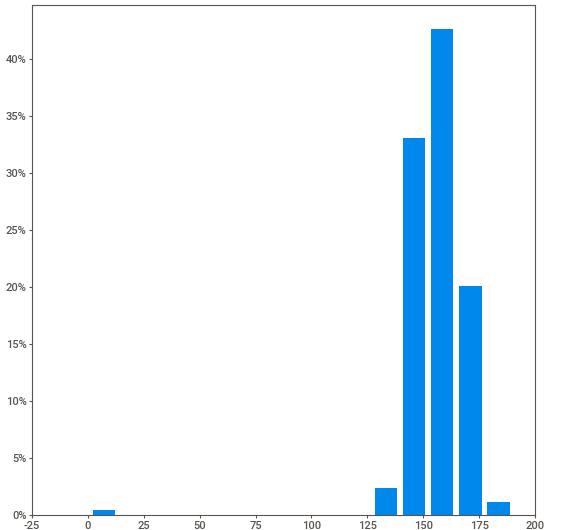
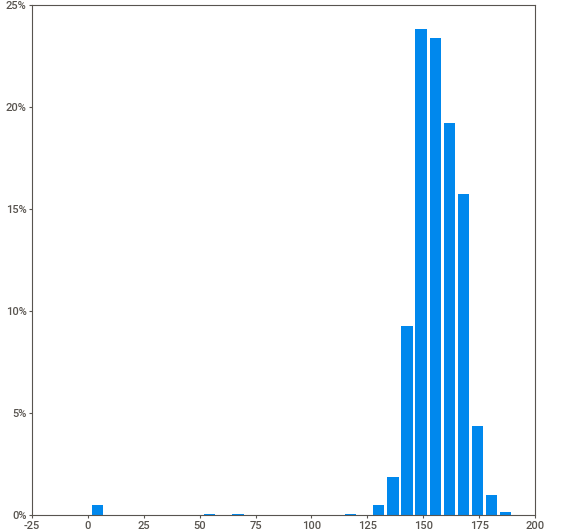
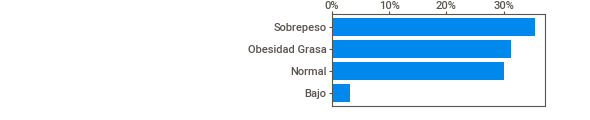
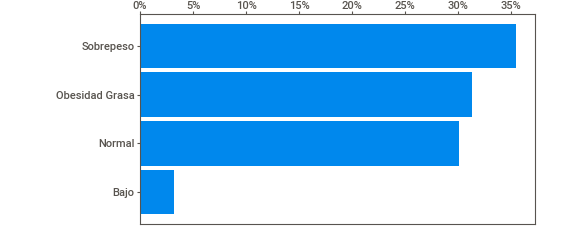
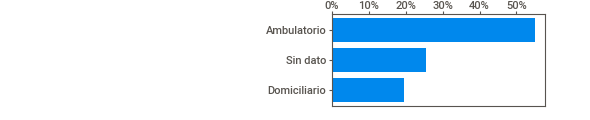
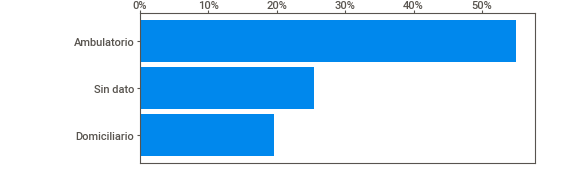
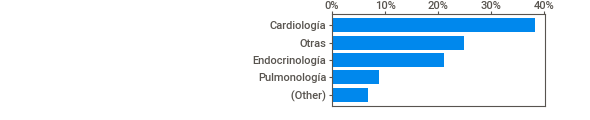
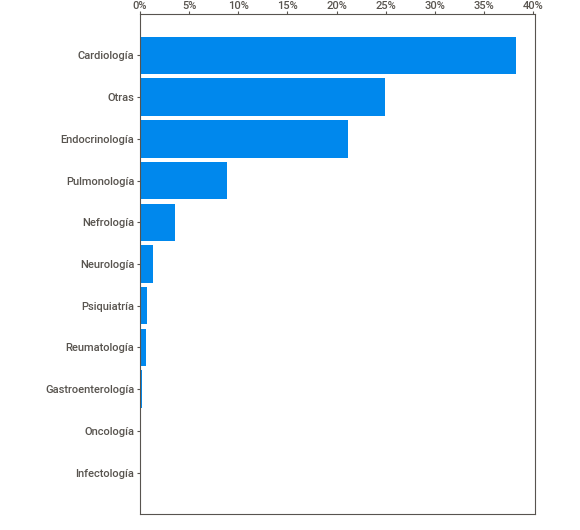
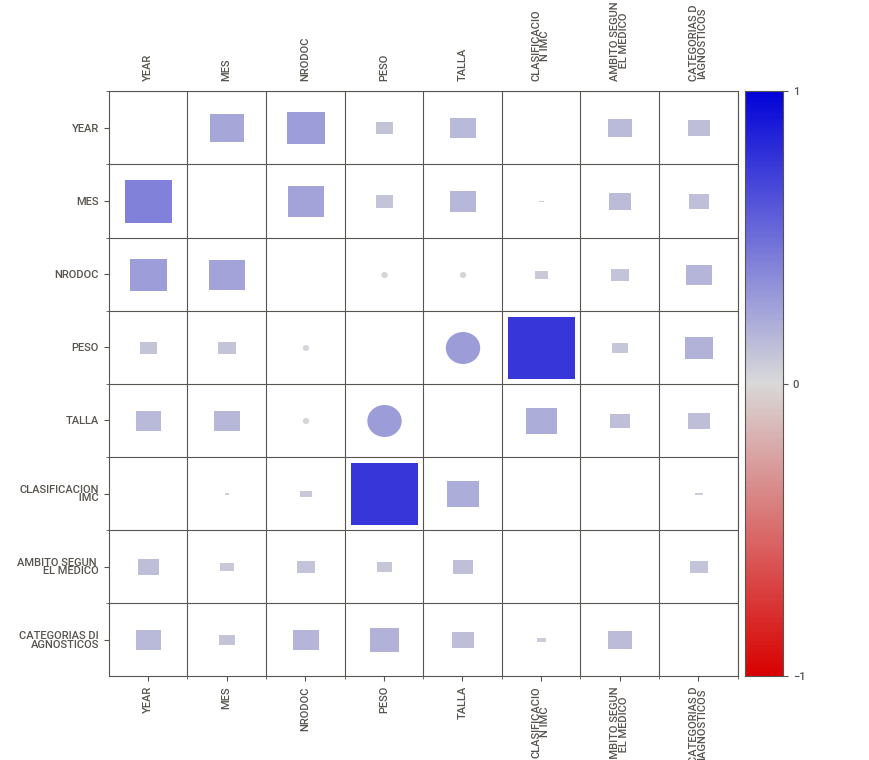
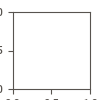

In [65]:
#ahora haremos una exploración rápida de las variables del df_cronicos60
rgd = sv.analyze(df_cronicos60)
rgd.show_notebook()

De la base crónicos podemos decir que el 39% de los datos son del año 2021, se tiene también datos del 2017, 2018 y 2022.
El mes con mayor registros ha sido octubre con el 19%.
El peso máximo de las personas es de 171 Kg  y el promedio es de 68 kilos.
En cuanto a la talla, el promedio es de 156 cm.
La clasificación por índice de masa corporal (IMC) es 36% sobrepeso, 31% obesidad grasa, 30% normal y 3% bajo.
El diagnóstico principal es HIPERTENSIÓN ESENCIAL (PRIMARIA) representada por el 36% de los datos, luego hay un 16% sin información y sigue ENFERMEDAD PULMONAR OBSTRUCTIVA CRÓNICA NO ESPECIFICADA con 8%.
El ámbito de atención ha sido ambulatorio en un  55%, domiciliario en un 19% y sin datos un 25%.

#Combinamos bases de datos

In [66]:
# Combinamos df_egresos60 con db_usuarios60 en base a NRODOC
df_merge = pd.merge(df_usuarios60, df_egresos60, on='NRODOC', how='inner')

# Combina df_merge con db_cronicos60 en base a NRODOC
df_final = pd.merge(df_merge, df_cronicos60, on='NRODOC', how='inner')

In [67]:
#Verificamos las columnas y las dimensiones de la base
print(df_final.columns)
print(df_final.shape)

Index(['NRODOC', 'SEXO', 'EDAD', 'YEAR_x', 'MES_x', 'ÚLTIMA CLASE FUNCIONAL',
       'QUINQUENIO', 'YEAR_y', 'MES_y', 'VIA INGRESO', 'SERVICIO EGRESO',
       'TIPO EGRESO', 'FECHA INGRESO CLINICA', 'FECHA INGRESO SERVICIO',
       'FECHA SALIDA', 'DEMORA ASIGNACION CAMA',
       'DEMORA SALIDA CLINICA (DIAS)', 'TRANSFUSION SANGRE', 'ANTIBIOTICO',
       'PROFESIONAL ESPECIALIDAD', 'TIEMPO ESTANCIA (DIAS)', 'YEAR', 'MES',
       'PESO', 'TALLA', 'CLASIFICACION IMC', 'DIAGNOSTICO PRINCIPAL',
       'AMBITO SEGUN EL MEDICO', 'CATEGORIAS DIAGNOSTICOS'],
      dtype='object')
(1568, 29)


In [68]:
# Ahora vamos a verificar nuevamente la cantidad de diagnósticos asociados a cada número de documento y la cantidad de diagnósticos únicos,
#ya que si bien un usuario puede tener varios diagnósticos principales, no debería tener el mismo diagnóstico más de una vez.

# Agrupar por NRODOC y realizar las agregaciones necesarias
aggregations2 = {
    'DIAGNOSTICO PRINCIPAL': ['count', 'nunique']
}

diagnosticos_nrodoc = df_final.groupby('NRODOC').agg(aggregations2).reset_index()

# Renombrar las columnas
diagnosticos_nrodoc.columns = ['NRODOC', 'Cantidad_Total_Diagnosticos', 'Cantidad_Diagnosticos_Unicos']

# Mostrar el resultado
print(diagnosticos_nrodoc)

     NRODOC  Cantidad_Total_Diagnosticos  Cantidad_Diagnosticos_Unicos
0    306230                            3                             3
1    306248                            8                             2
2    306258                            1                             1
3    306259                            2                             2
4    306267                            1                             1
..      ...                          ...                           ...
873  313921                            1                             1
874  313948                            1                             1
875  313965                            1                             1
876  313973                            1                             1
877  313987                            1                             1

[878 rows x 3 columns]


In [69]:
#Vamos a eliminar los registros de los usuarios cuyo diagnóstico está repetido, dejando para cada usuario los diagnósticos asignados diferentes entre sí.
# Eliminar registros duplicados basados en NRODOC y DIAGNOSTICO PRINCIPAL
df_final= df_final.drop_duplicates(subset=['NRODOC', 'DIAGNOSTICO PRINCIPAL'])

# Verificar el nuevo conjunto de datos
print(df_final.shape)

(1247, 29)


#Exploración de datos con base final

Realizamos una exploración de los datos con la base final para comparar algunas variables con la variable objetivo (estancia)

In [77]:
#Vemos unr esumen estadístico completo
df_final.describe(include='all')

NRODOC  SEXO         EDAD       YEAR_x       MES_x  \
count     1247.000000  1247  1247.000000  1247.000000        1247   
unique            NaN     2          NaN          NaN          11   
top               NaN     F          NaN          NaN  SEPTIEMBRE   
freq              NaN   735          NaN          NaN         807   
mean    309877.011227   NaN    73.992783  2017.808340         NaN   
min     306230.000000   NaN    60.000000  2017.000000         NaN   
25%     307964.000000   NaN    67.000000  2017.000000         NaN   
50%     310072.000000   NaN    74.000000  2017.000000         NaN   
75%     311642.000000   NaN    80.000000  2018.000000         NaN   
max     313987.000000   NaN    95.000000  2022.000000         NaN   
std       2128.102034   NaN     8.373645     1.495095         NaN   

       ÚLTIMA CLASE FUNCIONAL QUINQUENIO       YEAR_y    MES_y VIA INGRESO  \
count                    1247       1247  1247.000000     1247        1247   
unique                      6          7          NaN       12           3   
top            SIN CLASIFICAR     75-79           NaN  FEBRERO   Urgencias   
freq                      957        271          NaN      191        1149   
mean                      NaN        NaN  2020.124298      NaN         NaN   
min                       NaN        NaN  2017.000000      NaN         NaN   
25%                       NaN        NaN  2018.000000      NaN         NaN   
50%                       NaN        NaN  2021.000000      NaN         NaN   
75%                       NaN        NaN  2021.000000      NaN         NaN   
max                       NaN        NaN  2021.000000      NaN         NaN   
std                       NaN        NaN     1.406170      NaN         NaN   

        ... PROFESIONAL ESPECIALIDAD TIEMPO ESTANCIA (DIAS)         YEAR  \
count   ...                     1247            1247.000000  1247.000000   
unique  ...                       29                    NaN          NaN   
top     ...         Medicina Interna                    NaN          NaN   
freq    ...                      831                    NaN          NaN   
mean    ...                      NaN               4.162791  2019.196472   
min     ...                      NaN               0.000000  2017.000000   
25%     ...                      NaN               1.000000  2017.000000   
50%     ...                      NaN               3.000000  2018.000000   
75%     ...                      NaN               5.000000  2021.000000   
max     ...                      NaN              59.000000  2022.000000   
std     ...                      NaN               5.169204     1.835722   

            MES         PESO        TALLA  CLASIFICACION IMC  \
count      1247  1247.000000  1247.000000               1247   
unique       12          NaN          NaN                  4   
top     OCTUBRE          NaN          NaN          Sobrepeso   
freq        222          NaN          NaN                438   
mean        NaN    68.256997   156.133897                NaN   
min         NaN     1.000000     1.000000                NaN   
25%         NaN    58.000000   150.000000                NaN   
50%         NaN    68.000000   157.000000                NaN   
75%         NaN    77.000000   164.000000                NaN   
max         NaN   121.000000   190.000000                NaN   
std         NaN    14.657774    14.398180                NaN   

                          DIAGNOSTICO PRINCIPAL AMBITO SEGUN EL MEDICO  \
count                                      1247                   1247   
unique                                      102                      3   
top     I10X - HIPERTENSION ESENCIAL (PRIMARIA)            Ambulatorio   
freq                                        448                    684   
mean                                        NaN                    NaN   
min                                         NaN                    NaN   
25%                                         NaN  

## Distribución general de las variables

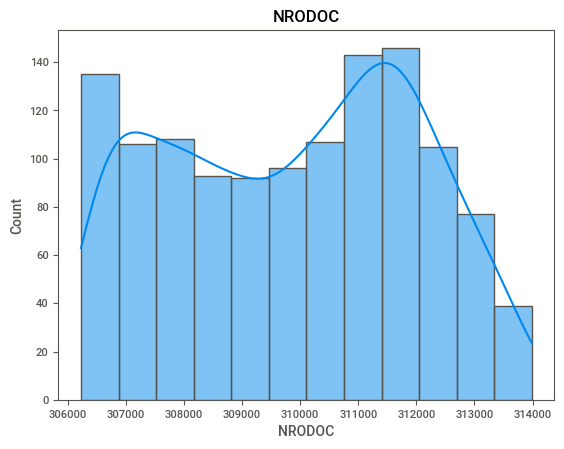

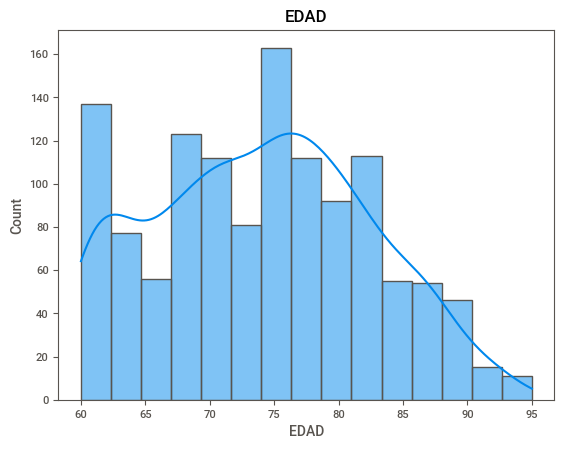

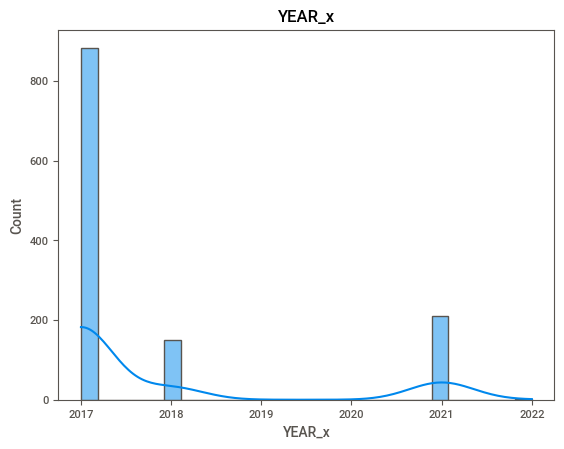

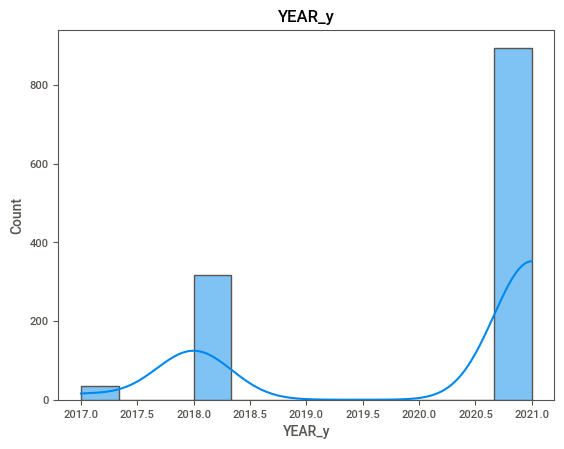

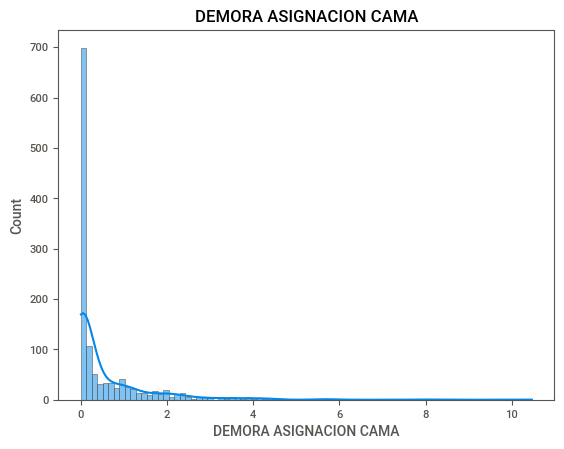

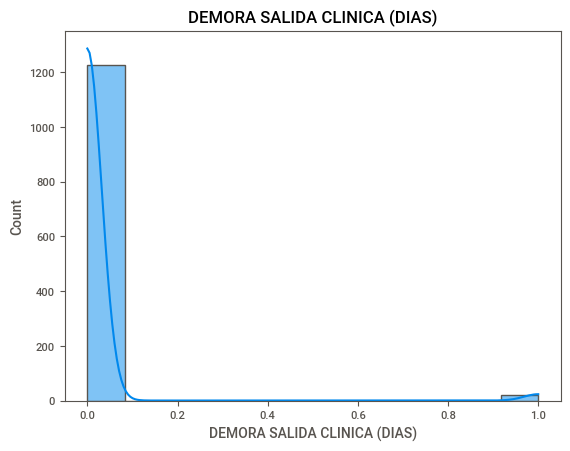

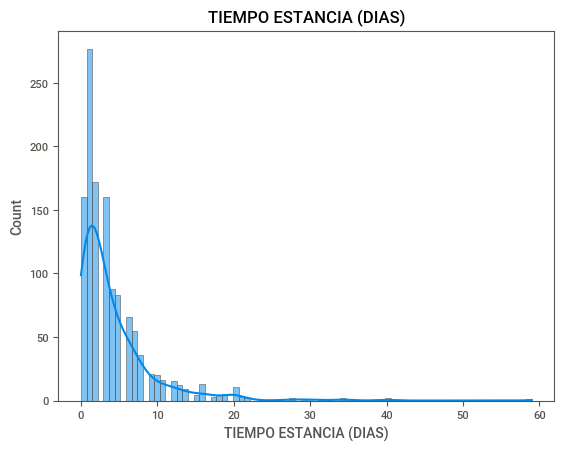

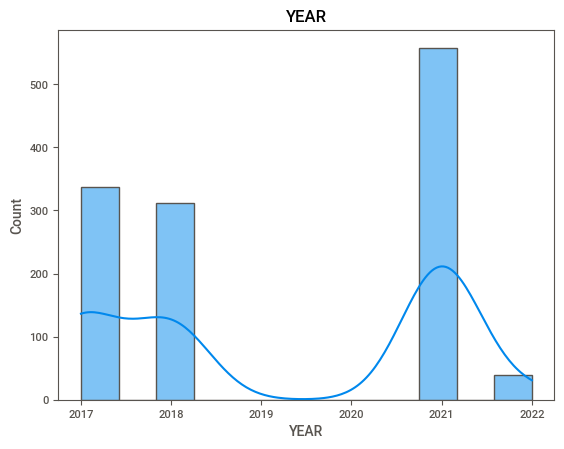

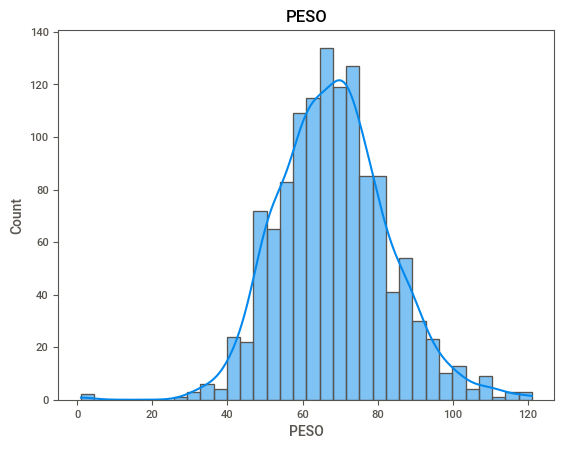

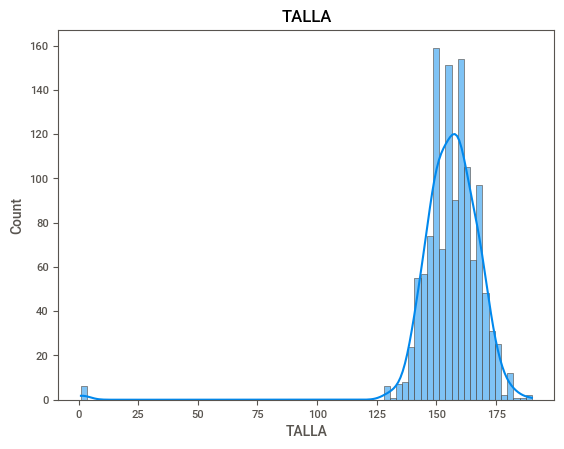

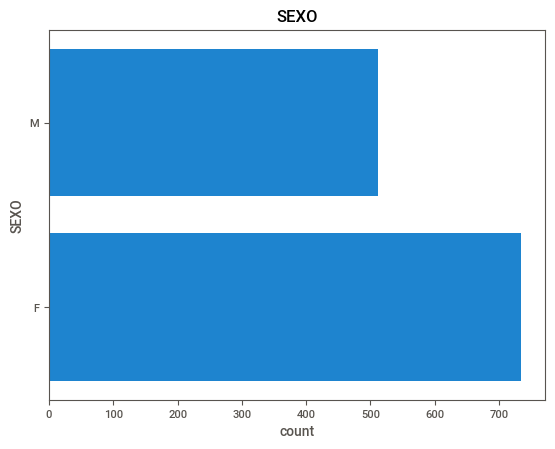

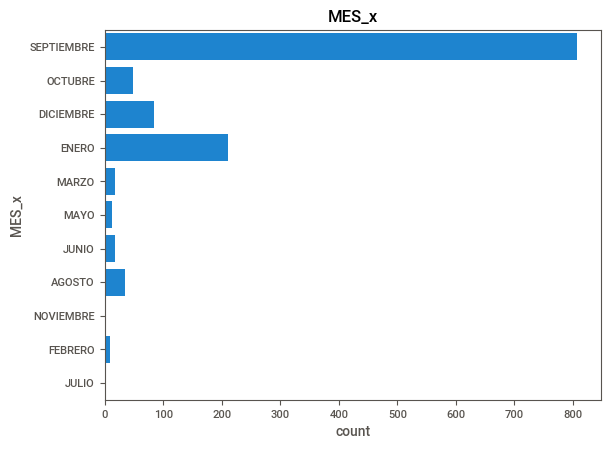

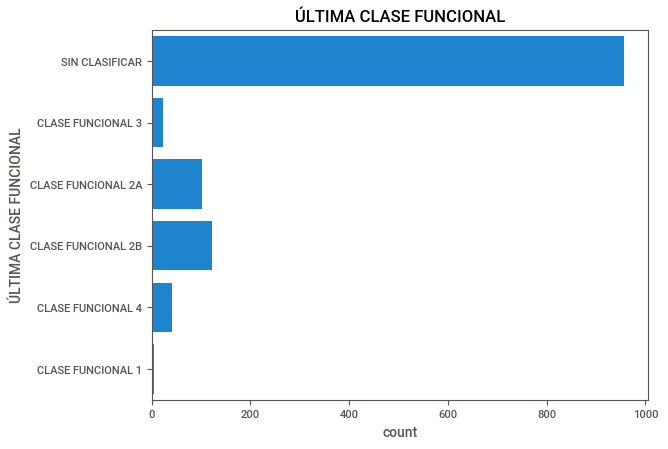

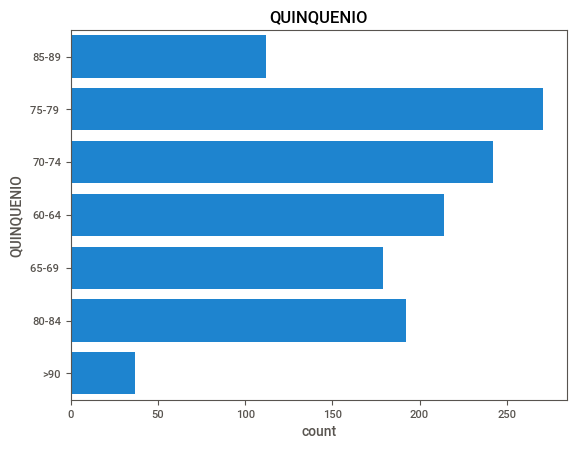

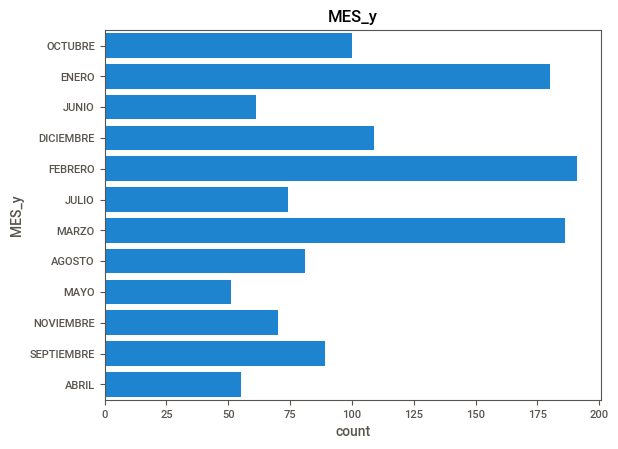

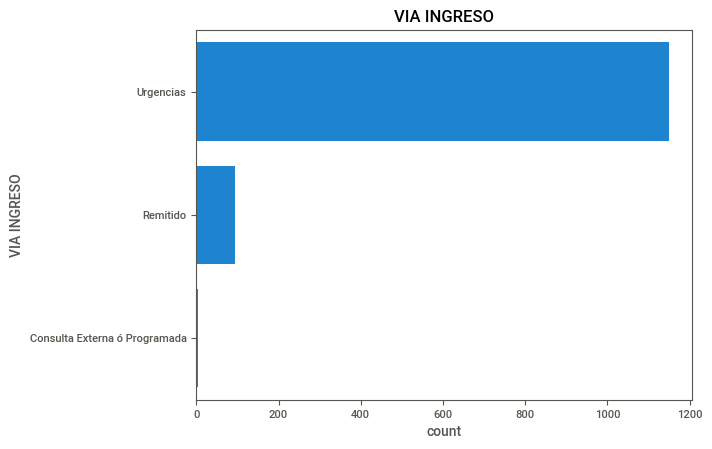

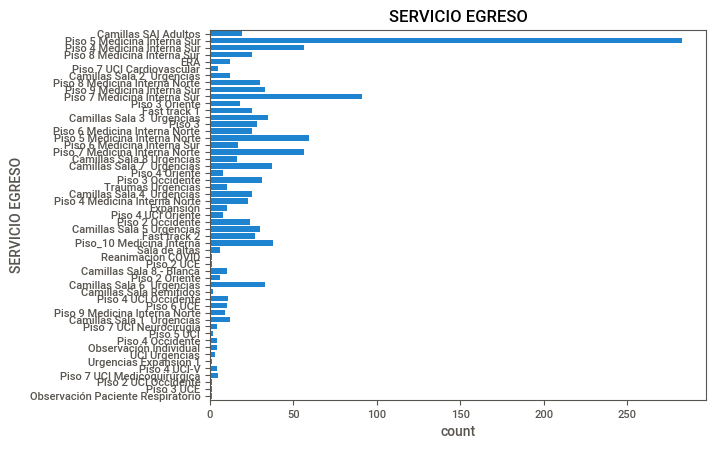

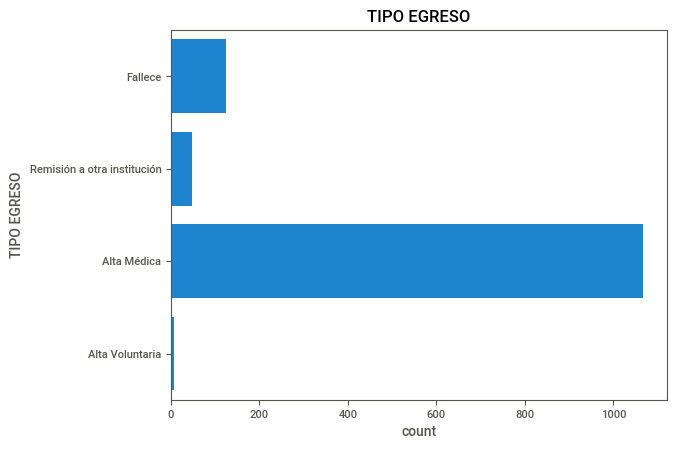

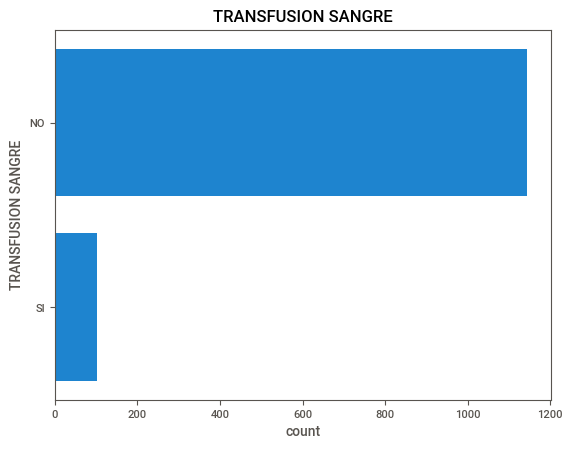

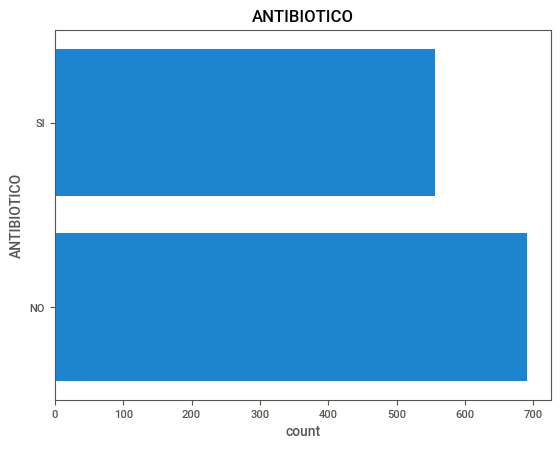

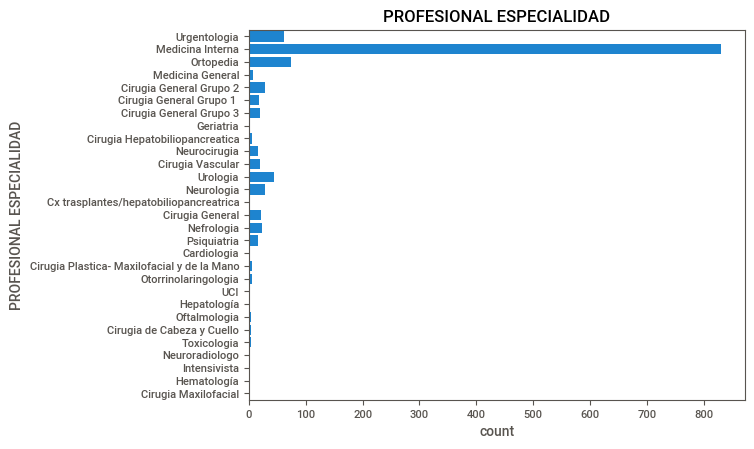

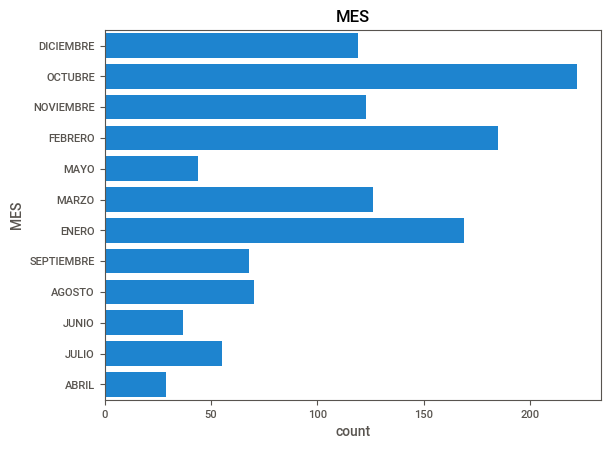

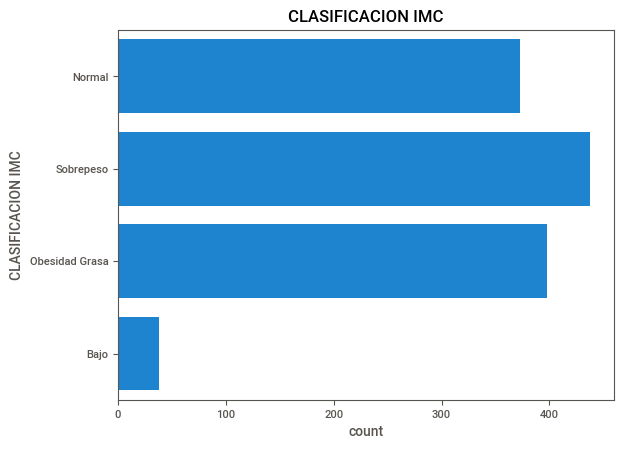

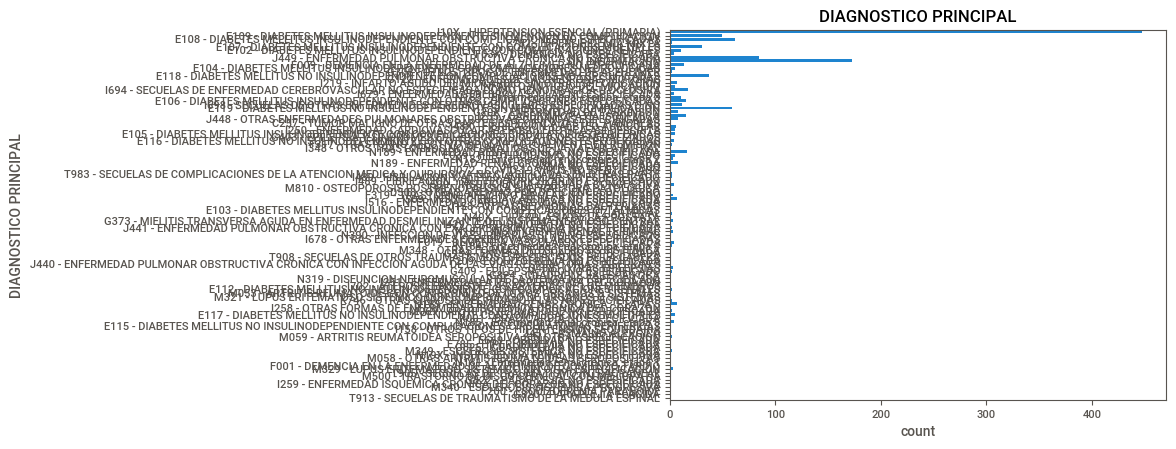

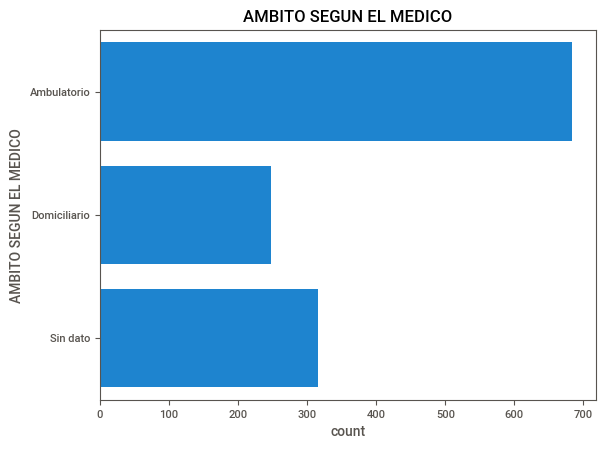

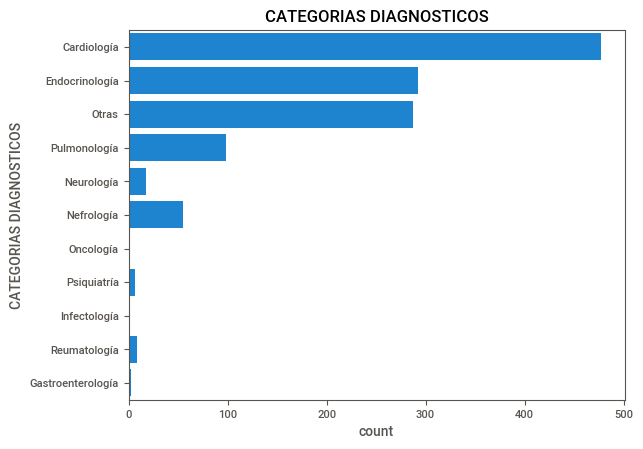

In [78]:
# Distribución de Variables : Visualizamos la distribución de las variables numéricas y categóricas ahora concentradas en una sola base.
# Histogramas para variables numéricas
num_cols = df_final.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    sns.histplot(df_final[col], kde=True)
    plt.title(col)
    plt.show()

# Gráficos de barras para variables categóricas
cat_cols = df_final.select_dtypes(include=['object']).columns
for col in cat_cols:
    sns.countplot(data=df_final, y=col)
    plt.title(col)
    plt.show()

##Análisis de las categorías con respecto a la variable objetivo

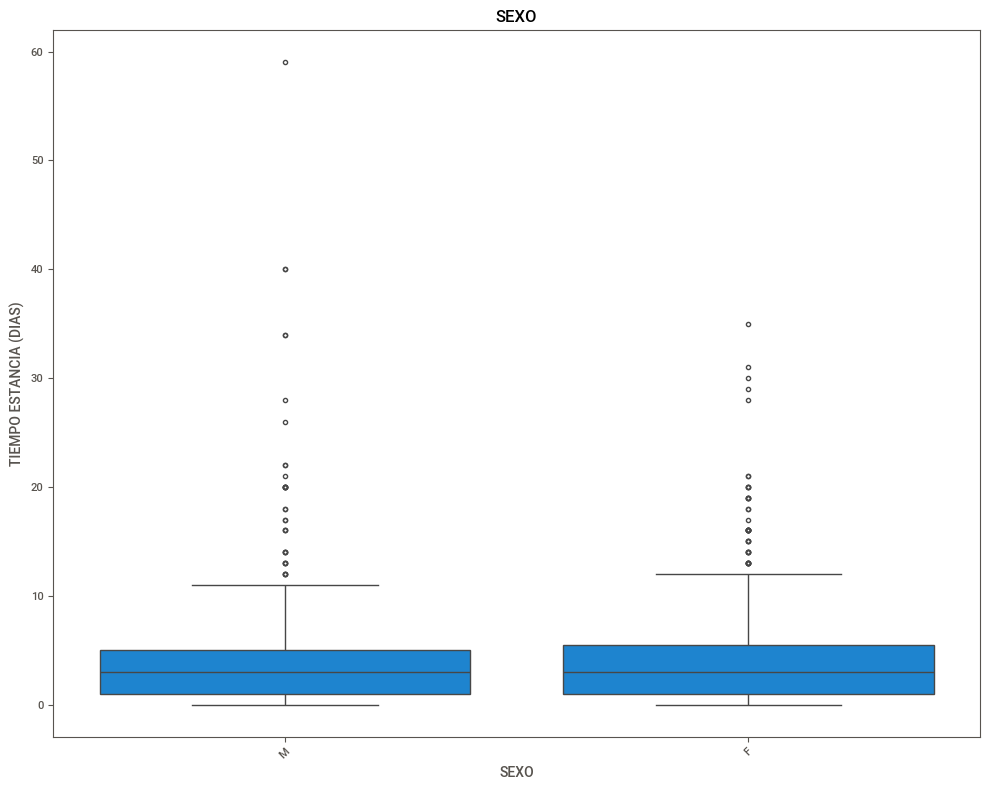

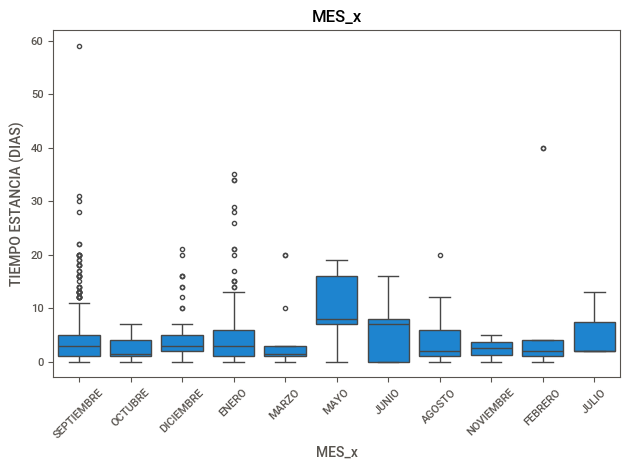

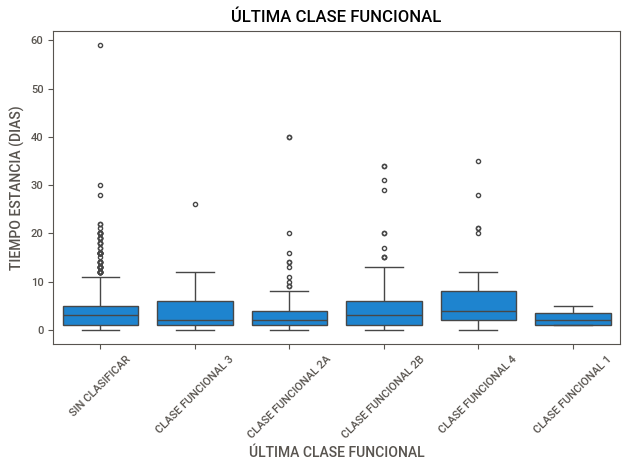

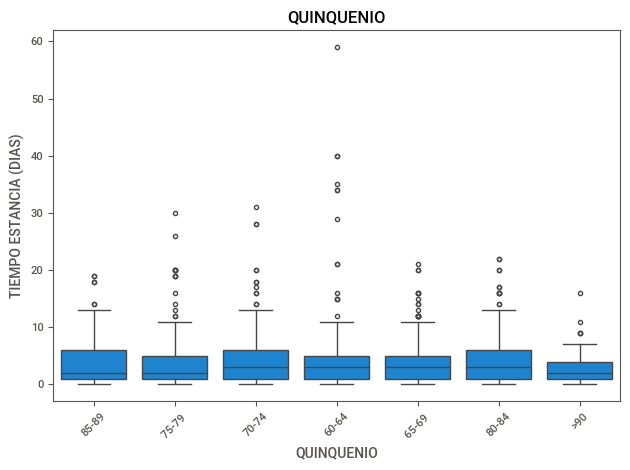

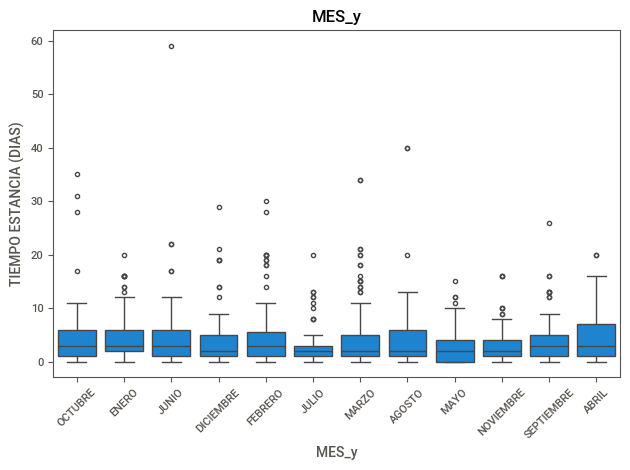

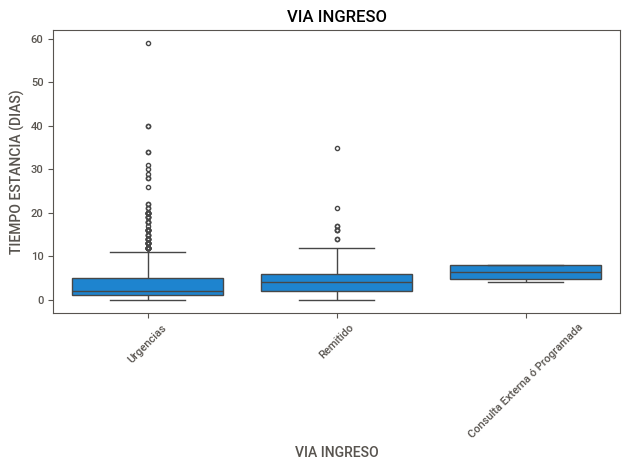

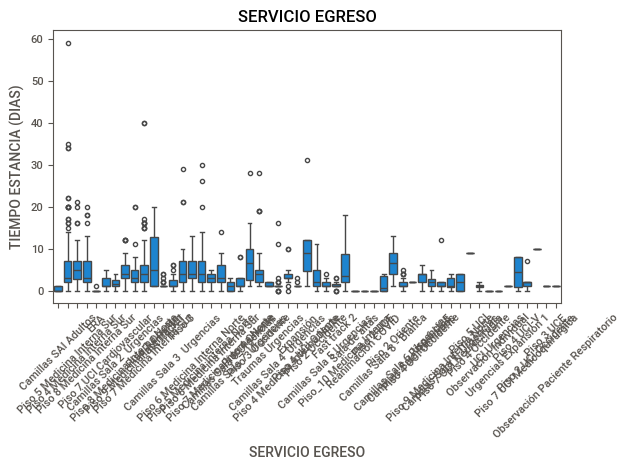

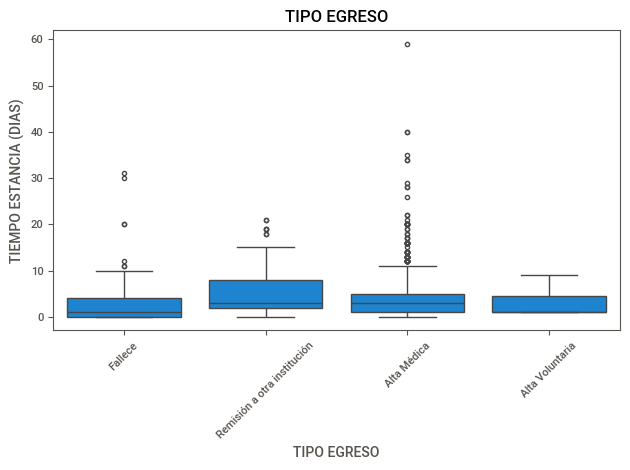

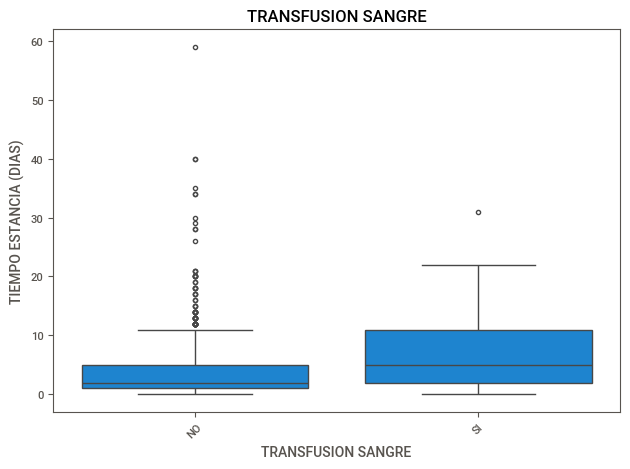

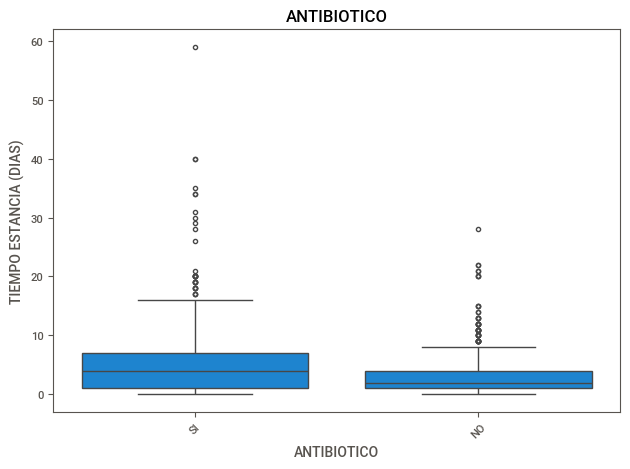

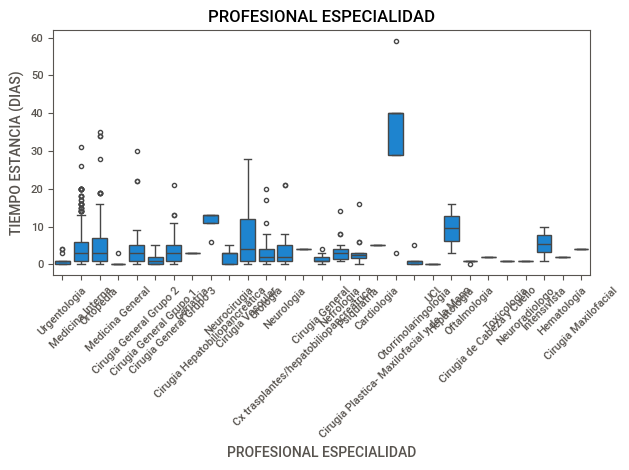

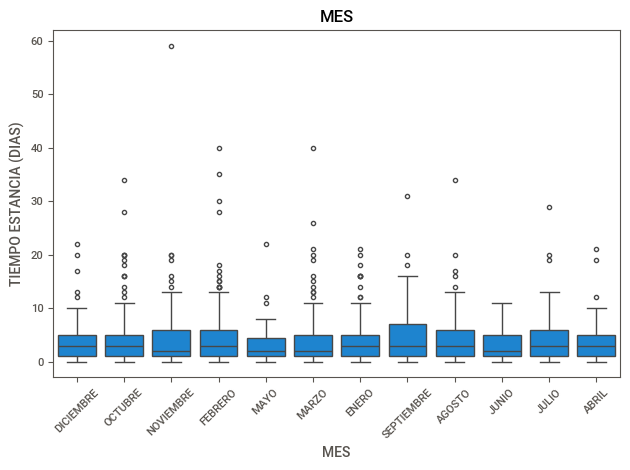

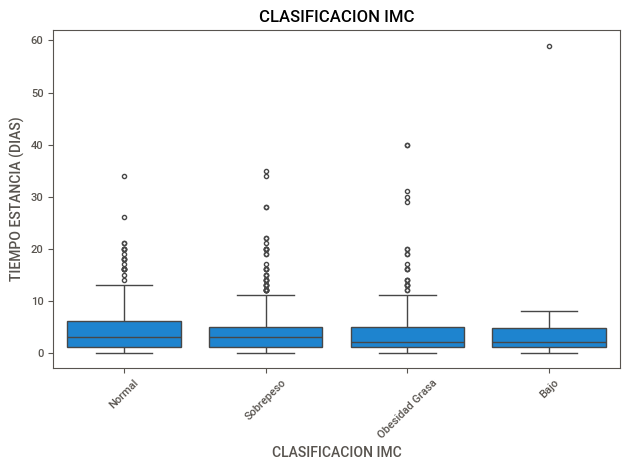

<ipython-input-79-ebdaad3bd155>:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Ajustar el diseño para evitar superposiciones


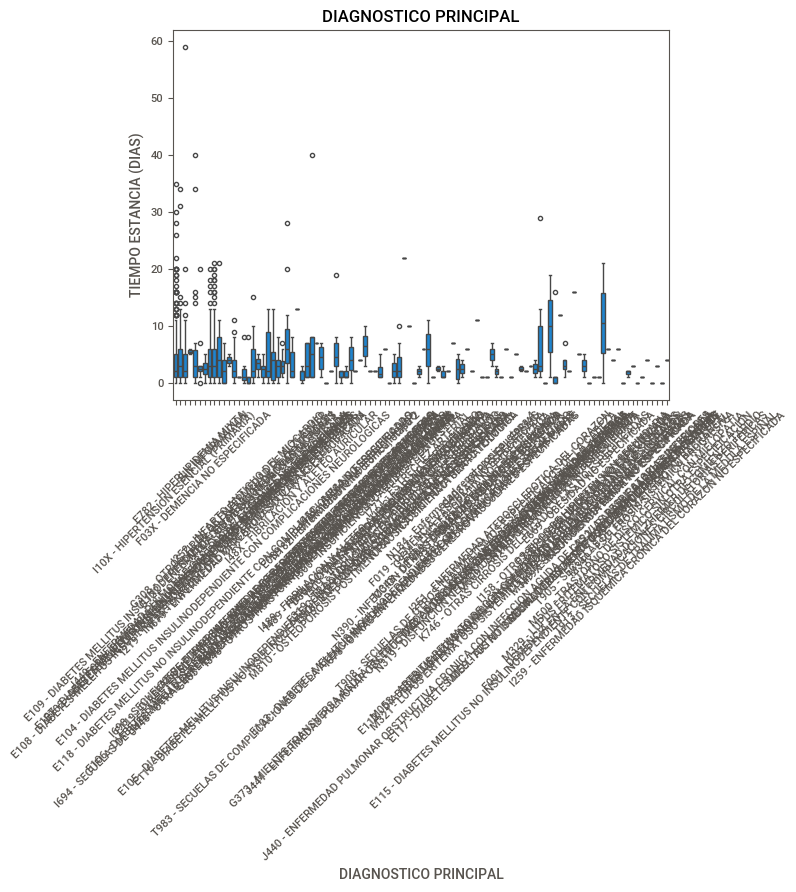

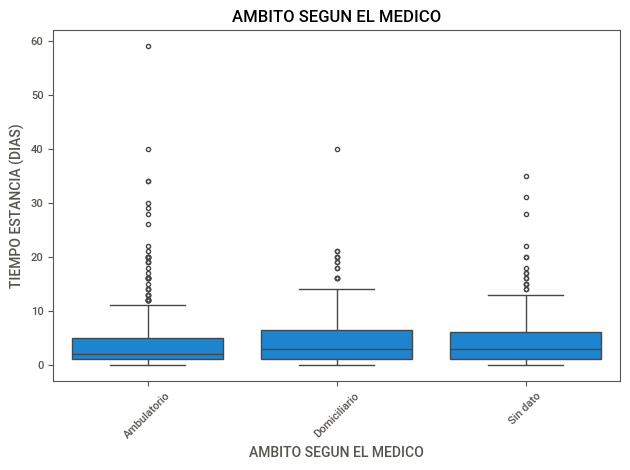

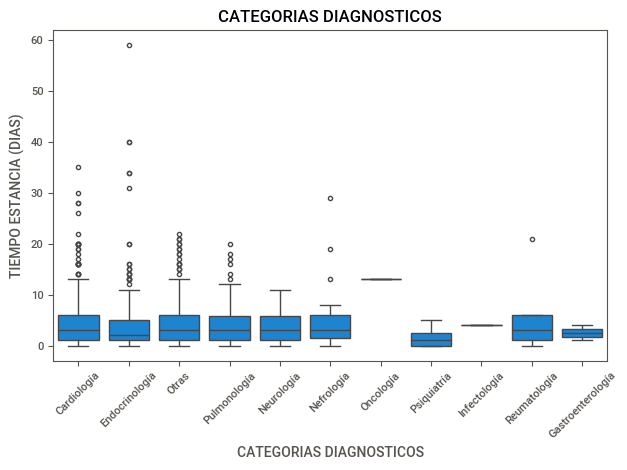

In [79]:
#Análisis de Categorías: usaremos gráficos de caja (boxplots) para comparar la distribución de 'TIEMPO ESTANCIA (DIAS)' entre diferentes categorías de las variables.
plt.figure(figsize=(10, 8))

for col in cat_cols:
    sns.boxplot(x=col, y='TIEMPO ESTANCIA (DIAS)', data=df_final)
    plt.title(col)
    plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejorar la legibilidad
    plt.tight_layout()  # Ajustar el diseño para evitar superposiciones
    plt.show()

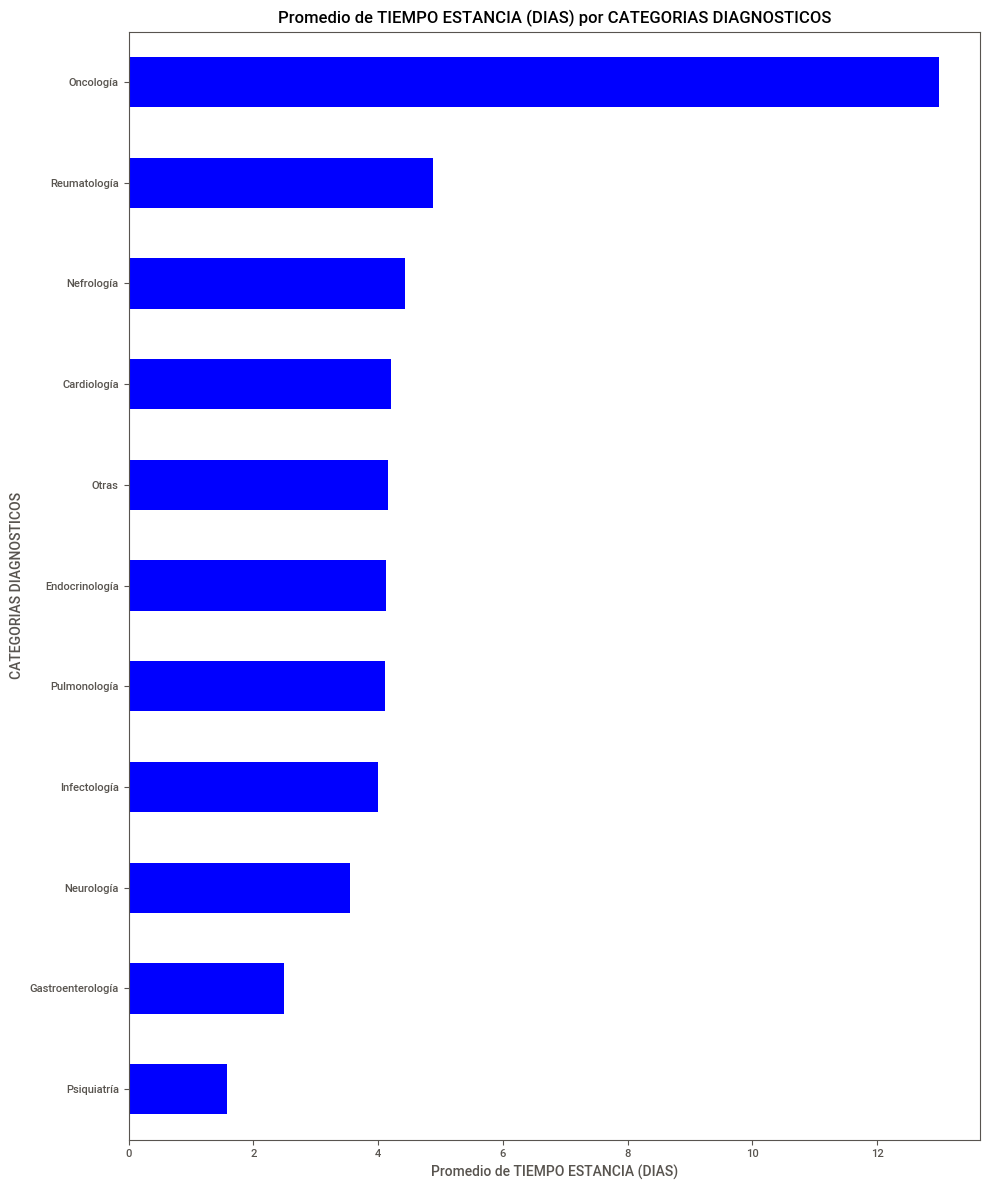

CATEGORIAS DIAGNOSTICOS
Psiquiatría           1.571429
Gastroenterología     2.500000
Neurología            3.555556
Infectología          4.000000
Pulmonología          4.112245
Endocrinología        4.126712
Otras                 4.156794
Cardiología           4.203354
Nefrología            4.436364
Reumatología          4.888889
Oncología            13.000000
Name: TIEMPO ESTANCIA (DIAS), dtype: float64


In [80]:
# Calcular el promedio de 'TIEMPO ESTANCIA (DIAS)' por 'CATEGORIAS DIAGNOSTICOS'
promedio_por_cat = df_final.groupby('CATEGORIAS DIAGNOSTICOS')['TIEMPO ESTANCIA (DIAS)'].mean().sort_values()

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 12))  # Tamaño ampliado del gráfico
promedio_por_cat.plot(kind='barh', color='blue')
plt.title('Promedio de TIEMPO ESTANCIA (DIAS) por CATEGORIAS DIAGNOSTICOS')
plt.xlabel('Promedio de TIEMPO ESTANCIA (DIAS)')
plt.ylabel('CATEGORIAS DIAGNOSTICOS')
plt.tight_layout()
plt.show()

# Mostrar los resultados
print(promedio_por_cat)

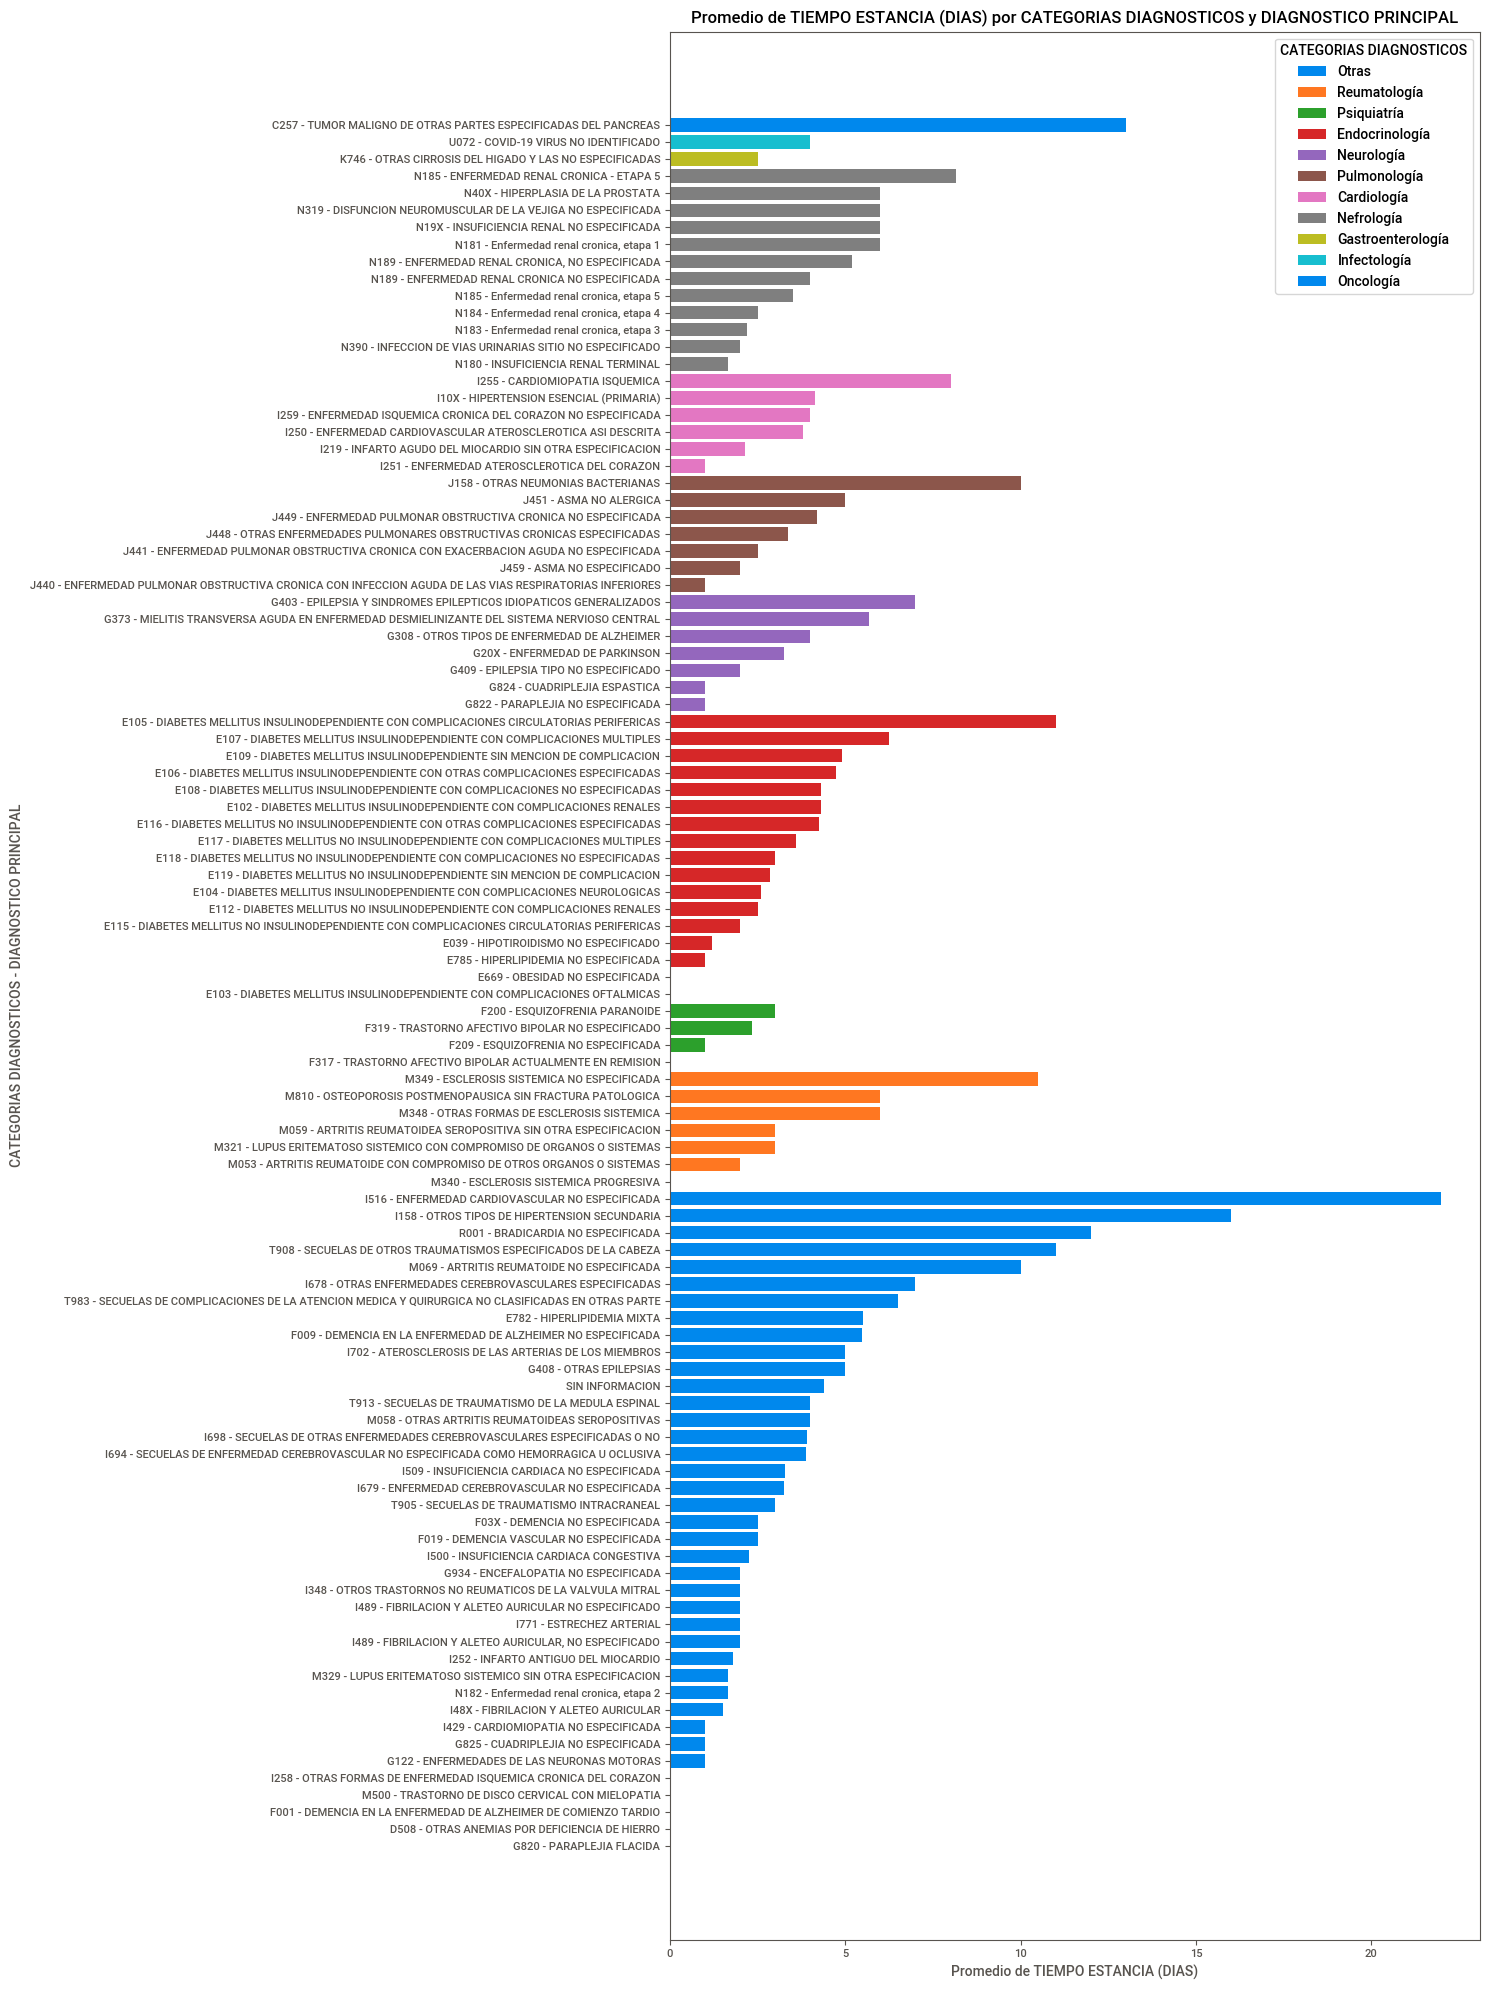

CATEGORIAS DIAGNOSTICOS  DIAGNOSTICO PRINCIPAL                                           
Otras                    G820 - PARAPLEJIA FLACIDA                                            0.0
                         D508 - OTRAS ANEMIAS POR DEFICIENCIA DE HIERRO                       0.0
Reumatología             M340 - ESCLEROSIS SISTEMICA PROGRESIVA                               0.0
Psiquiatría              F317 - TRASTORNO AFECTIVO BIPOLAR ACTUALMENTE EN REMISION            0.0
Otras                    F001 - DEMENCIA EN LA ENFERMEDAD DE ALZHEIMER DE COMIENZO TARDIO     0.0
                                                                                             ... 
                         T908 - SECUELAS DE OTROS TRAUMATISMOS ESPECIFICADOS DE LA CABEZA    11.0
                         R001 - BRADICARDIA NO ESPECIFICADA                                  12.0
Oncología                C257 - TUMOR MALIGNO DE OTRAS PARTES ESPECIFICADAS DEL PANCREAS     13.0
Otras                    I15

In [81]:
# Calcular el promedio de 'TIEMPO ESTANCIA (DIAS)' por 'CATEGORÍAS DIAGNOSTICOS' y 'DIAGNOSTICO PRINCIPAL'
promedio_por_diagnostico = df_final.groupby(['CATEGORIAS DIAGNOSTICOS', 'DIAGNOSTICO PRINCIPAL'])['TIEMPO ESTANCIA (DIAS)'].mean().sort_values()

# Obtener las categorías únicas
categorias_unicas = promedio_por_diagnostico.index.get_level_values(0).unique()

# Crear el gráfico de barras horizontales
plt.figure(figsize=(15, 20))  # Tamaño ampliado del gráfico

for categoria in categorias_unicas:
    # Filtrar los diagnósticos principales para esta categoría
    promedio_categoria = promedio_por_diagnostico.loc[categoria]

    # Plot para cada categoría
    plt.barh(promedio_categoria.index, promedio_categoria.values, label=categoria)

plt.title('Promedio de TIEMPO ESTANCIA (DIAS) por CATEGORIAS DIAGNOSTICOS y DIAGNOSTICO PRINCIPAL')
plt.xlabel('Promedio de TIEMPO ESTANCIA (DIAS)')
plt.ylabel('CATEGORIAS DIAGNOSTICOS - DIAGNOSTICO PRINCIPAL')
plt.legend(title='CATEGORIAS DIAGNOSTICOS')
plt.tight_layout()
plt.show()

# Mostrar los resultados
print(promedio_por_diagnostico)

Analizando las variables categóricas con respecto al tiempo de estancia, tenemos lo siguiente:

- La estancia hospitalaria es más alta en el sexo femenino que en el masculino en general.
- Las personas con edades comprendidas entre los 70 - 74 años y 80-84 años, tienen mayor tiempo de estancia.
- Revisando la vía de ingreso, se tiene que es la vía de consulta externa o programada, la que tiene mayor promedio de tiempo de estancia en comparación con urgencias que es la vía que tiene mayor cantidad de registros, aunque esta misma es la que posee mayor cantidad de datos atípicos que alcanzan hasta los casi 60 días.
- Para el tipo de egreso, es la remisión a otra institución, la que tiene una media de tiempo de estancia más alta y en segundo lugar, la alta médica.
- Los pacientes que han necesitado transfusión de sangre, son los que representan un promedio más alto de tiempo de estancia en comparación con los que no.
- Los pacientes que han requerido antibiótico tienen mayor tiempo de estancia.
- La media entre pacientes con clasificación IMC normal y sobrepeso son muy similares, sin embargo, los pacientes con Clasificación IMC normal, abarcan un rango más amplio de tiempo de estancia.
- El ámbito según el médico de tipo ambulatorio, es el que presenta la media más alta de tiempo de estancia.
- Finalmente, la categoría de diagnósticos con promedio más alto de estancia es Oncología con 13 días de tiempo de estancia promedio. El diagnóstico principal que más cantidad de tiempo de estancia tiene es la ENFERMEDAD CARDIOVASCULAR NO ESPECIFICADA  con un promedio de 22 días, en segundo lugar está OTROS TIPOS DE HIPERTENSION SECUNDARIA con 16 días y en tercer lugar TUMOR MALIGNO DE OTRAS PARTES ESPECIFICADAS DEL PANCREAS  con 13 días de tiempo de estancia.

##Variable objetivo en el tiempo

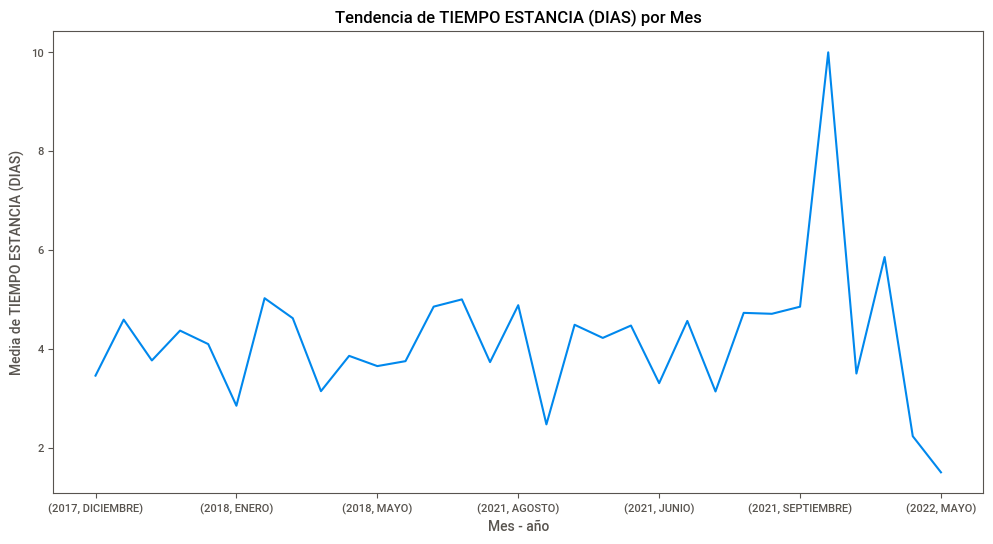

In [82]:
#Analizamos cómo varía 'TIEMPO ESTANCIA (DIAS)' a lo largo del tiempo (por año, mes, etc.)
plt.figure(figsize=(12, 6))

# Agrupar por mes y calculamos la media de 'TIEMPO ESTANCIA (DIAS)'
df_media_tiempo = df_final.groupby(['YEAR', 'MES'])['TIEMPO ESTANCIA (DIAS)'].mean()

# Graficar la media de 'TIEMPO ESTANCIA (DIAS)' por mes
df_media_tiempo.plot(kind='line')

# Configurar título y etiquetas
plt.title('Tendencia de TIEMPO ESTANCIA (DIAS) por Mes')
plt.xlabel('Mes - año')
plt.ylabel('Media de TIEMPO ESTANCIA (DIAS)')

# Mostrar el gráfico
plt.show()

Se observa cómo se ha mantenido en el tiempo, sin embargo, se evidencia un pico alto después de septiembre de 2021, alcanzando un promedio de 10 días de estancia.

## Análisis de las variables numéricas con respecto a la variable objetivo

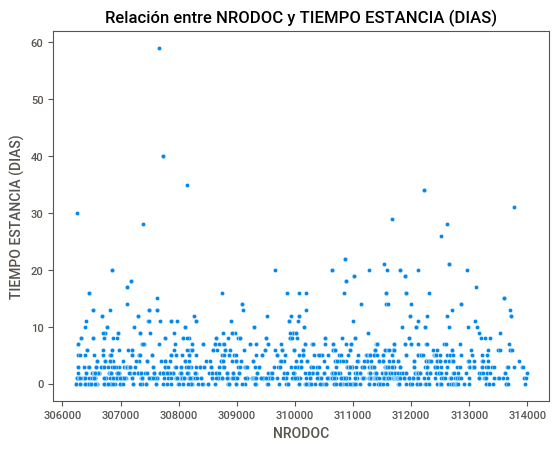

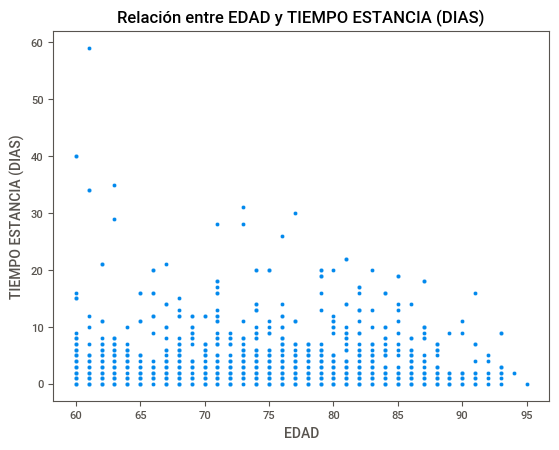

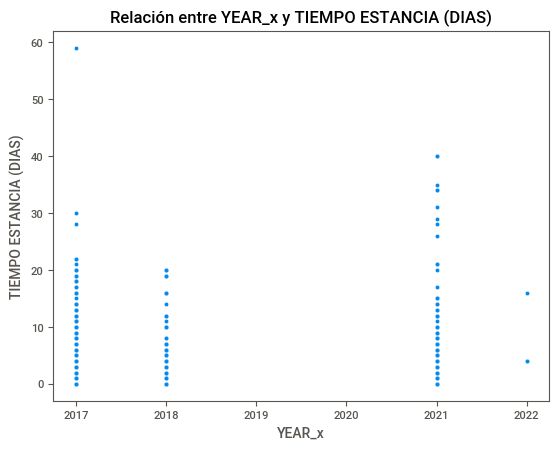

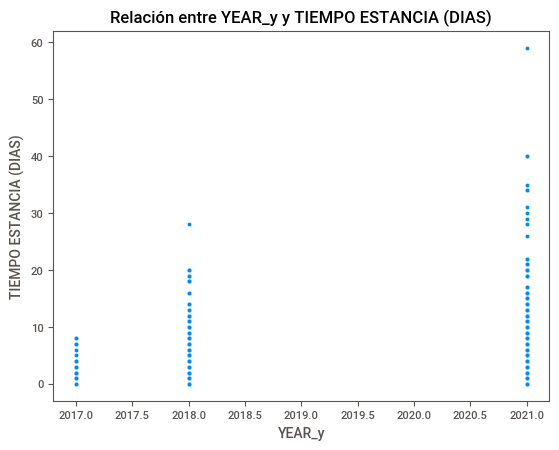

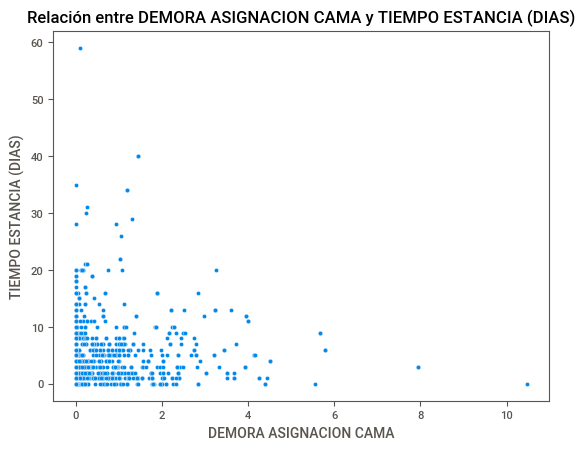

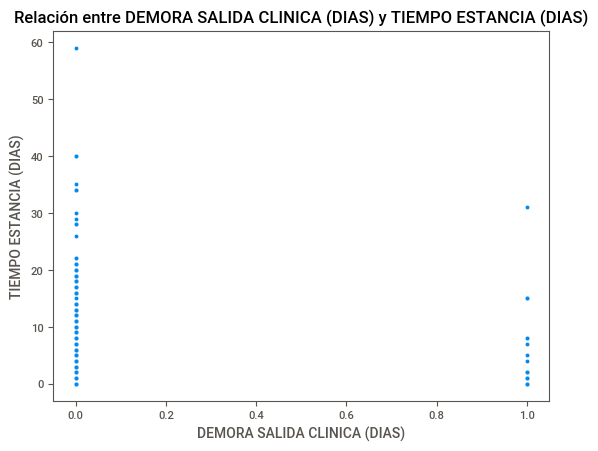

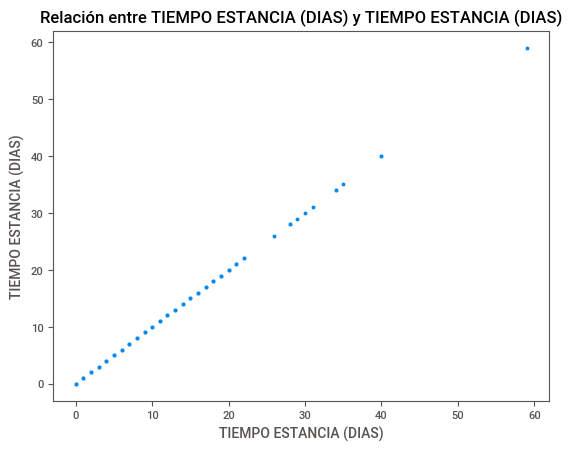

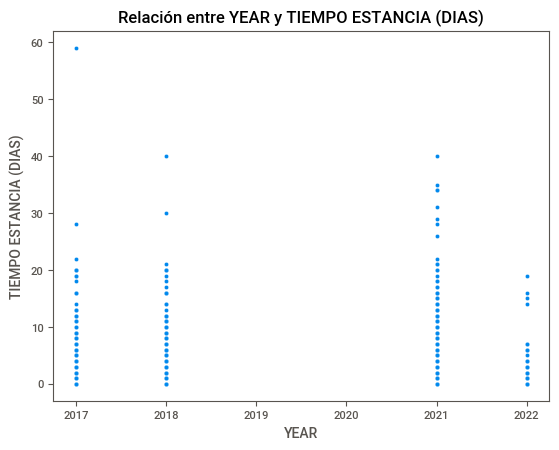

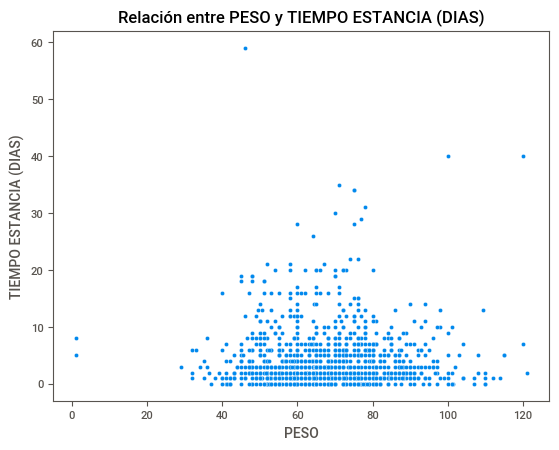

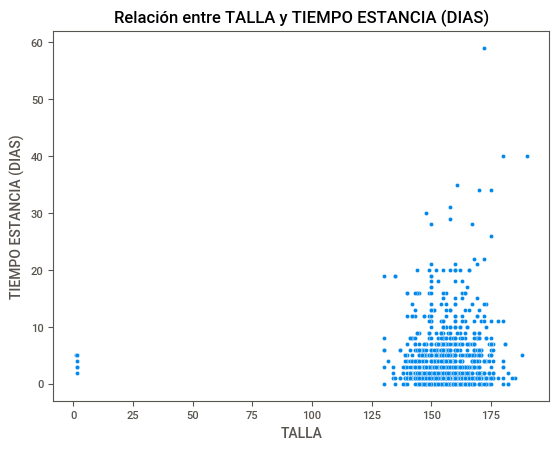

In [83]:
# Gráfico de dispersión entre 'TIEMPO ESTANCIA (DIAS)' y otras variables numéricas
for col in num_cols:
    sns.scatterplot(x=col, y='TIEMPO ESTANCIA (DIAS)', data=df_final)
    plt.title(f'Relación entre {col} y TIEMPO ESTANCIA (DIAS)')
    plt.show()

- En cuanto a la edad, se ve un ligero sesgo a la izquierda, mostrando que las edades más cercanas a 60 años, son las que muestran mayor tiempo de estancia.
- Como se mostró anteriormente, en 2021, fue el año que mayor promedio de estancia hospitalaria se presentó.
- Para el tiempo de demora en asignación de cama, se tiene que cuanto más rápido se asigna una cama al paciente, mayor tiempo de estancia tendrá, esto asociado quizá a la gravedad del evento, se muestra un sesgo marcado hacia la izquierda.
- Para la demora de salida de la clínica, también se tiene mayor estancia para los menores tiempos.
- En cuanto al peso, no se ve una relación directa, y se observa que los pesos alrededor de los 70 y 80 kilos, son los que presentan mayor tiempo de estancia.
- Finalmente, para la variable de talla,  tampoco se evidencia una correlación.

In [84]:
print (df_final.shape)

(1247, 29)


## Exportamos bases preprocesadas

In [85]:
df_usuarios60.to_csv('df_usuarios60.csv', index=False)
df_egresos60.to_csv('df_egresos60.csv', index=False)
df_cronicos60.to_csv('df_cronicos60.csv', index=False)
df_final.to_csv('df_final.csv', index=False)

In [86]:
files.download('df_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>